In [8]:
#Load dependencies

import os
import json
import time
import requests
import datetime
import dateutil
import pandas as pd
from dateutil.relativedelta import relativedelta

In [ ]:
#Specify the date range

end = datetime.date.today()
start = end - relativedelta(years=10)

In [3]:
end

datetime.date(2022, 4, 13)

In [4]:
start

datetime.date(2012, 4, 13)

In [5]:
months_in_range = [x.split(' ') for x in pd.date_range(start, end, freq='MS').strftime("%Y %-m").tolist()]

In [587]:
months_in_range

NameError: name 'months_in_range' is not defined

In [11]:
def send_request(date):
    '''Sends a request to the NYT Archive API for given date.'''
    base_url = 'https://api.nytimes.com/svc/archive/v1/'
    url = base_url + '/' + date[0] + '/' + date[1] + '.json?api-key=' + 'S2ttldj1DLlraerAxStAbXAWkiArpDJr'
    response = requests.get(url).json()
    time.sleep(6)
    return response

In [13]:
def is_valid(article, date):
    '''An article is only worth checking if it is in range, and has a headline.'''
    is_in_range = date > start and date < end
    has_headline = type(article['headline']) == dict and 'main' in article['headline'].keys()
    return is_in_range and has_headline

In [14]:
def parse_response(response):
    '''Parses and returns response as pandas data frame.'''
    data = {'headline': [],  
        'date': [], 
        'doc_type': [],
        'material_type': [],
        'section': [],
        'keywords': [],
        'abstract': [],
        'lead_paragraph': []}
    articles = response['response']['docs'] 
    for article in articles: # For each article, make sure it falls within our date range
        date = dateutil.parser.parse(article['pub_date']).date()
        if is_valid(article, date):
            data['date'].append(date)
            data['headline'].append(article['headline']['main']) 
            if 'section' in article:
                data['section'].append(article['section_name'])
            else:
                data['section'].append(None)
            data['doc_type'].append(article['document_type'])
            if 'type_of_material' in article: 
                data['material_type'].append(article['type_of_material'])
            else:
                data['material_type'].append(None)
            if 'abstract' in article:
                data['abstract'].append(article['abstract'])
            else: 
                data['abstract'].append(None)
            if 'lead_paragraph' in article:
                data['lead_paragraph'].append(article['lead_paragraph'])
            else:
                data['lead_paragraph'].append(None)
            keywords = [keyword['value'] for keyword in article['keywords'] if keyword['name'] == 'subject']
            data['keywords'].append(keywords)
    return pd.DataFrame(data) 

In [15]:
def get_data(dates):
    '''Sends and parses request/response to/from NYT Archive API for given dates.'''
    total = 0
    print('Date range: ' + str(dates[0]) + ' to ' + str(dates[-1]))
    if not os.path.exists('headlines'):
        os.mkdir('headlines')
    for date in dates:
        response = send_request(date)
        df = parse_response(response)
        total += len(df)
        df.to_csv('headlines/' + date[0] + '-' + date[1] + '.csv', index=False)
        print('Saving headlines/' + date[0] + '-' + date[1] + '.csv...')
    print('Number of articles collected: ' + str(total))


In [16]:
get_data(months_in_range)

Date range: ['2012', '5'] to ['2022', '4']
Saving headlines/2012-5.csv...
Saving headlines/2012-6.csv...
Saving headlines/2012-7.csv...
Saving headlines/2012-8.csv...
Saving headlines/2012-9.csv...
Saving headlines/2012-10.csv...
Saving headlines/2012-11.csv...
Saving headlines/2012-12.csv...
Saving headlines/2013-1.csv...
Saving headlines/2013-2.csv...
Saving headlines/2013-3.csv...
Saving headlines/2013-4.csv...
Saving headlines/2013-5.csv...
Saving headlines/2013-6.csv...
Saving headlines/2013-7.csv...
Saving headlines/2013-8.csv...
Saving headlines/2013-9.csv...
Saving headlines/2013-10.csv...
Saving headlines/2013-11.csv...
Saving headlines/2013-12.csv...
Saving headlines/2014-1.csv...
Saving headlines/2014-2.csv...
Saving headlines/2014-3.csv...
Saving headlines/2014-4.csv...
Saving headlines/2014-5.csv...
Saving headlines/2014-6.csv...
Saving headlines/2014-7.csv...
Saving headlines/2014-8.csv...
Saving headlines/2014-9.csv...
Saving headlines/2014-10.csv...
Saving headlines/201

In [9]:
import glob
import os

In [101]:
files = os.path.join('headlines/20*.csv')

In [102]:
files = glob.glob(files)

In [103]:
# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df

headline        date  \
0       Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01   
1       Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01   
2       Agency Pulls Back on Its Warning Against Talk ...  2018-12-01   
3       A China Hawk Gains Prominence as Trump Confron...  2018-12-01   
4                          Wilmer Flores Is a Met No More  2018-12-01   
...                                                   ...         ...   
686368                     Mets Decline to Make Any Moves  2013-07-31   
686369                 Getting Ready for a Superfast Race  2013-07-31   
686370  Documents Show Thatcher-Reagan Rift Over U.S. ...  2013-07-31   
686371        Crowds Return to Las Vegas, but Gamble Less  2013-07-31   
686372                                      Speed Sailing  2013-07-31   

          doc_type material_type  section  \
0          article          News      NaN   
1          article          News      NaN   
2          article          News      NaN   
3          article          News      NaN   
4          article          News      NaN   
...            ...           ...      ...   
686368     article          News      NaN   
686369  multimedia     Slideshow      NaN   
686370     article          News      NaN   
686371     article          News      NaN   
686372  multimedia         Video      NaN   

                                                 keywords  \
0       ['Books and Literature', 'United States Politi...   
1                       ['Football', 'Domestic Violence']   
2                                    ['Hatch Act (1939)']   
3       ['United States International Relations', 'Uni...   
4                                            ['Baseball']   
...                                                   ...   
686368                                       ['Baseball']   
686369                                  ["AMERICA'S CUP"]   
686370                        ['International Relations']   
686371  ['Economic Conditions and Trends', 'Gambling',...   
686372         ['Sailboats and Sailing', "AMERICA'S CUP"]   

                                                 abstract  \
0       President Trump, who is not a reader, has used...   
1       Hunt, a star running back, was also suspended ...   
2       Casual conversations about impeachment and inv...   
3       Michael Pillsbury, the president’s top outside...   
4       A fan favorite, Flores did not receive a contr...   
...                                                   ...   
686368  The Mets remained inactive as baseball’s nonwa...   
686369  Photographs onboard the yacht of Oracle Team USA.   
686370  Documents released by the British government s...   
686371  Though tourists have returned, and jobs and co...   
686372  This year's America's Cup teams will sail the ...   

                                           lead_paragraph  
0       WASHINGTON — President Trump, a leader who is ...  
1       The Kansas City Chiefs cut their star running ...  
2       WASHINGTON — An independent government agency,...  
3       WASHINGTON — Michael Pillsbury had just finish...  
4       The Mets parted ways with a fan favorite, Wilm...  
...                                                   ...  
686368  MIAMI — The Mets remained inactive as baseball...  
686369  Photographs onboard the yacht of Oracle Team USA.  
686370  LONDON — Thirty-year-old documents newly relea...  
686371  LAS VEGAS — When the last recession battered t...  
686372  This year's America's Cup teams will sail the ...  

[686373 rows x 8 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686373 entries, 0 to 686372
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   headline        686344 non-null  object 
 1   date            686373 non-null  object 
 2   doc_type        686373 non-null  object 
 3   material_type   678772 non-null  object 
 4   section         0 non-null       float64
 5   keywords        686373 non-null  object 
 6   abstract        685515 non-null  object 
 7   lead_paragraph  680453 non-null  object 
dtypes: float64(1), object(7)
memory usage: 41.9+ MB


In [24]:
df['material_type'].value_counts()

News                   480890
Review                  36414
Op-Ed                   32188
Slideshow               21413
Video                   20885
Interactive Feature     17345
Letter                  14520
Obituary (Obit)         11535
briefing                 9901
Editorial                8459
Schedule                 5861
Question                 3632
Brief                    3531
Quote                    3133
List                     3034
News Analysis            1967
Correction               1935
Interview                 542
Biography                 304
Text                      287
recipe                    284
Special Report            142
Web Log                   120
An Appraisal              118
Newsletter                 80
An Analysis                56
Summary                    46
Series                     42
Caption                    35
Economic Analysis          23
First Chapter              19
Interactive Graphic        11
Military Analysis           8
Audio Podc

In [25]:
df.shape

(686373, 8)

# Clean

In [26]:
#check for missing values 

df.isnull().sum()

headline              29
date                   0
doc_type               0
material_type       7601
section           686373
keywords               0
abstract             858
lead_paragraph      5920
dtype: int64

In [31]:
df['material_type'].value_counts()

News                   480890
Review                  36414
Op-Ed                   32188
Slideshow               21413
Video                   20885
Interactive Feature     17345
Letter                  14520
Obituary (Obit)         11535
briefing                 9901
Editorial                8459
Schedule                 5861
Question                 3632
Brief                    3531
Quote                    3133
List                     3034
News Analysis            1967
Correction               1935
Interview                 542
Biography                 304
Text                      287
recipe                    284
Special Report            142
Web Log                   120
An Appraisal              118
Newsletter                 80
An Analysis                56
Summary                    46
Series                     42
Caption                    35
Economic Analysis          23
First Chapter              19
Interactive Graphic        11
Military Analysis           8
Audio Podc

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
df_news = df['material_type'] == 'News'

In [40]:
df_news

0          True
1          True
2          True
3          True
4          True
          ...  
686368     True
686369    False
686370     True
686371     True
686372    False
Name: material_type, Length: 686373, dtype: bool

In [30]:
df[df['headline'].isnull()].groupby('material_type')

In [29]:
df[df['abstract'].isnull()]

headline        date  \
6321    Does Torture Work? C.I.A.’s Claims vs. Senate ...  2014-12-09   
6901                    First Draft Focus: Three Wise Men  2014-12-11   
7000    First Draft Focus: Solidarity on the Steps of ...  2014-12-11   
7071    House Democrats Vent Frustration With White House  2014-12-11   
7109         Funding Bill Hangs in Balance as House Votes  2014-12-12   
...                                                   ...         ...   
673234  Hawaii Primary Election Results: First Congres...  2020-08-26   
673235         Live: Hawaii Primary Election Results 2020  2020-08-26   
673236  Hawaii Primary Election Results: Second Congre...  2020-08-26   
673381  Watch live: Fed Chair Jerome Powell speaks on ...  2020-08-27   
673733  Compare Pages From an Uncensored Book on Inves...  2020-08-29   

          doc_type        material_type  section  \
6321       article                 News      NaN   
6901       article                 News      NaN   
7000       article                 News      NaN   
7071       article                 News      NaN   
7109       article                 News      NaN   
...            ...                  ...      ...   
673234  multimedia                  NaN      NaN   
673235  multimedia                  NaN      NaN   
673236  multimedia                  NaN      NaN   
673381     article                 News      NaN   
673733  multimedia  Interactive Feature      NaN   

                                                 keywords abstract  \
6321                                          ['Torture']      NaN   
6901                                                   []      NaN   
7000                                                   []      NaN   
7071                                                   []      NaN   
7109                                                   []      NaN   
...                                                   ...      ...   
673234  ['Elections', 'Presidential Election of 2020',...      NaN   
673235  ['Elections', 'Presidential Election of 2020',...      NaN   
673236  ['Elections', 'Presidential Election of 2020',...      NaN   
673381                                                 []      NaN   
673733                                                 []      NaN   

       lead_paragraph  
6321              NaN  
6901              NaN  
7000              NaN  
7071              NaN  
7109              NaN  
...               ...  
673234            NaN  
673235            NaN  
673236            NaN  
673381            NaN  
673733            NaN  

[858 rows x 8 columns]

In [15]:
# publications with neither abstract nor title nor lead paragraph
no_text_info = df[(df.abstract.isnull()) & (df.lead_paragraph.isnull()) & (df.headline.isnull())]
no_text_info.material_type.value_counts()

Video                  12
Interactive Feature     3
Slideshow               2
News                    2
Name: material_type, dtype: int64

In [45]:
#only two news pieces without text info - will drop 



In [16]:
#data cleaning 

# drop section column - all NAs 
df.drop(['section'], axis=1, inplace=True)

# drop the rows with no text info
df.drop(no_text_info.index, axis=0, inplace=True)

#drop rows that aren't news 


KeyError: "['section'] not found in axis"

In [47]:
df.head()

headline        date doc_type  \
0  Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01  article   
1  Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01  article   
2  Agency Pulls Back on Its Warning Against Talk ...  2018-12-01  article   
3  A China Hawk Gains Prominence as Trump Confron...  2018-12-01  article   
4                     Wilmer Flores Is a Met No More  2018-12-01  article   

  material_type                                           keywords  \
0          News  ['Books and Literature', 'United States Politi...   
1          News                  ['Football', 'Domestic Violence']   
2          News                               ['Hatch Act (1939)']   
3          News  ['United States International Relations', 'Uni...   
4          News                                       ['Baseball']   

                                            abstract  \
0  President Trump, who is not a reader, has used...   
1  Hunt, a star running back, was also suspended ...   
2  Casual conversations about impeachment and inv...   
3  Michael Pillsbury, the president’s top outside...   
4  A fan favorite, Flores did not receive a contr...   

                                      lead_paragraph  
0  WASHINGTON — President Trump, a leader who is ...  
1  The Kansas City Chiefs cut their star running ...  
2  WASHINGTON — An independent government agency,...  
3  WASHINGTON — Michael Pillsbury had just finish...  
4  The Mets parted ways with a fan favorite, Wilm...

In [17]:
df_news = df[df['material_type'] == 'News']

In [18]:
df_news

headline        date  \
0       Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01   
1       Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01   
2       Agency Pulls Back on Its Warning Against Talk ...  2018-12-01   
3       A China Hawk Gains Prominence as Trump Confron...  2018-12-01   
4                          Wilmer Flores Is a Met No More  2018-12-01   
...                                                   ...         ...   
686366  Songs and Sunscreen Spread the Health Insuranc...  2013-07-31   
686367                 Reluctantly Returning to the Stage  2013-07-31   
686368                     Mets Decline to Make Any Moves  2013-07-31   
686370  Documents Show Thatcher-Reagan Rift Over U.S. ...  2013-07-31   
686371        Crowds Return to Las Vegas, but Gamble Less  2013-07-31   

       doc_type material_type  \
0       article          News   
1       article          News   
2       article          News   
3       article          News   
4       article          News   
...         ...           ...   
686366  article          News   
686367  article          News   
686368  article          News   
686370  article          News   
686371  article          News   

                                                 keywords  \
0       ['Books and Literature', 'United States Politi...   
1                       ['Football', 'Domestic Violence']   
2                                    ['Hatch Act (1939)']   
3       ['United States International Relations', 'Uni...   
4                                            ['Baseball']   
...                                                   ...   
686366  ['Health Insurance and Managed Care', 'ADVERTI...   
686367                            ['Fashion and Apparel']   
686368                                       ['Baseball']   
686370                        ['International Relations']   
686371  ['Economic Conditions and Trends', 'Gambling',...   

                                                 abstract  \
0       President Trump, who is not a reader, has used...   
1       Hunt, a star running back, was also suspended ...   
2       Casual conversations about impeachment and inv...   
3       Michael Pillsbury, the president’s top outside...   
4       A fan favorite, Flores did not receive a contr...   
...                                                   ...   
686366  Advertising is upbeat in the states that are s...   
686367  Sarah Phillips introduces new designs, two dec...   
686368  The Mets remained inactive as baseball’s nonwa...   
686370  Documents released by the British government s...   
686371  Though tourists have returned, and jobs and co...   

                                           lead_paragraph  
0       WASHINGTON — President Trump, a leader who is ...  
1       The Kansas City Chiefs cut their star running ...  
2       WASHINGTON — An independent government agency,...  
3       WASHINGTON — Michael Pillsbury had just finish...  
4       The Mets parted ways with a fan favorite, Wilm...  
...                                                   ...  
686366  THE part of President Obama’s Affordable Care ...  
686367  When fashionable types talk about the 1990s re...  
686368  MIAMI — The Mets remained inactive as baseball...  
686370  LONDON — Thirty-year-old documents newly relea...  
686371  LAS VEGAS — When the last recession battered t...  

[480890 rows x 7 columns]

In [75]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480890 entries, 0 to 686371
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   headline        480883 non-null  object
 1   date            480890 non-null  object
 2   doc_type        480890 non-null  object
 3   material_type   480890 non-null  object
 4   keywords        480890 non-null  object
 5   abstract        480797 non-null  object
 6   lead_paragraph  476183 non-null  object
dtypes: object(7)
memory usage: 29.4+ MB


In [77]:
df_news.duplicated().value_counts()

False    480834
True         56
dtype: int64

In [79]:
df_news[df_news.duplicated()] #do not seem to be actually duplicates

headline        date  \
25069                       News Quiz | September 3, 2013  2013-09-03   
40649                                  What We’re Reading  2014-11-11   
43993                                  What We’re Reading  2014-11-25   
76838   Modern Picnic Wares for Photo-Worthy Alfresco ...  2013-08-06   
85700   Trump in North Carolina: ‘All you hear is Covi...  2020-10-22   
111615     What Happens When Flowers Have Too Much Power?  2020-02-07   
275794  A ‘bunch of kids’ ran a major vaccination site...  2021-01-29   
416309          Homes for Sale in New York and New Jersey  2016-02-12   
425214                               One Kudo, Two Kudos?  2012-06-05   
425892        ‘Frankenstein’ Comes Alive in the App Store  2012-06-07   
427252                             Words We Love Too Much  2012-06-12   
429265                                   Too Many Hyphens  2012-06-19   
431231                                   Tangled Passages  2012-06-26   
480689                         Spell-Check: Still No Help  2012-05-01   
482793                                    Bright Passages  2012-05-08   
484809                          Word to Watch: ‘Advocate’  2012-05-15   
486804                       Latin Words We Love Too Much  2012-05-22   
488600                             Problems in the Plural  2012-05-29   
578754                             The Least Worst Crisis  2015-06-09   
578795                 June 9, 2015 — Pictures of the Day  2015-06-09   
578935                                  The Decade Behind  2015-06-10   
578937               Notes on Walmart and Wages (Wonkish)  2015-06-10   
578950                             Live, From North Korea  2015-06-10   
579191                   New York Today: The Men at Large  2015-06-11   
579289                            The Mutability of Wages  2015-06-11   
579480                  The Obamacare Disinformation Loop  2015-06-12   
579486                        New York Today: Cleaning Up  2015-06-12   
579740         Friday Night Music: First Aid Kit, America  2015-06-13   
579783            Decline and Fall of the Davos Democrats  2015-06-13   
579838      Regulation and Arbitrage (Implicitly Wonkish)  2015-06-13   
579917                    Celebrating Brooklyn (Personal)  2015-06-14   
579919    Don’t Know Much About History, Jeb Bush Edition  2015-06-14   
579966                                 The Third Surprise  2015-06-14   
580070                   New York Today: Morning Downpour  2015-06-15   
580086               Shouting Grexit in a Crowded Theater  2015-06-15   
580091                               Absence of Jebmentum  2015-06-15   
580238                                            Bubble!  2015-06-15   
580324                    New York Today: The City Abloom  2015-06-16   
580353                                     Little Big Men  2015-06-16   
580451                                   More Florida Fun  2015-06-16   
580580                New York Today: Unfinished Business  2015-06-17   
580672                                   TPP Versus NAFTA  2015-06-17   
580751  First Draft Focus: And Now, a Message From the...  2015-06-17   
580757                June 17, 2015 — Pictures of the Day  2015-06-17   
580787  ‘Orange Is the New Black’ Season 3, Episode 10...  2015-06-18   
580867              New York Today: Bees in the Graveyard  2015-06-18   
580903               Thinking About the All Too Thinkable  2015-06-18   
580933           London’s Most Ramshackle Saturday Market  2015-06-18   
581160                 New York Today: Soccer in the City  2015-06-19   
581212               What’s on This Week Around the World  2015-06-19   
581310  Jason Schwartzman Shares a Few of His Many — a...  2015-06-19   
581340  ‘Orange is the New Black’ Season 3 Finale Reca...  2015-06-19   
581343                   Does Greece Need More Austerity?  2015-06-19   
581351                   The Politicization of CBO Begins  2015-06-19   
581361                      Two Ce

In [81]:
# the percentage of missing data in each column
df_news.isnull().sum() / len(df)

headline          0.000010
date              0.000000
doc_type          0.000000
material_type     0.000000
keywords          0.000000
abstract          0.000135
lead_paragraph    0.006858
dtype: float64

In [82]:
#How often keywords appear 

def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [85]:
#turn to strings 

df_news['keywords'] = df_news['keywords'].apply(eval)

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_41500/1239340840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['keywords'] = df_news['keywords'].apply(eval)


In [86]:
to_1D(df_news['keywords'])

0                           Books and Literature
1          United States Politics and Government
2                 Presidents and Presidency (US)
3                                       Football
4                              Domestic Violence
                           ...                  
1253477           Economic Conditions and Trends
1253478                                 Gambling
1253479                                  Casinos
1253480                     Travel and Vacations
1253481                      Bars and Nightclubs
Length: 1253482, dtype: object

In [87]:
df_news

headline        date  \
0       Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01   
1       Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01   
2       Agency Pulls Back on Its Warning Against Talk ...  2018-12-01   
3       A China Hawk Gains Prominence as Trump Confron...  2018-12-01   
4                          Wilmer Flores Is a Met No More  2018-12-01   
...                                                   ...         ...   
686366  Songs and Sunscreen Spread the Health Insuranc...  2013-07-31   
686367                 Reluctantly Returning to the Stage  2013-07-31   
686368                     Mets Decline to Make Any Moves  2013-07-31   
686370  Documents Show Thatcher-Reagan Rift Over U.S. ...  2013-07-31   
686371        Crowds Return to Las Vegas, but Gamble Less  2013-07-31   

       doc_type material_type  \
0       article          News   
1       article          News   
2       article          News   
3       article          News   
4       article          News   
...         ...           ...   
686366  article          News   
686367  article          News   
686368  article          News   
686370  article          News   
686371  article          News   

                                                 keywords  \
0       [Books and Literature, United States Politics ...   
1                           [Football, Domestic Violence]   
2                                      [Hatch Act (1939)]   
3       [United States International Relations, United...   
4                                              [Baseball]   
...                                                   ...   
686366  [Health Insurance and Managed Care, ADVERTISIN...   
686367                              [Fashion and Apparel]   
686368                                         [Baseball]   
686370                          [International Relations]   
686371  [Economic Conditions and Trends, Gambling, Cas...   

                                                 abstract  \
0       President Trump, who is not a reader, has used...   
1       Hunt, a star running back, was also suspended ...   
2       Casual conversations about impeachment and inv...   
3       Michael Pillsbury, the president’s top outside...   
4       A fan favorite, Flores did not receive a contr...   
...                                                   ...   
686366  Advertising is upbeat in the states that are s...   
686367  Sarah Phillips introduces new designs, two dec...   
686368  The Mets remained inactive as baseball’s nonwa...   
686370  Documents released by the British government s...   
686371  Though tourists have returned, and jobs and co...   

                                           lead_paragraph  
0       WASHINGTON — President Trump, a leader who is ...  
1       The Kansas City Chiefs cut their star running ...  
2       WASHINGTON — An independent government agency,...  
3       WASHINGTON — Michael Pillsbury had just finish...  
4       The Mets parted ways with a fan favorite, Wilm...  
...                                                   ...  
686366  THE part of President Obama’s Affordable Care ...  
686367  When fashionable types talk about the 1990s re...  
686368  MIAMI — The Mets remained inactive as baseball...  
686370  LONDON — Thirty-year-old documents newly relea...  
686371  LAS VEGAS — When the last recession battered t...  

[480890 rows x 7 columns]

In [88]:
to_1D(df_news['keywords']).value_counts()

United States Politics and Government    29706
Coronavirus (2019-nCoV)                  17147
Politics and Government                  12537
Television                               11947
Weddings and Engagements                 11837
                                         ...  
Triclocarban                                 1
Flushing Remonstrance                        1
Athlete's Foot                               1
Montreal International Jazz Festival         1
Suburban Life                                1
Length: 5124, dtype: int64

In [115]:
filter_object = filter(lambda a: 'Global Warming' in a, df_news['keywords'])
print(list(filter_object))


[['ALGAE', 'Global Warming', 'News and News Media', 'Dolphins and Porpoises', 'Water Pollution'], ['Ice', 'Animal Behavior', 'Seals (Animals) and Sealing', 'Polar Bears', 'Oil (Petroleum) and Gasoline', 'Wildlife Sanctuaries and Nature Reserves', 'Global Warming'], ['United States Politics and Government', 'Oil (Petroleum) and Gasoline', 'Native Americans', 'Federal Lands', 'Animal Migration', 'Polar Bears', 'Wildlife Sanctuaries and Nature Reserves', 'Reserves (Natural Resources)', 'Global Warming', 'Environment', 'Caribou'], ['Global Warming'], ['Global Warming', 'Environment', 'Greenhouse Gas Emissions', 'Carbon Dioxide', 'United Nations Framework Convention on Climate Change', 'United States Politics and Government'], ['Coal', 'Carbon Capture and Sequestration', 'Regulation and Deregulation of Industry', 'Global Warming', 'Greenhouse Gas Emissions', 'Carbon Dioxide', 'United States Politics and Government'], ['Presidential Election of 2020', 'Primaries and Caucuses', 'United States

In [116]:
df_news

headline        date  \
0       Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01   
1       Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01   
2       Agency Pulls Back on Its Warning Against Talk ...  2018-12-01   
3       A China Hawk Gains Prominence as Trump Confron...  2018-12-01   
4                          Wilmer Flores Is a Met No More  2018-12-01   
...                                                   ...         ...   
686366  Songs and Sunscreen Spread the Health Insuranc...  2013-07-31   
686367                 Reluctantly Returning to the Stage  2013-07-31   
686368                     Mets Decline to Make Any Moves  2013-07-31   
686370  Documents Show Thatcher-Reagan Rift Over U.S. ...  2013-07-31   
686371        Crowds Return to Las Vegas, but Gamble Less  2013-07-31   

       doc_type material_type  \
0       article          News   
1       article          News   
2       article          News   
3       article          News   
4       article          News   
...         ...           ...   
686366  article          News   
686367  article          News   
686368  article          News   
686370  article          News   
686371  article          News   

                                                 keywords  \
0       [Books and Literature, United States Politics ...   
1                           [Football, Domestic Violence]   
2                                      [Hatch Act (1939)]   
3       [United States International Relations, United...   
4                                              [Baseball]   
...                                                   ...   
686366  [Health Insurance and Managed Care, ADVERTISIN...   
686367                              [Fashion and Apparel]   
686368                                         [Baseball]   
686370                          [International Relations]   
686371  [Economic Conditions and Trends, Gambling, Cas...   

                                                 abstract  \
0       President Trump, who is not a reader, has used...   
1       Hunt, a star running back, was also suspended ...   
2       Casual conversations about impeachment and inv...   
3       Michael Pillsbury, the president’s top outside...   
4       A fan favorite, Flores did not receive a contr...   
...                                                   ...   
686366  Advertising is upbeat in the states that are s...   
686367  Sarah Phillips introduces new designs, two dec...   
686368  The Mets remained inactive as baseball’s nonwa...   
686370  Documents released by the British government s...   
686371  Though tourists have returned, and jobs and co...   

                                           lead_paragraph  
0       WASHINGTON — President Trump, a leader who is ...  
1       The Kansas City Chiefs cut their star running ...  
2       WASHINGTON — An independent government agency,...  
3       WASHINGTON — Michael Pillsbury had just finish...  
4       The Mets parted ways with a fan favorite, Wilm...  
...                                                   ...  
686366  THE part of President Obama’s Affordable Care ...  
686367  When fashionable types talk about the 1990s re...  
686368  MIAMI — The Mets remained inactive as baseball...  
686370  LONDON — Thirty-year-old documents newly relea...  
686371  LAS VEGAS — When the last recession battered t...  

[480890 rows x 7 columns]

In [122]:
#want news where only 'Global Warming' is mentioned 

df_news[df_news['keywords'].str.contains('Global Warming')]

Empty DataFrame
Columns: [headline, date, doc_type, material_type, keywords, abstract, lead_paragraph]
Index: []

In [126]:
df_news[df_news['keywords'].str.find('Global Warming') == -1]

headline        date  \
0       Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01   
1       Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01   
2       Agency Pulls Back on Its Warning Against Talk ...  2018-12-01   
3       A China Hawk Gains Prominence as Trump Confron...  2018-12-01   
4                          Wilmer Flores Is a Met No More  2018-12-01   
...                                                   ...         ...   
686366  Songs and Sunscreen Spread the Health Insuranc...  2013-07-31   
686367                 Reluctantly Returning to the Stage  2013-07-31   
686368                     Mets Decline to Make Any Moves  2013-07-31   
686370  Documents Show Thatcher-Reagan Rift Over U.S. ...  2013-07-31   
686371        Crowds Return to Las Vegas, but Gamble Less  2013-07-31   

       doc_type material_type  \
0       article          News   
1       article          News   
2       article          News   
3       article          News   
4       article          News   
...         ...           ...   
686366  article          News   
686367  article          News   
686368  article          News   
686370  article          News   
686371  article          News   

                                                 keywords  \
0       0         [Books and Literature, United States...   
1       0         [Books and Literature, United States...   
2       0         [Books and Literature, United States...   
3       0         [Books and Literature, United States...   
4       0         [Books and Literature, United States...   
...                                                   ...   
686366  0         [Books and Literature, United States...   
686367  0         [Books and Literature, United States...   
686368  0         [Books and Literature, United States...   
686370  0         [Books and Literature, United States...   
686371  0         [Books and Literature, United States...   

                                                 abstract  \
0       President Trump, who is not a reader, has used...   
1       Hunt, a star running back, was also suspended ...   
2       Casual conversations about impeachment and inv...   
3       Michael Pillsbury, the president’s top outside...   
4       A fan favorite, Flores did not receive a contr...   
...                                                   ...   
686366  Advertising is upbeat in the states that are s...   
686367  Sarah Phillips introduces new designs, two dec...   
686368  The Mets remained inactive as baseball’s nonwa...   
686370  Documents released by the British government s...   
686371  Though tourists have returned, and jobs and co...   

                                           lead_paragraph  
0       WASHINGTON — President Trump, a leader who is ...  
1       The Kansas City Chiefs cut their star running ...  
2       WASHINGTON — An independent government agency,...  
3       WASHINGTON — Michael Pillsbury had just finish...  
4       The Mets parted ways with a fan favorite, Wilm...  
...                                                   ...  
686366  THE part of President Obama’s Affordable Care ...  
686367  When fashionable types talk about the 1990s re...  
686368  MIAMI — The Mets remained inactive as baseball...  
686370  LONDON — Thirty-year-old documents newly relea...  
686371  LAS VEGAS — When the last recession battered t...  

[480890 rows x 7 columns]

In [131]:
df_news['keywords']


0         ['Books and Literature', 'United States Politi...
1                         ['Football', 'Domestic Violence']
2                                      ['Hatch Act (1939)']
3         ['United States International Relations', 'Uni...
4                                              ['Baseball']
                                ...                        
686366    ['Health Insurance and Managed Care', 'ADVERTI...
686367                              ['Fashion and Apparel']
686368                                         ['Baseball']
686370                          ['International Relations']
686371    ['Economic Conditions and Trends', 'Gambling',...
Name: keywords, Length: 480890, dtype: object

In [19]:
df_news_gw = df_news[df_news['keywords'].str.contains('Global Warming')]
df_news_gw

headline        date  \
174     News Networks Fall Short on Climate Story as D...  2018-12-03   
197     Drilling in the Arctic: Questions for a Polar ...  2018-12-03   
201     In the Blink of an Eye, a Hunt for Oil Threate...  2018-12-03   
226     Michelle Bachelet: Ignore Climate Change at Yo...  2018-12-03   
448     COP24, the New Round of Global Climate Talks, ...  2018-12-04   
...                                                   ...         ...   
685014                    Arctic Methane Credibility Bomb  2013-07-25   
685516            A Closer Look at That ‘North Pole Lake’  2013-07-27   
685653                   Quakes May Help Release Methane   2013-07-28   
685694  After Delayed Vote, E.P.A. Gains a Tough Leade...  2013-07-28   
685867  Another View on Gas Drilling in the Context of...  2013-07-29   

       doc_type material_type  \
174     article          News   
197     article          News   
201     article          News   
226     article          News   
448     article          News   
...         ...           ...   
685014  article          News   
685516  article          News   
685653  article          News   
685694  article          News   
685867  article          News   

                                                 keywords  \
174     ['ALGAE', 'Global Warming', 'News and News Med...   
197     ['Ice', 'Animal Behavior', 'Seals (Animals) an...   
201     ['United States Politics and Government', 'Oil...   
226                                    ['Global Warming']   
448     ['Global Warming', 'Environment', 'Greenhouse ...   
...                                                   ...   
685014  ['Economic Conditions and Trends', 'Global War...   
685516                          ['Global Warming', 'Ice']   
685653  ['Methane', 'Earthquakes', 'Greenhouse Gas Emi...   
685694  ['Global Warming', 'United States Politics and...   
685867  ['Air Pollution', 'Carbon Dioxide', 'Coal', 'E...   

                                                 abstract  \
174     A crusader films the red-tide carnage in Flori...   
197     The Trump administration is reversing a longst...   
201     For decades, opposition to drilling has left t...   
226     It’s vital for countries to find a balance bet...   
448     Negotiators from nearly 200 countries are gath...   
...                                                   ...   
685014  An overheated scenario for an Arctic methane p...   
685516  A flurry of Web discussion of a “North Pole la...   
685653  Seepage of methane, a greenhouse gas, in the A...   
685694  When President Obama hired Gina McCarthy to ad...   
685867  Cornell researchers come to different conclusi...   

                                           lead_paragraph  
174     NAPLES, Fla. — Most people from the Northeast ...  
197     Andrew Derocher is a biologist at the Universi...  
201     FAIRBANKS, Alaska — It is the last great stret...  
226     Turning Point: A landmark climate report from ...  
448     WASHINGTON — With the world still struggling t...  
...                                                   ...  
685014  Updated, July 26, 9:45 a.m. | Jason Samenow’s ...  
685516  A Web search for “North Pole lake” turns up a ...  
685653  Major earthquakes can topple buildings, cause ...  
685694  ANNAPOLIS, Md. — When Lisa P. Jackson announce...  
685867  I’ve received a “Your Dot” contribution on gas...  

[4518 rows x 7 columns]

In [20]:
df_news_gw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4518 entries, 174 to 685867
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   headline        4518 non-null   object
 1   date            4518 non-null   object
 2   doc_type        4518 non-null   object
 3   material_type   4518 non-null   object
 4   keywords        4518 non-null   object
 5   abstract        4518 non-null   object
 6   lead_paragraph  4510 non-null   object
dtypes: object(7)
memory usage: 282.4+ KB


In [21]:
df_news_gw.drop(['section'], axis = 1, inplace = True)


KeyError: "['section'] not found in axis"

In [22]:
df_news_gw

headline        date  \
174     News Networks Fall Short on Climate Story as D...  2018-12-03   
197     Drilling in the Arctic: Questions for a Polar ...  2018-12-03   
201     In the Blink of an Eye, a Hunt for Oil Threate...  2018-12-03   
226     Michelle Bachelet: Ignore Climate Change at Yo...  2018-12-03   
448     COP24, the New Round of Global Climate Talks, ...  2018-12-04   
...                                                   ...         ...   
685014                    Arctic Methane Credibility Bomb  2013-07-25   
685516            A Closer Look at That ‘North Pole Lake’  2013-07-27   
685653                   Quakes May Help Release Methane   2013-07-28   
685694  After Delayed Vote, E.P.A. Gains a Tough Leade...  2013-07-28   
685867  Another View on Gas Drilling in the Context of...  2013-07-29   

       doc_type material_type  \
174     article          News   
197     article          News   
201     article          News   
226     article          News   
448     article          News   
...         ...           ...   
685014  article          News   
685516  article          News   
685653  article          News   
685694  article          News   
685867  article          News   

                                                 keywords  \
174     ['ALGAE', 'Global Warming', 'News and News Med...   
197     ['Ice', 'Animal Behavior', 'Seals (Animals) an...   
201     ['United States Politics and Government', 'Oil...   
226                                    ['Global Warming']   
448     ['Global Warming', 'Environment', 'Greenhouse ...   
...                                                   ...   
685014  ['Economic Conditions and Trends', 'Global War...   
685516                          ['Global Warming', 'Ice']   
685653  ['Methane', 'Earthquakes', 'Greenhouse Gas Emi...   
685694  ['Global Warming', 'United States Politics and...   
685867  ['Air Pollution', 'Carbon Dioxide', 'Coal', 'E...   

                                                 abstract  \
174     A crusader films the red-tide carnage in Flori...   
197     The Trump administration is reversing a longst...   
201     For decades, opposition to drilling has left t...   
226     It’s vital for countries to find a balance bet...   
448     Negotiators from nearly 200 countries are gath...   
...                                                   ...   
685014  An overheated scenario for an Arctic methane p...   
685516  A flurry of Web discussion of a “North Pole la...   
685653  Seepage of methane, a greenhouse gas, in the A...   
685694  When President Obama hired Gina McCarthy to ad...   
685867  Cornell researchers come to different conclusi...   

                                           lead_paragraph  
174     NAPLES, Fla. — Most people from the Northeast ...  
197     Andrew Derocher is a biologist at the Universi...  
201     FAIRBANKS, Alaska — It is the last great stret...  
226     Turning Point: A landmark climate report from ...  
448     WASHINGTON — With the world still struggling t...  
...                                                   ...  
685014  Updated, July 26, 9:45 a.m. | Jason Samenow’s ...  
685516  A Web search for “North Pole lake” turns up a ...  
685653  Major earthquakes can topple buildings, cause ...  
685694  ANNAPOLIS, Md. — When Lisa P. Jackson announce...  
685867  I’ve received a “Your Dot” contribution on gas...  

[4518 rows x 7 columns]

In [23]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

df_news_gw['keywords'] = df_news_gw['keywords'].apply(eval)


In [24]:
df_news_gw['keywords'] = df_news_gw['keywords'].apply(eval)

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/4014205172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_gw['keywords'] = df_news_gw['keywords'].apply(eval)


In [25]:
to_1D(df_news_gw['keywords']).value_counts().head(20)

Global Warming                                           4518
Greenhouse Gas Emissions                                 2063
United States Politics and Government                     797
Environment                                               737
Carbon Dioxide                                            594
United Nations Framework Convention on Climate Change     463
Oil (Petroleum) and Gasoline                              329
Alternative and Renewable Energy                          328
Coal                                                      326
Regulation and Deregulation of Industry                   314
Air Pollution                                             304
Weather                                                   299
Floods                                                    288
Wildfires                                                 223
Research                                                  198
Oceans and Seas                                           194
Politics

In [153]:
df_news_gw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4518 entries, 174 to 685867
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   headline        4518 non-null   object
 1   date            4518 non-null   object
 2   doc_type        4518 non-null   object
 3   material_type   4518 non-null   object
 4   keywords        4518 non-null   object
 5   abstract        4518 non-null   object
 6   lead_paragraph  4510 non-null   object
dtypes: object(7)
memory usage: 411.4+ KB


In [26]:
df_news_gw[df_news_gw['lead_paragraph'].isnull()]

headline        date  \
57239   Pollution Is Killing Black Americans. This Com...  2020-07-28   
86054   In Colorado, It Feels Like a Fire Season Witho...  2020-10-23   
101012             A Man on an Eco-Mission in Mixed Media  2017-08-29   
129600                      Trump and the Conservationist  2016-10-29   
140738  Beijing Wanted the Winter Olympics. All It Nee...  2022-02-05   
228662  ‘It Is All Connected’: Extreme Weather in the ...  2021-07-16   
390980  Live Updates: Narendra Modi Addresses Joint Se...  2016-06-08   
499408  Score One for Corn: In Battle Over Biofuel, a ...  2017-11-30   

       doc_type material_type  \
57239   article          News   
86054   article          News   
101012  article          News   
129600  article          News   
140738  article          News   
228662  article          News   
390980  article          News   
499408  article          News   

                                                 keywords  \
57239   [Black People, Blacks, Hazardous and Toxic Sub...   
86054   [Fires and Firefighters, Wildfires, Global War...   
101012       [Art, Photography, Global Warming, Glaciers]   
129600                                   [Global Warming]   
140738  [Snow and Snowstorms, Water, Snowboarding, ALP...   
228662  [Global Warming, Greenhouse Gas Emissions, Flo...   
390980  [Defense and Military Forces, Global Warming, ...   
499408  [Ethanol, Bioenergy and Biofuels, United State...   

                                                 abstract lead_paragraph  
57239   African-Americans are 75 percent more likely t...            NaN  
86054   After a horrific summer of fires in the West, ...            NaN  
101012  The Brooklyn artist Justin Brice Guariglia has...            NaN  
129600  Readers respond to “He Believes in Climate Cha...            NaN  
140738  The environmentally unfriendly secret of winte...            NaN  
228662  The storm that brought flooding and devastatio...            NaN  
390980  Prime Minister Narendra Modi of India is expec...            NaN  
499408  The Environmental Protection Agency announced ...            NaN

In [159]:
df_news_gw.isnull().sum() / len(df_news_gw)

headline          0.000000
date              0.000000
doc_type          0.000000
material_type     0.000000
keywords          0.000000
abstract          0.000000
lead_paragraph    0.001771
dtype: float64

In [161]:
df_news_gw.head(2)

headline        date doc_type  \
174  News Networks Fall Short on Climate Story as D...  2018-12-03  article   
197  Drilling in the Arctic: Questions for a Polar ...  2018-12-03  article   

    material_type                                           keywords  \
174          News  [ALGAE, Global Warming, News and News Media, D...   
197          News  [Ice, Animal Behavior, Seals (Animals) and Sea...   

                                              abstract  \
174  A crusader films the red-tide carnage in Flori...   
197  The Trump administration is reversing a longst...   

                                        lead_paragraph  
174  NAPLES, Fla. — Most people from the Northeast ...  
197  Andrew Derocher is a biologist at the Universi...

In [27]:
#combine headline, abstract, and lead paragraph text 

def to_text(dataframe):
    df_news_gw['headline_abstract'] = df_news_gw.headline.str.cat(df_news_gw.abstract, sep=' ', na_rep=' ')
    df_news_gw['text'] = df_news_gw.headline_abstract.str.cat(df_news_gw.lead_paragraph, sep=' ', na_rep=' ')
    print('Number of articles: {}'.format(len(df)))
    
    

In [28]:
to_text(df_news_gw)

Number of articles: 686373


/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/1673303888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_gw['headline_abstract'] = df_news_gw.headline.str.cat(df_news_gw.abstract, sep=' ', na_rep=' ')
/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/1673303888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_gw['text'] = df_news_gw.headline_abstract.str.cat(df_news_gw.lead_paragraph, sep=' ', na_rep=' ')


In [29]:
df_text = df_news_gw.drop('headline_abstract', axis = 1)
df_text

headline        date  \
174     News Networks Fall Short on Climate Story as D...  2018-12-03   
197     Drilling in the Arctic: Questions for a Polar ...  2018-12-03   
201     In the Blink of an Eye, a Hunt for Oil Threate...  2018-12-03   
226     Michelle Bachelet: Ignore Climate Change at Yo...  2018-12-03   
448     COP24, the New Round of Global Climate Talks, ...  2018-12-04   
...                                                   ...         ...   
685014                    Arctic Methane Credibility Bomb  2013-07-25   
685516            A Closer Look at That ‘North Pole Lake’  2013-07-27   
685653                   Quakes May Help Release Methane   2013-07-28   
685694  After Delayed Vote, E.P.A. Gains a Tough Leade...  2013-07-28   
685867  Another View on Gas Drilling in the Context of...  2013-07-29   

       doc_type material_type  \
174     article          News   
197     article          News   
201     article          News   
226     article          News   
448     article          News   
...         ...           ...   
685014  article          News   
685516  article          News   
685653  article          News   
685694  article          News   
685867  article          News   

                                                 keywords  \
174     [ALGAE, Global Warming, News and News Media, D...   
197     [Ice, Animal Behavior, Seals (Animals) and Sea...   
201     [United States Politics and Government, Oil (P...   
226                                      [Global Warming]   
448     [Global Warming, Environment, Greenhouse Gas E...   
...                                                   ...   
685014   [Economic Conditions and Trends, Global Warming]   
685516                              [Global Warming, Ice]   
685653  [Methane, Earthquakes, Greenhouse Gas Emission...   
685694  [Global Warming, United States Politics and Go...   
685867  [Air Pollution, Carbon Dioxide, Coal, Earth, G...   

                                                 abstract  \
174     A crusader films the red-tide carnage in Flori...   
197     The Trump administration is reversing a longst...   
201     For decades, opposition to drilling has left t...   
226     It’s vital for countries to find a balance bet...   
448     Negotiators from nearly 200 countries are gath...   
...                                                   ...   
685014  An overheated scenario for an Arctic methane p...   
685516  A flurry of Web discussion of a “North Pole la...   
685653  Seepage of methane, a greenhouse gas, in the A...   
685694  When President Obama hired Gina McCarthy to ad...   
685867  Cornell researchers come to different conclusi...   

                                           lead_paragraph  \
174     NAPLES, Fla. — Most people from the Northeast ...   
197     Andrew Derocher is a biologist at the Universi...   
201     FAIRBANKS, Alaska — It is the last great stret...   
226     Turning Point: A landmark climate report from ...   
448     WASHINGTON — With the world still struggling t...   
...                                                   ...   
685014  Updated, July 26, 9:45 a.m. | Jason Samenow’s ...   
685516  A Web search for “North Pole lake” turns up a ...   
685653  Major earthquakes can topple buildings, cause ...   
685694  ANNAPOLIS, Md. — When Lisa P. Jackson announce...   
685867  I’ve received a “Your Dot” contribution on gas...   

                                                     text  
174     News Networks Fall Short on Climate Story as D...  
197     Drilling in the Arctic: Questions for a Polar ...  
201     In the Blink of an Eye, a Hunt for Oil Threate...  
226     Michelle Bachelet: Ignore Climate Change at Yo...  
448     COP24, the New Round of Global Climate Talks, ...  
...                                                   ...  
685014  Arctic Methane Credibility Bomb An overheated ...  
685516  A Closer Look at That ‘North Pole Lake’ A flur...  
685653  Quakes May Help Release Meth

In [30]:
#Okay let's find my topics! 

df_text.info() #working with 4,518 articles with keyword 'Global Warming'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4518 entries, 174 to 685867
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   headline        4518 non-null   object
 1   date            4518 non-null   object
 2   doc_type        4518 non-null   object
 3   material_type   4518 non-null   object
 4   keywords        4518 non-null   object
 5   abstract        4518 non-null   object
 6   lead_paragraph  4510 non-null   object
 7   text            4518 non-null   object
dtypes: object(8)
memory usage: 317.7+ KB


Remove punctuation/lower casing
Next, let’s perform a simple preprocessing on the content of paper_text column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [31]:
# Load the regular expression library 
import re 

# Remove punctuation 
df_text['text'] = \
df_text['text'].map(lambda a: re.sub('[(,\/.!:;?)]', '', a))

# Convert to all lowercase 

df_text['text'] = \
df_text['text'].map(lambda x: x.lower())

# Print out the first rows of papers 
df_text['text'].head()

174    news networks fall short on climate story as d...
197    drilling in the arctic questions for a polar b...
201    in the blink of an eye a hunt for oil threaten...
226    michelle bachelet ignore climate change at you...
448    cop24 the new round of global climate talks ha...
Name: text, dtype: object

Fun exploratory analysis 

In [34]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [6]:
conda install -c conda-forge wordcloud=1.8.1

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - wordcloud=1.8.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py39h6e9494a_0         1.0 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    wordcloud-1.8.1            |   py39h89e85a6_2         172 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.9-2_cp39
  wordcloud          conda-forge/osx-64::wordcloud-1.8.1-py39h

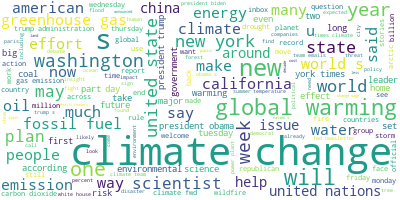

In [32]:
# Import the wordcloud library

from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df_text['text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Prepare text for LDA analysis

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [34]:
pip install gensim

     |████████████████████████████████| 24.0 MB 15.3 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 6.2 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [36]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eapresident/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [74]:
stop_words = stopwords.words('english')
stop_words.extend(['s', 'u', 'said', 'still', 'likely', 'according', 'use', 'climate', 'change', 'global', 'warming', 'new', 'york'])

In [75]:
stop_words = stopwords.words('english')

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df_text.text.values.tolist()


# remove stop words
data_words = remove_stopwords(data)

print(data_words[:1][0][:30])

In [76]:
data = df_text.text.values.tolist()


# remove stop words
data_words = remove_stopwords(data)

print(data_words[:1][0][:30])

['news', 'networks', 'fall', 'short', 'story', 'dolphins', 'die', 'beach', 'crusader', 'films', 'red', 'tide', 'carnage', 'florida', 'time', 'denialism', 'encouraged', 'president', 'work', 'draws', 'nasty', 'comments', 'naples', 'fla', 'people', 'northeast', 'move', 'florida', 'get', 'cold']


In [77]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


## LDA model training

To keep things simple, we'll keep all the parameters to default except for inputting the number of topics. For this tutorial, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [78]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"energy" + 0.005*"world" + 0.004*"president" + 0.003*"emissions" + '
  '0.003*"gas" + 0.003*"environmental" + 0.003*"could" + 0.003*"scientists" + '
  '0.003*"would" + 0.003*"city"'),
 (1,
  '0.006*"emissions" + 0.005*"one" + 0.005*"washington" + 0.005*"scientists" + '
  '0.004*"trump" + 0.004*"united" + 0.003*"states" + 0.003*"carbon" + '
  '0.003*"may" + 0.003*"time"'),
 (2,
  '0.008*"president" + 0.007*"trump" + 0.006*"obama" + 0.006*"washington" + '
  '0.006*"administration" + 0.004*"coal" + 0.004*"biden" + 0.004*"would" + '
  '0.004*"emissions" + 0.004*"carbon"'),
 (3,
  '0.004*"coal" + 0.004*"california" + 0.004*"emissions" + 0.004*"one" + '
  '0.004*"would" + 0.004*"world" + 0.004*"times" + 0.004*"washington" + '
  '0.004*"president" + 0.004*"united"'),
 (4,
  '0.007*"world" + 0.005*"president" + 0.005*"united" + 0.005*"trump" + '
  '0.004*"scientists" + 0.004*"states" + 0.003*"would" + 0.003*"may" + '
  '0.003*"washington" + 0.003*"emissions"'),
 (5,
  '0.006*"wor

In [52]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 3.8 MB/s eta 0:00:01     |███████████████▉                | 819 kB 3.8 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136900 sha256=d8cb3170904907ef5bfbd901aaae45be924733ae5096cba3fea8701987131078
  Stored in directory: /Users/eapresident/Library/Caches/pip/wheels/57/a4/86/d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
Successfully built pyLDAvis
Note: you may need to restart the kernel to use updated packages.


In [60]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models



# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

FileNotFoundError: [Errno 2] No such file or directory: './results/ldavis_prepared_5'

In [79]:
# Using mathworks LDA model code 

df_news_gw

headline        date  \
174     News Networks Fall Short on Climate Story as D...  2018-12-03   
197     Drilling in the Arctic: Questions for a Polar ...  2018-12-03   
201     In the Blink of an Eye, a Hunt for Oil Threate...  2018-12-03   
226     Michelle Bachelet: Ignore Climate Change at Yo...  2018-12-03   
448     COP24, the New Round of Global Climate Talks, ...  2018-12-04   
...                                                   ...         ...   
685014                    Arctic Methane Credibility Bomb  2013-07-25   
685516            A Closer Look at That ‘North Pole Lake’  2013-07-27   
685653                   Quakes May Help Release Methane   2013-07-28   
685694  After Delayed Vote, E.P.A. Gains a Tough Leade...  2013-07-28   
685867  Another View on Gas Drilling in the Context of...  2013-07-29   

       doc_type material_type  \
174     article          News   
197     article          News   
201     article          News   
226     article          News   
448     article          News   
...         ...           ...   
685014  article          News   
685516  article          News   
685653  article          News   
685694  article          News   
685867  article          News   

                                                 keywords  \
174     [ALGAE, Global Warming, News and News Media, D...   
197     [Ice, Animal Behavior, Seals (Animals) and Sea...   
201     [United States Politics and Government, Oil (P...   
226                                      [Global Warming]   
448     [Global Warming, Environment, Greenhouse Gas E...   
...                                                   ...   
685014   [Economic Conditions and Trends, Global Warming]   
685516                              [Global Warming, Ice]   
685653  [Methane, Earthquakes, Greenhouse Gas Emission...   
685694  [Global Warming, United States Politics and Go...   
685867  [Air Pollution, Carbon Dioxide, Coal, Earth, G...   

                                                 abstract  \
174     A crusader films the red-tide carnage in Flori...   
197     The Trump administration is reversing a longst...   
201     For decades, opposition to drilling has left t...   
226     It’s vital for countries to find a balance bet...   
448     Negotiators from nearly 200 countries are gath...   
...                                                   ...   
685014  An overheated scenario for an Arctic methane p...   
685516  A flurry of Web discussion of a “North Pole la...   
685653  Seepage of methane, a greenhouse gas, in the A...   
685694  When President Obama hired Gina McCarthy to ad...   
685867  Cornell researchers come to different conclusi...   

                                           lead_paragraph  \
174     NAPLES, Fla. — Most people from the Northeast ...   
197     Andrew Derocher is a biologist at the Universi...   
201     FAIRBANKS, Alaska — It is the last great stret...   
226     Turning Point: A landmark climate report from ...   
448     WASHINGTON — With the world still struggling t...   
...                                                   ...   
685014  Updated, July 26, 9:45 a.m. | Jason Samenow’s ...   
685516  A Web search for “North Pole lake” turns up a ...   
685653  Major earthquakes can topple buildings, cause ...   
685694  ANNAPOLIS, Md. — When Lisa P. Jackson announce...   
685867  I’ve received a “Your Dot” contribution on gas...   

                                        headline_abstract  \
174     News Networks Fall Short on Climate Story as D...   
197     Drilling in the Arctic: Questions for a Polar ...   
201     In the Blink of an Eye, a Hunt for Oil Threate...   
226     Michelle Bachelet: Ignore Climate Change at Yo...   
448     COP24, the New Round of Global Climate Talks, ...   
...                                                   ...   
685014  Arctic Methane Credibility Bomb An overheated ...   
685516  A Closer Look at That ‘North Pole Lake’ A flur...   
685653  Quakes May Help Rel

In [89]:
pip install matlab

  Created wheel for matlab: filename=matlab-0.1-py3-none-any.whl size=1179 sha256=47365a36234b7a0f72081207ead6f1f8a8531c7778f8bc20d16c9c4112d5f990
  Stored in directory: /Users/eapresident/Library/Caches/pip/wheels/38/49/37/431afd9fb439268390b09a52565e4a292c9d2e198ce45b5d30
Successfully built matlab
Note: you may need to restart the kernel to use updated packages.


In [90]:
import matlab


In [93]:
pip install bagOfWords

    ERROR: Command errored out with exit status 1:
     command: /opt/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/pip-install-dc80p8zv/bagofwords_a6ffe82e3eaa457e90ecaa1312d38a1d/setup.py'"'"'; __file__='"'"'/private/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/pip-install-dc80p8zv/bagofwords_a6ffe82e3eaa457e90ecaa1312d38a1d/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/pip-pip-egg-info-p67zj7g4
         cwd: /private/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/pip-install-dc80p8zv/bagofwords_a6ffe82e3eaa457e90ecaa1312d38a1d/
    Complete output (8 lines):
    Traceback (most recent 

In [94]:
import bagOfWords

ModuleNotFoundError: No module named 'bagOfWords'

In [87]:
# Tokenize the text 

documents = tokenizedDocument(df_text)

NameError: name 'tokenizedDocument' is not defined

In [106]:
df_news = df[df['material_type'] == 'News']

In [110]:
df_news['keywords']

0         ['Books and Literature', 'United States Politi...
1                         ['Football', 'Domestic Violence']
2                                      ['Hatch Act (1939)']
3         ['United States International Relations', 'Uni...
4                                              ['Baseball']
                                ...                        
686366    ['Health Insurance and Managed Care', 'ADVERTI...
686367                              ['Fashion and Apparel']
686368                                         ['Baseball']
686370                          ['International Relations']
686371    ['Economic Conditions and Trends', 'Gambling',...
Name: keywords, Length: 480890, dtype: object

In [108]:
#def to_1D(series):
 #return pd.Series([x for _list in series for x in _list])

#df_news['keywords'] = df_news['keywords'].apply(eval)

In [120]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

df_news['keywords'] = df_news['keywords'].apply(eval)

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/3349403034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['keywords'] = df_news['keywords'].apply(eval)


In [122]:
df_news.head(2)

headline        date doc_type  \
0  Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01  article   
1  Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01  article   

  material_type  section                                           keywords  \
0          News      NaN  [Books and Literature, United States Politics ...   
1          News      NaN                      [Football, Domestic Violence]   

                                            abstract  \
0  President Trump, who is not a reader, has used...   
1  Hunt, a star running back, was also suspended ...   

                                      lead_paragraph  \
0  WASHINGTON — President Trump, a leader who is ...   
1  The Kansas City Chiefs cut their star running ...   

                                          keystrings  \
0  ['Books and Literature', 'United States Politi...   
1                  ['Football', 'Domestic Violence']   

                                       keyliststring  
0  [,',B,o,o,k,s, ,a,n,d, ,L,i,t,e,r,a,t,u,r,e,',...  
1  [,',F,o,o,t,b,a,l,l,',,, ,',D,o,m,e,s,t,i,c, ,...

In [125]:
df_news['keyliststring'] = df_news['keywords'].apply(lambda x: ', '.join(map(str, x)))

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/1204326618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['keyliststring'] = df_news['keywords'].apply(lambda x: ', '.join(map(str, x)))


In [126]:
df_news

headline        date  \
0       Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01   
1       Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01   
2       Agency Pulls Back on Its Warning Against Talk ...  2018-12-01   
3       A China Hawk Gains Prominence as Trump Confron...  2018-12-01   
4                          Wilmer Flores Is a Met No More  2018-12-01   
...                                                   ...         ...   
686366  Songs and Sunscreen Spread the Health Insuranc...  2013-07-31   
686367                 Reluctantly Returning to the Stage  2013-07-31   
686368                     Mets Decline to Make Any Moves  2013-07-31   
686370  Documents Show Thatcher-Reagan Rift Over U.S. ...  2013-07-31   
686371        Crowds Return to Las Vegas, but Gamble Less  2013-07-31   

       doc_type material_type  section  \
0       article          News      NaN   
1       article          News      NaN   
2       article          News      NaN   
3       article          News      NaN   
4       article          News      NaN   
...         ...           ...      ...   
686366  article          News      NaN   
686367  article          News      NaN   
686368  article          News      NaN   
686370  article          News      NaN   
686371  article          News      NaN   

                                                 keywords  \
0       [Books and Literature, United States Politics ...   
1                           [Football, Domestic Violence]   
2                                      [Hatch Act (1939)]   
3       [United States International Relations, United...   
4                                              [Baseball]   
...                                                   ...   
686366  [Health Insurance and Managed Care, ADVERTISIN...   
686367                              [Fashion and Apparel]   
686368                                         [Baseball]   
686370                          [International Relations]   
686371  [Economic Conditions and Trends, Gambling, Cas...   

                                                 abstract  \
0       President Trump, who is not a reader, has used...   
1       Hunt, a star running back, was also suspended ...   
2       Casual conversations about impeachment and inv...   
3       Michael Pillsbury, the president’s top outside...   
4       A fan favorite, Flores did not receive a contr...   
...                                                   ...   
686366  Advertising is upbeat in the states that are s...   
686367  Sarah Phillips introduces new designs, two dec...   
686368  The Mets remained inactive as baseball’s nonwa...   
686370  Documents released by the British government s...   
686371  Though tourists have returned, and jobs and co...   

                                           lead_paragraph  \
0       WASHINGTON — President Trump, a leader who is ...   
1       The Kansas City Chiefs cut their star running ...   
2       WASHINGTON — An independent government agency,...   
3       WASHINGTON — Michael Pillsbury had just finish...   
4       The Mets parted ways with a fan favorite, Wilm...   
...                                                   ...   
686366  THE part of President Obama’s Affordable Care ...   
686367  When fashionable types talk about the 1990s re...   
686368  MIAMI — The Mets remained inactive as baseball...   
686370  LONDON — Thirty-year-old documents newly relea...   
686371  LAS VEGAS — When the last recession battered t...   

                                               keystrings  \
0       ['Books and Literature', 'United States Politi...   
1                       ['Football', 'Domestic Violence']   
2                                    ['Hatch Act (1939)']   
3       ['United States International Relations', 'Uni...   
4                                            ['Baseball']   
...                                                   ...   
686366  ['Health Insurance and Managed Ca

In [116]:
df_news['keystrings'] = [''.join(map(str, l)) for l in df_news['keywords']]



/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/2332668358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['keystrings'] = [''.join(map(str, l)) for l in df_news['keywords']]


In [117]:
df_news

headline        date  \
0       Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01   
1       Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01   
2       Agency Pulls Back on Its Warning Against Talk ...  2018-12-01   
3       A China Hawk Gains Prominence as Trump Confron...  2018-12-01   
4                          Wilmer Flores Is a Met No More  2018-12-01   
...                                                   ...         ...   
686366  Songs and Sunscreen Spread the Health Insuranc...  2013-07-31   
686367                 Reluctantly Returning to the Stage  2013-07-31   
686368                     Mets Decline to Make Any Moves  2013-07-31   
686370  Documents Show Thatcher-Reagan Rift Over U.S. ...  2013-07-31   
686371        Crowds Return to Las Vegas, but Gamble Less  2013-07-31   

       doc_type material_type  section  \
0       article          News      NaN   
1       article          News      NaN   
2       article          News      NaN   
3       article          News      NaN   
4       article          News      NaN   
...         ...           ...      ...   
686366  article          News      NaN   
686367  article          News      NaN   
686368  article          News      NaN   
686370  article          News      NaN   
686371  article          News      NaN   

                                                 keywords  \
0       ['Books and Literature', 'United States Politi...   
1                       ['Football', 'Domestic Violence']   
2                                    ['Hatch Act (1939)']   
3       ['United States International Relations', 'Uni...   
4                                            ['Baseball']   
...                                                   ...   
686366  ['Health Insurance and Managed Care', 'ADVERTI...   
686367                            ['Fashion and Apparel']   
686368                                       ['Baseball']   
686370                        ['International Relations']   
686371  ['Economic Conditions and Trends', 'Gambling',...   

                                                 abstract  \
0       President Trump, who is not a reader, has used...   
1       Hunt, a star running back, was also suspended ...   
2       Casual conversations about impeachment and inv...   
3       Michael Pillsbury, the president’s top outside...   
4       A fan favorite, Flores did not receive a contr...   
...                                                   ...   
686366  Advertising is upbeat in the states that are s...   
686367  Sarah Phillips introduces new designs, two dec...   
686368  The Mets remained inactive as baseball’s nonwa...   
686370  Documents released by the British government s...   
686371  Though tourists have returned, and jobs and co...   

                                           lead_paragraph  \
0       WASHINGTON — President Trump, a leader who is ...   
1       The Kansas City Chiefs cut their star running ...   
2       WASHINGTON — An independent government agency,...   
3       WASHINGTON — Michael Pillsbury had just finish...   
4       The Mets parted ways with a fan favorite, Wilm...   
...                                                   ...   
686366  THE part of President Obama’s Affordable Care ...   
686367  When fashionable types talk about the 1990s re...   
686368  MIAMI — The Mets remained inactive as baseball...   
686370  LONDON — Thirty-year-old documents newly relea...   
686371  LAS VEGAS — When the last recession battered t...   

                                               keystrings  
0       ['Books and Literature', 'United States Politi...  
1                       ['Football', 'Domestic Violence']  
2                                    ['Hatch Act (1939)']  
3       ['United States International Relations', 'Uni...  
4                                            ['Baseball']  
...                                                   ...  
686366  ['Health Insurance and Managed Care', 'A

In [109]:
df_news['keywords'] = ' '.join(map(str,list))

TypeError: 'type' object is not iterable

In [139]:


def to_text(dataframe):
    df_news['headline_abstract'] = df_news.headline.str.cat(df_news.abstract, sep=' ', na_rep=' ')
    df_news['text'] = df_news.headline_abstract.str.cat(df_news.keystrings, sep=' ', na_rep=' ')
    print('Number of articles: {}'.format(len(df)))
    

to_text(df_news)

In [140]:
to_text(df_news)

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/465684464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['headline_abstract'] = df_news.headline.str.cat(df_news.abstract, sep=' ', na_rep=' ')


Number of articles: 686373


/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/465684464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['text'] = df_news.headline_abstract.str.cat(df_news.keystrings, sep=' ', na_rep=' ')


In [141]:
df_news

headline        date  \
0       Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01   
1       Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01   
2       Agency Pulls Back on Its Warning Against Talk ...  2018-12-01   
3       A China Hawk Gains Prominence as Trump Confron...  2018-12-01   
4                          Wilmer Flores Is a Met No More  2018-12-01   
...                                                   ...         ...   
686366  Songs and Sunscreen Spread the Health Insuranc...  2013-07-31   
686367                 Reluctantly Returning to the Stage  2013-07-31   
686368                     Mets Decline to Make Any Moves  2013-07-31   
686370  Documents Show Thatcher-Reagan Rift Over U.S. ...  2013-07-31   
686371        Crowds Return to Las Vegas, but Gamble Less  2013-07-31   

       doc_type material_type  section  \
0       article          News      NaN   
1       article          News      NaN   
2       article          News      NaN   
3       article          News      NaN   
4       article          News      NaN   
...         ...           ...      ...   
686366  article          News      NaN   
686367  article          News      NaN   
686368  article          News      NaN   
686370  article          News      NaN   
686371  article          News      NaN   

                                                 keywords  \
0       [Books and Literature, United States Politics ...   
1                           [Football, Domestic Violence]   
2                                      [Hatch Act (1939)]   
3       [United States International Relations, United...   
4                                              [Baseball]   
...                                                   ...   
686366  [Health Insurance and Managed Care, ADVERTISIN...   
686367                              [Fashion and Apparel]   
686368                                         [Baseball]   
686370                          [International Relations]   
686371  [Economic Conditions and Trends, Gambling, Cas...   

                                                 abstract  \
0       President Trump, who is not a reader, has used...   
1       Hunt, a star running back, was also suspended ...   
2       Casual conversations about impeachment and inv...   
3       Michael Pillsbury, the president’s top outside...   
4       A fan favorite, Flores did not receive a contr...   
...                                                   ...   
686366  Advertising is upbeat in the states that are s...   
686367  Sarah Phillips introduces new designs, two dec...   
686368  The Mets remained inactive as baseball’s nonwa...   
686370  Documents released by the British government s...   
686371  Though tourists have returned, and jobs and co...   

                                           lead_paragraph  \
0       WASHINGTON — President Trump, a leader who is ...   
1       The Kansas City Chiefs cut their star running ...   
2       WASHINGTON — An independent government agency,...   
3       WASHINGTON — Michael Pillsbury had just finish...   
4       The Mets parted ways with a fan favorite, Wilm...   
...                                                   ...   
686366  THE part of President Obama’s Affordable Care ...   
686367  When fashionable types talk about the 1990s re...   
686368  MIAMI — The Mets remained inactive as baseball...   
686370  LONDON — Thirty-year-old documents newly relea...   
686371  LAS VEGAS — When the last recession battered t...   

                                               keystrings  \
0       ['Books and Literature', 'United States Politi...   
1                       ['Football', 'Domestic Violence']   
2                                    ['Hatch Act (1939)']   
3       ['United States International Relations', 'Uni...   
4                                            ['Baseball']   
...                                                   ...   
686366  ['Health Insurance and Managed Ca

In [142]:

# Load the regular expression library 
import re 

# Remove punctuation 
df_news['text'] = \
df_news['text'].map(lambda a: re.sub('[(,\/.!:;?)]', '', a))

# Convert to all lowercase 

df_news['text'] = \
df_news['text'].map(lambda x: x.lower())

# Print out the first rows of papers 
df_news['text'].head()

<>:6: DeprecationWarning: invalid escape sequence \/
<>:6: DeprecationWarning: invalid escape sequence \/
/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/535580312.py:6: DeprecationWarning: invalid escape sequence \/
  df_news['text'].map(lambda a: re.sub('[(,\/.!:;?)]', '', a))
/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/535580312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['text'] = \
/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/535580312.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

0    trump’s book club a president who doesn’t read...
1    kareem hunt is cut by the chiefs after a video...
2    agency pulls back on its warning against talk ...
3    a china hawk gains prominence as trump confron...
4    wilmer flores is a met no more a fan favorite ...
Name: text, dtype: object

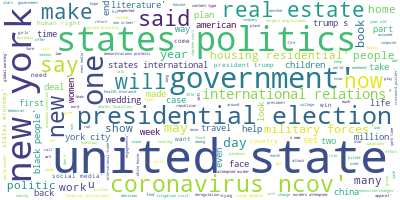

In [143]:
# Import the wordcloud library


# Join the different processed titles together.
long_string = ','.join(list(df_news['text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [145]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df_news.text.values.tolist()


# remove stop words
data_words = remove_stopwords(data)

print(data_words[:1][0][:30])

['trump', 'book', 'club', 'president', 'read', 'promotes', 'books', 'promote', 'president', 'trump', 'reader', 'used', 'twitter', 'plug', 'slew', 'trump', 'friendly', 'books', 'titles', 'like', 'fight', 'russia', 'hoax', 'books', 'literature', 'united', 'states', 'politics', 'government', 'presidents']


In [206]:
from sklearn.model_selection import GridSearchCV

In [146]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1)]


In [591]:
from pprint import pprint

# number of topics
num_topics = 30


# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(14,
  '0.016*"energy" + 0.015*"oil" + 0.015*"power" + 0.014*"gas" + 0.014*"labor" '
  '+ 0.012*"water" + 0.010*"emissions" + 0.008*"industry" + 0.008*"electric" + '
  '0.007*"air"'),
 (18,
  '0.033*"tax" + 0.031*"social" + 0.031*"media" + 0.024*"news" + '
  '0.011*"income" + 0.010*"taxes" + 0.009*"poetry" + 0.008*"sandy" + '
  '0.007*"magazine" + 0.006*"poets"'),
 (24,
  '0.028*"news" + 0.020*"executive" + 0.015*"media" + 0.014*"business" + '
  '0.014*"acquisitions" + 0.014*"mergers" + 0.013*"divestitures" + '
  '0.013*"video" + 0.013*"company" + 0.011*"changes"'),
 (10,
  '0.041*"coronavirus" + 0.024*"ncov" + 0.014*"science" + 0.013*"research" + '
  '0.010*"health" + 0.010*"pandemic" + 0.010*"space" + 0.009*"life" + '
  '0.008*"disease" + 0.008*"study"'),
 (12,
  '0.041*"travel" + 0.024*"vacations" + 0.018*"games" + 0.016*"love" + '
  '0.012*"olympic" + 0.009*"hotels" + 0.008*"hotel" + 0.008*"readers" + '
  '0.007*"card" + 0.006*"times"'),
 (20,
  '0.027*"personal" + 0.018*"content"

In [592]:
pyLDAvis.enable_notebook(local = True)

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: t

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
27     0.238588  0.027526       1        1  6.926801
16     0.191105  0.124863       2        1  5.160851
8     -0.122993  0.077512       3        1  5.020692
0      0.193493  0.112279       4        1  4.771804
13     0.048086  0.144455       5        1  4.740937
2      0.130315 -0.163017       6        1  4.730545
24     0.033728 -0.128450       7        1  4.135576
10    -0.002720 -0.120579       8        1  4.107270
22     0.158245  0.125189       9        1  3.564183
7     -0.161731  0.035532      10        1  3.559501
17     0.119871 -0.155917      11        1  3.393552
6     -0.013239 -0.140865      12        1  3.339595
12    -0.141110 -0.043769      13        1  3.323517
15    -0.105591  0.102750      14        1  3.253161
14     0.136935 -0.155011      15        1  3.159810
1      0.021083 -0.052016      16        1  2.936459
23    -0.203985  0.040583      17        1  2.929105
26     0.003617 -0.074774      18        1  2.791080
21     0.032368  0.080021      19        1  2.699385
11     0.039326  0.008331      20        1  2.602954
5     -0.018858 -0.005802      21        1  2.537425
29    -0.091485 -0.122221      22        1  2.489827
25    -0.057810 -0.067089      23        1  2.473788
3     -0.054629  0.108007      24        1  2.394045
9     -0.038456  0.004880      25        1  2.388925
4     -0.041903  0.033096      26        1  2.338362
28     0.045480  0.179409      27        1  2.316136
18    -0.080655 -0.059941      28        1  2.061584
19    -0.188908  0.031672      29        1  2.037383
20    -0.068165  0.053347      30        1  1.815747, topic_info=         Term          Freq         Total Category  logprob  loglift
20     states  64518.000000  64518.000000  Default  30.0000  30.0000
24     united  62636.000000  62636.000000  Default  29.0000  29.0000
1968    music  24522.000000  24522.000000  Default  28.0000  28.0000
22      trump  32869.000000  32869.000000  Default  27.0000  27.0000
488   fashion  23734.000000  23734.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
2168     park    871.995535   5572.784902  Topic30  -5.5061   2.1538
538     night    798.931838   8032.608799  Topic30  -5.5936   1.7007
3325      man    772.213250   9982.049341  Topic30  -5.6276   1.4494
340       one    758.932904  29891.545956  Topic30  -5.6450   0.3353
3352     late    626.765019   3641.516823  Topic30  -5.8363   2.2491

[2173 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
9548      18  0.997176     abbey
7028      17  0.995072       abc
7028      26  0.003658       abc
5437       1  0.001390  abortion
5437       3  0.010423  abortion
...      ...       ...       ...
6858      14  0.002649       zoo
6858      21  0.002649       zoo
6858      28  0.990905       zoo
6858      30  0.002649       zoo
19595     28  0.994284      zoos

[14535 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[28, 17, 9, 1, 14, 3, 25, 11, 23, 8, 18, 7, 13, 16, 15, 2, 24, 27, 22, 12, 6, 30, 26, 4, 10, 5, 29, 19, 20, 21])

In [260]:
search_params = {'num_topics': [50, 75, 100]}

In [262]:
GridSearchCV(estimator=gensim.models.LdaMulticore(corpus=corpus,
                                                 id2word=id2word,
                                                 num_topics=10),
             param_grid=search_params)
             

GridSearchCV(estimator=<gensim.models.ldamulticore.LdaMulticore object at 0x7fdc2bce1970>,
             param_grid={'num_topics': [50, 75, 100]})

In [266]:
GridSearchCV(estimator=gensim.models.LdaMulticore(corpus=corpus,
                                                 id2word=id2word,
                                                 num_topics=10),
             param_grid=search_params).best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [263]:
GridSearchCV(estimator=gensim.models.LdaMulticore(corpus=corpus,
                                                 id2word=id2word,
                                                 num_topics=10),
             param_grid=search_params).best_estimator_

# Model Parameters
print("Best Model's Params: ", GridSearchCV(estimator=gensim.models.LdaMulticore(corpus=corpus,
                                                 id2word=id2word,
                                                 num_topics=10),
             param_grid=search_params).best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", GridSearchCV(estimator=gensim.models.LdaMulticore(corpus=corpus,
                                                 id2word=id2word,
                                                 num_topics=10),
             param_grid=search_params).best_score_)


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
GridSearchCV(estimator=gensim.models.LdaMulticore(corpus=corpus,
                                                 id2word=id2word,
                                                 num_topics=10),
             param_grid=search_params)

In [216]:
import pyLDAvis.sklearn

In [590]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9      0.185125  0.013739       1        1  9.821907
4     -0.002090 -0.083161       2        1  7.294738
11     0.038403 -0.127297       3        1  6.985730
6     -0.125422  0.024220       4        1  6.610881
7      0.181975  0.034455       5        1  6.573738
2      0.160323 -0.161115       6        1  6.182457
5      0.120409  0.161014       7        1  5.639091
8      0.160319 -0.122732       8        1  5.235105
16    -0.189789  0.052311       9        1  5.081413
14    -0.060892 -0.060372      10        1  4.494396
13    -0.001072  0.252149      11        1  4.380933
10    -0.170907  0.025292      12        1  4.154966
19    -0.136379 -0.092614      13        1  4.090238
1      0.159976  0.180842      14        1  3.945266
12    -0.202392  0.069810      15        1  3.882021
17    -0.126693 -0.067783      16        1  3.437154
15    -0.003829 -0.102804      17        1  3.140766
0     -0.007700  0.036454      18        1  3.100011
3      0.035328 -0.014104      19        1  3.013905
18    -0.014693 -0.018303      20        1  2.935283, topic_info=            Term          Freq         Total Category  logprob  loglift
20        states  67900.000000  67900.000000  Default  30.0000  30.0000
24        united  65831.000000  65831.000000  Default  29.0000  29.0000
10      politics  44278.000000  44278.000000  Default  28.0000  28.0000
5     government  56781.000000  56781.000000  Default  27.0000  27.0000
1968       music  25983.000000  25983.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
2369        west   1169.658808   4979.521933  Topic20  -5.6927   2.0797
1765        fire   1127.308172   4481.055098  Topic20  -5.7296   2.1483
485         city   1277.492703  25119.817825  Topic20  -5.6045   0.5496
182        first   1210.795097  26075.694182  Topic20  -5.6581   0.4586
194          two   1060.715526  25808.448896  Topic20  -5.7905   0.3366

[1483 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
9548      20  0.996649       abbey
5437       1  0.003029    abortion
5437       2  0.000673    abortion
5437       6  0.000337    abortion
5437       7  0.992602    abortion
...      ...       ...         ...
15413      1  0.998079      yellen
6117       2  0.994746        yoga
6117       3  0.002453        yoga
19595      7  0.993706        zoos
18140     12  0.997060  zuckerberg

[8615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 12, 7, 8, 3, 6, 9, 17, 15, 14, 11, 20, 2, 13, 18, 16, 1, 4, 19])

In [589]:
pyLDAvis.enable_notebook()


LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: t

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9      0.185125  0.013739       1        1  9.821907
4     -0.002090 -0.083161       2        1  7.294738
11     0.038403 -0.127297       3        1  6.985730
6     -0.125422  0.024220       4        1  6.610881
7      0.181975  0.034455       5        1  6.573738
2      0.160323 -0.161115       6        1  6.182457
5      0.120409  0.161014       7        1  5.639091
8      0.160319 -0.122732       8        1  5.235105
16    -0.189789  0.052311       9        1  5.081413
14    -0.060892 -0.060372      10        1  4.494396
13    -0.001072  0.252149      11        1  4.380933
10    -0.170907  0.025292      12        1  4.154966
19    -0.136379 -0.092614      13        1  4.090238
1      0.159976  0.180842      14        1  3.945266
12    -0.202392  0.069810      15        1  3.882021
17    -0.126693 -0.067783      16        1  3.437154
15    -0.003829 -0.102804      17        1  3.140766
0     -0.007700  0.036454      18        1  3.100011
3      0.035328 -0.014104      19        1  3.013905
18    -0.014693 -0.018303      20        1  2.935283, topic_info=            Term          Freq         Total Category  logprob  loglift
20        states  67900.000000  67900.000000  Default  30.0000  30.0000
24        united  65831.000000  65831.000000  Default  29.0000  29.0000
10      politics  44278.000000  44278.000000  Default  28.0000  28.0000
5     government  56781.000000  56781.000000  Default  27.0000  27.0000
1968       music  25983.000000  25983.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
2369        west   1169.658808   4979.521933  Topic20  -5.6927   2.0797
1765        fire   1127.308172   4481.055098  Topic20  -5.7296   2.1483
485         city   1277.492703  25119.817825  Topic20  -5.6045   0.5496
182        first   1210.795097  26075.694182  Topic20  -5.6581   0.4586
194          two   1060.715526  25808.448896  Topic20  -5.7905   0.3366

[1483 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
9548      20  0.996649       abbey
5437       1  0.003029    abortion
5437       2  0.000673    abortion
5437       6  0.000337    abortion
5437       7  0.992602    abortion
...      ...       ...         ...
15413      1  0.998079      yellen
6117       2  0.994746        yoga
6117       3  0.002453        yoga
19595      7  0.993706        zoos
18140     12  0.997060  zuckerberg

[8615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 12, 7, 8, 3, 6, 9, 17, 15, 14, 11, 20, 2, 13, 18, 16, 1, 4, 19])

In [269]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
79    -0.288757  0.106685       1        1  3.247938
77    -0.225365  0.081009       2        1  2.554807
99    -0.176970  0.091491       3        1  2.136450
9     -0.041662 -0.085152       4        1  1.814201
81     0.031416 -0.127835       5        1  1.727257
...         ...       ...     ...      ...       ...
86     0.013033  0.083435      96        1  0.614435
90    -0.026586 -0.002205      97        1  0.602917
55    -0.031891 -0.033875      98        1  0.602355
83    -0.028507  0.018463      99        1  0.570576
87     0.046196  0.060218     100        1  0.553833

[100 rows x 5 columns], topic_info=           Term          Freq         Total  Category  logprob  loglift
24       united  66653.000000  66653.000000   Default  30.0000  30.0000
20       states  68348.000000  68348.000000   Default  29.0000  29.0000
1481       news  24893.000000  24893.000000   Default  28.0000  28.0000
10     politics  45273.000000  45273.000000   Default  27.0000  27.0000
1968      music  24420.000000  24420.000000   Default  26.0000  26.0000
...         ...           ...           ...       ...      ...      ...
2642     joseph    688.939020   1491.579504  Topic100  -4.5543   4.4236
2011        van    522.595686   1010.535409  Topic100  -4.8307   4.5366
996   suspected    485.484601    811.121107  Topic100  -4.9043   4.6828
206         may    740.406628  20048.735805  Topic100  -4.4823   1.8973
2242    writing    519.810945   5558.225610  Topic100  -4.8360   2.8265

[6426 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
6423       6  0.941055       aaron
6423      26  0.037587       aaron
6423      35  0.001392       aaron
6423      61  0.016705       aaron
6423      86  0.001392       aaron
...      ...       ...         ...
7291      49  0.992057      zoning
7291      84  0.005511      zoning
6858      86  0.998001         zoo
19595     86  0.995447        zoos
18140     83  0.995492  zuckerberg

[49592 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[80, 78, 100, 10, 82, 89, 28, 67, 3, 53, 65, 98, 74, 64, 1, 35, 46, 90, 97, 70, 96, 18, 6, 20, 38, 13, 47, 22, 43, 4, 79, 54, 76, 81, 15, 71, 19, 34, 14, 40, 68, 44, 99, 12, 7, 45, 26, 17, 2, 75, 59, 73, 83, 62, 61, 16, 60, 32, 51, 72, 41, 94, 92, 8, 63, 30, 11, 95, 31, 24, 29, 50, 9, 86, 93, 25, 5, 33, 42, 52, 58, 37, 77, 48, 39, 27, 69, 49, 21, 85, 57, 23, 55, 66, 36, 87, 91, 56, 84, 88])

In [221]:

#finding the best parameters = number of topics 

#Define search param 

search_params = {'num_topics': [75, 100, 125, 150]}



# Init Grid Search Class 

model = GridSearchCV(gensim.models.LdaMulticore(), param_grid = search_params)

#Do the Grid search 

model.fit(corpus)




ValueError: at least one of corpus/id2word must be specified, to establish input space dimensionality

In [588]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models



# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9      0.185125  0.013739       1        1  9.821845
4     -0.002090 -0.083161       2        1  7.294421
11     0.038403 -0.127297       3        1  6.985655
6     -0.125422  0.024220       4        1  6.610133
7      0.181975  0.034455       5        1  6.572523
2      0.160323 -0.161115       6        1  6.184228
5      0.120409  0.161014       7        1  5.637992
8      0.160319 -0.122732       8        1  5.236625
16    -0.189789  0.052311       9        1  5.082185
14    -0.060892 -0.060372      10        1  4.494493
13    -0.001072  0.252149      11        1  4.381066
10    -0.170907  0.025292      12        1  4.156246
19    -0.136379 -0.092614      13        1  4.088725
1      0.159976  0.180842      14        1  3.944875
12    -0.202392  0.069810      15        1  3.883486
17    -0.126693 -0.067783      16        1  3.436517
15    -0.003829 -0.102804      17        1  3.140347
0     -0.007700  0.036454      18        1  3.097814
3      0.035328 -0.014104      19        1  3.013946
18    -0.014693 -0.018303      20        1  2.936879, topic_info=            Term          Freq         Total Category  logprob  loglift
20        states  67899.000000  67899.000000  Default  30.0000  30.0000
24        united  65830.000000  65830.000000  Default  29.0000  29.0000
10      politics  44278.000000  44278.000000  Default  28.0000  28.0000
5     government  56782.000000  56782.000000  Default  27.0000  27.0000
1968       music  25986.000000  25986.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
2369        west   1170.294590   4979.929653  Topic20  -5.6927   2.0797
1765        fire   1127.920934   4481.629809  Topic20  -5.7296   2.1482
485         city   1278.187099  25119.075817  Topic20  -5.6045   0.5496
182        first   1211.453239  26075.567421  Topic20  -5.6581   0.4586
194          two   1061.292091  25808.018419  Topic20  -5.7905   0.3366

[1483 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
9548      20  0.996110       abbey
5437       1  0.003030    abortion
5437       2  0.000673    abortion
5437       6  0.000337    abortion
5437       7  0.992794    abortion
...      ...       ...         ...
15413      1  0.998086      yellen
6117       2  0.994789        yoga
6117       3  0.002453        yoga
19595      7  0.993898        zoos
18140     12  0.996754  zuckerberg

[8615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 12, 7, 8, 3, 6, 9, 17, 15, 14, 11, 20, 2, 13, 18, 16, 1, 4, 19])

In [164]:
df_news_gw.head(2)

headline        date doc_type  \
174  News Networks Fall Short on Climate Story as D...  2018-12-03  article   
197  Drilling in the Arctic: Questions for a Polar ...  2018-12-03  article   

    material_type                                           keywords  \
174          News  [ALGAE, Global Warming, News and News Media, D...   
197          News  [Ice, Animal Behavior, Seals (Animals) and Sea...   

                                              abstract  \
174  A crusader films the red-tide carnage in Flori...   
197  The Trump administration is reversing a longst...   

                                        lead_paragraph  \
174  NAPLES, Fla. — Most people from the Northeast ...   
197  Andrew Derocher is a biologist at the Universi...   

                                     headline_abstract  \
174  News Networks Fall Short on Climate Story as D...   
197  Drilling in the Arctic: Questions for a Polar ...   

                                                  text  
174  News Networks Fall Short on Climate Story as D...  
197  Drilling in the Arctic: Questions for a Polar ...

In [165]:
from datetime import datetime as dt

df_news_gw['date'] = pd.to_datetime(df_news_gw['date'])

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/1951097097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_gw['date'] = pd.to_datetime(df_news_gw['date'])


In [167]:
df_news_gw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4518 entries, 174 to 685867
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   headline           4518 non-null   object        
 1   date               4518 non-null   datetime64[ns]
 2   doc_type           4518 non-null   object        
 3   material_type      4518 non-null   object        
 4   keywords           4518 non-null   object        
 5   abstract           4518 non-null   object        
 6   lead_paragraph     4510 non-null   object        
 7   headline_abstract  4518 non-null   object        
 8   text               4518 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 482.0+ KB


In [180]:
df_news_gw['year'] = df_news_gw['date'].dt.year
df_news_gw['month'] = df_news_gw['date'].dt.month
df_news_gw['day'] = df_news_gw['date'].dt.day

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/2252787066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_gw['year'] = df_news_gw['date'].dt.year
/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/2252787066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_gw['month'] = df_news_gw['date'].dt.month
/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/2252787066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

(array([ 262.,  285.,  370.,  430.,  364.,  342.,  398.,  569.,  486.,
        1012.]),
 array([2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
        2021., 2022.]),
 <BarContainer object of 10 artists>)

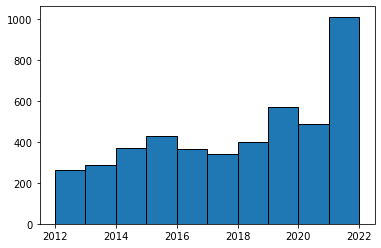

In [197]:
import matplotlib.pyplot as plt

plt.hist(df_news_gw.year, edgecolor = 'black')

In [190]:
gw_22 = df_news_gw.loc[df_news_gw['year'] == 2022]
gw_21 = df_news_gw.loc[df_news_gw['year'] == 2021]
gw_20 = df_news_gw.loc[df_news_gw['year'] == 2020]
gw_19 = df_news_gw.loc[df_news_gw['year'] == 2019]

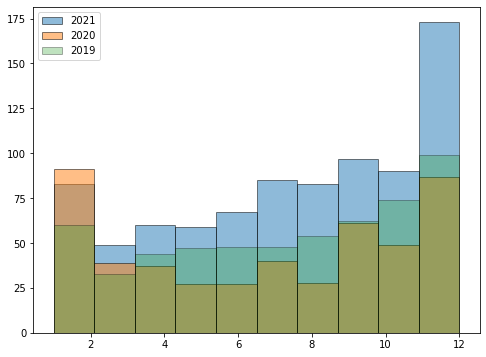

In [205]:

plt.figure(figsize=(8,6))
plt.hist(gw_21.month, edgecolor = 'black', alpha = 0.5, label = '2021')
plt.hist(gw_20.month, edgecolor = 'black', alpha = 0.5, label = '2020')
plt.hist(gw_19.month, edgecolor = 'black', alpha = 0.3, label = '2019')

plt.legend(loc='upper left')
           

    


## TOPIC MODELLING

Okay have global warming general visualization - but are there more articles related to the weather/renewables not necessarily JUST global 
warming related? 


In [223]:
# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df.head(2)

headline        date doc_type  \
0  Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01  article   
1  Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01  article   

  material_type  section                                           keywords  \
0          News      NaN  ['Books and Literature', 'United States Politi...   
1          News      NaN                  ['Football', 'Domestic Violence']   

                                            abstract  \
0  President Trump, who is not a reader, has used...   
1  Hunt, a star running back, was also suspended ...   

                                      lead_paragraph  
0  WASHINGTON — President Trump, a leader who is ...  
1  The Kansas City Chiefs cut their star running ...

In [225]:
df_news = df[df['material_type'] == 'News']
df_news.head(2)

headline        date doc_type  \
0  Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01  article   
1  Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01  article   

  material_type  section                                           keywords  \
0          News      NaN  ['Books and Literature', 'United States Politi...   
1          News      NaN                  ['Football', 'Domestic Violence']   

                                            abstract  \
0  President Trump, who is not a reader, has used...   
1  Hunt, a star running back, was also suspended ...   

                                      lead_paragraph  
0  WASHINGTON — President Trump, a leader who is ...  
1  The Kansas City Chiefs cut their star running ...

In [232]:
#Want headline, keywords, and abstract all in one place 

df_news['keyliststring'] = df_news['keystrings'].apply(lambda x: ', '.join(map(str, x)))

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/818321339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['keyliststring'] = df_news['keystrings'].apply(lambda x: ', '.join(map(str, x)))


In [231]:
df_news.head(2)

headline        date doc_type  \
0  Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01  article   
1  Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01  article   

  material_type  section                                           keywords  \
0          News      NaN  ['Books and Literature', 'United States Politi...   
1          News      NaN                  ['Football', 'Domestic Violence']   

                                            abstract  \
0  President Trump, who is not a reader, has used...   
1  Hunt, a star running back, was also suspended ...   

                                      lead_paragraph  \
0  WASHINGTON — President Trump, a leader who is ...   
1  The Kansas City Chiefs cut their star running ...   

                                          keystrings  \
0  ['Books and Literature', 'United States Politi...   
1                  ['Football', 'Domestic Violence']   

                                       keyliststring  
0  [, ', B, o, o, k, s,  , a, n, d,  , L, i, t, e...  
1  [, ', F, o, o, t, b, a, l, l, ', ,,  , ', D, o...

In [233]:
#Want headline, keywords, and abstract all in one place 


def to_text(dataframe):
    df_news['headline_abstract'] = df_news.headline.str.cat(df_news.abstract, sep=' ', na_rep=' ')
    df_news['text'] = df_news.headline_abstract.str.cat(df_news.keywords, sep=' ', na_rep=' ')
    print('Number of articles: {}'.format(len(df)))


to_text(df_news)

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/1751892245.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['headline_abstract'] = df_news.headline.str.cat(df_news.abstract, sep=' ', na_rep=' ')


Number of articles: 686373


/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/1751892245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['text'] = df_news.headline_abstract.str.cat(df_news.keywords, sep=' ', na_rep=' ')


In [235]:
df_news.head(2)

headline        date doc_type  \
0  Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01  article   
1  Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01  article   

  material_type  section                                           keywords  \
0          News      NaN  ['Books and Literature', 'United States Politi...   
1          News      NaN                  ['Football', 'Domestic Violence']   

                                            abstract  \
0  President Trump, who is not a reader, has used...   
1  Hunt, a star running back, was also suspended ...   

                                      lead_paragraph  \
0  WASHINGTON — President Trump, a leader who is ...   
1  The Kansas City Chiefs cut their star running ...   

                                          keystrings  \
0  ['Books and Literature', 'United States Politi...   
1                  ['Football', 'Domestic Violence']   

                                       keyliststring  \
0  [, ', B, o, o, k, s,  , a, n, d,  , L, i, t, e...   
1  [, ', F, o, o, t, b, a, l, l, ', ,,  , ', D, o...   

                                   headline_abstract  \
0  Trump’s Book Club: A President Who Doesn’t Rea...   
1  Kareem Hunt Is Cut by the Chiefs After a Video...   

                                                text  
0  Trump’s Book Club: A President Who Doesn’t Rea...  
1  Kareem Hunt Is Cut by the Chiefs After a Video...

In [237]:
# Load the regular expression library 
import re 

# Remove punctuation 
df_news['text'] = \
df_news['text'].map(lambda a: re.sub('[(,\/.!:;?)]', '', a))

# Convert to all lowercase 

df_news['text'] = \
df_news['text'].map(lambda x: x.lower())

# Print out the first rows of papers 
df_news['text'].head()

<>:6: DeprecationWarning: invalid escape sequence \/
<>:6: DeprecationWarning: invalid escape sequence \/
/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/2525870426.py:6: DeprecationWarning: invalid escape sequence \/
  df_news['text'].map(lambda a: re.sub('[(,\/.!:;?)]', '', a))
/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/2525870426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['text'] = \
/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/2525870426.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

0    trump’s book club a president who doesn’t read...
1    kareem hunt is cut by the chiefs after a video...
2    agency pulls back on its warning against talk ...
3    a china hawk gains prominence as trump confron...
4    wilmer flores is a met no more a fan favorite ...
Name: text, dtype: object

The sentences look better now, but you want to tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

In [239]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df_news['text']))

print(data_words[:1])

[['trump', 'book', 'club', 'president', 'who', 'doesn', 'read', 'promotes', 'the', 'books', 'that', 'promote', 'him', 'president', 'trump', 'who', 'is', 'not', 'reader', 'has', 'used', 'twitter', 'to', 'plug', 'slew', 'of', 'trump', 'friendly', 'books', 'with', 'titles', 'like', 'why', 'we', 'fight', 'and', 'the', 'russia', 'hoax', 'books', 'and', 'literature', 'united', 'states', 'politics', 'and', 'government', 'presidents', 'and', 'presidency', 'us']]



Lemmatization is a process where we convert words to its root word.

For example: ‘Studying’ becomes ‘Study’, ‘Meeting becomes ‘Meet’, ‘Better’ and ‘Best’ becomes ‘Good’.
The advantage of this is, we get to reduce the total number of unique words in the dictionary. As a result, the number of columns in the document-word matrix (created by CountVectorizer in the next step) will be denser with lesser columns.

You can expect better topics to be generated in the end.

In [243]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [245]:
import spacy

In [247]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['club president read promote book promote reader use twitter plug trump friendly book title fight hoax book literature politic government president presidency', 'cut chief video show attack woman hunt star run back also suspend hour release video show hunt knock woman kick hotel football domestic violence']


Create the Document-Word matrix
The LDA topic model algorithm requires a document word matrix as the main input.

You can create one using CountVectorizer. In the below code, I have configured the CountVectorizer to consider words that has occurred at least 10 times (min_df), remove built-in english stopwords, convert all words to lowercase, and a word can contain numbers and alphabets of at least length 3 in order to be qualified as a word.

So, to create the doc-word matrix, you need to first initialise the CountVectorizer class with the required configuration and then apply fit_transform to actually create the matrix.

Since most cells contain zeros, the result will be in the form of a sparse matrix to save memory.

If you want to materialize it in a 2D array format, call the todense() method of the sparse matrix like its done in the next step.

In [251]:
from sklearn.feature_extraction.text import CountVectorizer

In [252]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [264]:
# Init the Model
lda_model = LatentDirichletAllocation(n_components = 10)

lda_model.fit_transform(data_vectorized)

KeyboardInterrupt: 

11. How to GridSearch the best LDA model?
The most important tuning parameter for LDA models is n_components (number of topics). In addition, I am going to search learning_decay (which controls the learning rate) as well.

Besides these, other possible search params could be learning_offset (downweigh early iterations. Should be > 1) and max_iter. These could be worth experimenting if you have enough computing resources.

Be warned, the grid search constructs multiple LDA models for all possible combinations of param values in the param_grid dict. So, this process can consume a lot of time and resources.



In [254]:
# Run in terminal or command prompt
# python3 -m spacy download en

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [256]:
# Define Search Param
search_params = {'n_components': [50, 75]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

KeyboardInterrupt: 

In [275]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480890 entries, 0 to 686371
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   headline           480883 non-null  object 
 1   date               480890 non-null  object 
 2   doc_type           480890 non-null  object 
 3   material_type      480890 non-null  object 
 4   section            0 non-null       float64
 5   keywords           480890 non-null  object 
 6   abstract           480797 non-null  object 
 7   lead_paragraph     476183 non-null  object 
 8   keystrings         480890 non-null  object 
 9   keyliststring      480890 non-null  object 
 10  headline_abstract  480890 non-null  object 
 11  text               480890 non-null  object 
dtypes: float64(1), object(11)
memory usage: 63.8+ MB


In [292]:
df_news_search = df_news[df_news['text'].str.contains('global', 'warming')]
df_news_search

headline        date  \
66      Global Growth Cools, Leaving Scars of ’08 Unhe...  2018-12-01   
174     News Networks Fall Short on Climate Story as D...  2018-12-03   
185     Firms Drop Support for Cluster Bombs, but ‘Glo...  2018-12-03   
197     Drilling in the Arctic: Questions for a Polar ...  2018-12-03   
201     In the Blink of an Eye, a Hunt for Oil Threate...  2018-12-03   
...                                                   ...         ...   
685516            A Closer Look at That ‘North Pole Lake’  2013-07-27   
685653                   Quakes May Help Release Methane   2013-07-28   
685694  After Delayed Vote, E.P.A. Gains a Tough Leade...  2013-07-28   
685782  U.S. Pushes for Global Eye on South Sudan Conf...  2013-07-29   
685867  Another View on Gas Drilling in the Context of...  2013-07-29   

       doc_type material_type  section  \
66      article          News      NaN   
174     article          News      NaN   
185     article          News      NaN   
197     article          News      NaN   
201     article          News      NaN   
...         ...           ...      ...   
685516  article          News      NaN   
685653  article          News      NaN   
685694  article          News      NaN   
685782  article          News      NaN   
685867  article          News      NaN   

                                                 keywords  \
66      ['Economic Conditions and Trends', 'Internatio...   
174     ['ALGAE', 'Global Warming', 'News and News Med...   
185         ['Cluster Munitions', 'Bombs and Explosives']   
197     ['Ice', 'Animal Behavior', 'Seals (Animals) an...   
201     ['United States Politics and Government', 'Oil...   
...                                                   ...   
685516                          ['Global Warming', 'Ice']   
685653  ['Methane', 'Earthquakes', 'Greenhouse Gas Emi...   
685694  ['Global Warming', 'United States Politics and...   
685782          ['United States International Relations']   
685867  ['Air Pollution', 'Carbon Dioxide', 'Coal', 'E...   

                                                 abstract  \
66      Less than a year ago, every major economy was ...   
174     A crusader films the red-tide carnage in Flori...   
185     An advocacy group that wants to ban the muniti...   
197     The Trump administration is reversing a longst...   
201     For decades, opposition to drilling has left t...   
...                                                   ...   
685516  A flurry of Web discussion of a “North Pole la...   
685653  Seepage of methane, a greenhouse gas, in the A...   
685694  When President Obama hired Gina McCarthy to ad...   
685782  Officials said they wanted to draw attention t...   
685867  Cornell researchers come to different conclusi...   

                                           lead_paragraph  \
66      LONDON — Only a few months ago, the world’s fo...   
174     NAPLES, Fla. — Most people from the Northeast ...   
185     GENEVA — Ten years after an international trea...   
197     Andrew Derocher is a biologist at the Universi...   
201     FAIRBANKS, Alaska — It is the last great stret...   
...                                                   ...   
685516  A Web search for “North Pole lake” turns up a ...   
685653  Major earthquakes can topple buildings, cause ...   
685694  ANNAPOLIS, Md. — When Lisa P. Jackson announce...   
685782  WASHINGTON — When the National Security Counci...   
685867  I’ve received a “Your Dot” contribution on gas...   

                                               keystrings  \
66      ['Economic Conditions and Trends', 'Internatio...   
174     ['ALGAE', 'Global Warming', 'News and News Med...   
185         ['Cluster Munitions', 'Bombs and Explosives']   
197     ['Ice', 'Animal Behavior', 'Seals (Animals) an...   
201     ['United States Politics and Government', 'Oil...   
...                                                   ...   
685516                          ['Global 

In [293]:
df_news_search.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 66 to 685867
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   headline           8621 non-null   object 
 1   date               8621 non-null   object 
 2   doc_type           8621 non-null   object 
 3   material_type      8621 non-null   object 
 4   section            0 non-null      float64
 5   keywords           8621 non-null   object 
 6   abstract           8621 non-null   object 
 7   lead_paragraph     8579 non-null   object 
 8   keystrings         8621 non-null   object 
 9   keyliststring      8621 non-null   object 
 10  headline_abstract  8621 non-null   object 
 11  text               8621 non-null   object 
dtypes: float64(1), object(11)
memory usage: 875.6+ KB


In [290]:
df_news_gw

headline       date doc_type  \
174     News Networks Fall Short on Climate Story as D... 2018-12-03  article   
197     Drilling in the Arctic: Questions for a Polar ... 2018-12-03  article   
201     In the Blink of an Eye, a Hunt for Oil Threate... 2018-12-03  article   
226     Michelle Bachelet: Ignore Climate Change at Yo... 2018-12-03  article   
448     COP24, the New Round of Global Climate Talks, ... 2018-12-04  article   
...                                                   ...        ...      ...   
685014                    Arctic Methane Credibility Bomb 2013-07-25  article   
685516            A Closer Look at That ‘North Pole Lake’ 2013-07-27  article   
685653                   Quakes May Help Release Methane  2013-07-28  article   
685694  After Delayed Vote, E.P.A. Gains a Tough Leade... 2013-07-28  article   
685867  Another View on Gas Drilling in the Context of... 2013-07-29  article   

       material_type                                           keywords  \
174             News  [ALGAE, Global Warming, News and News Media, D...   
197             News  [Ice, Animal Behavior, Seals (Animals) and Sea...   
201             News  [United States Politics and Government, Oil (P...   
226             News                                   [Global Warming]   
448             News  [Global Warming, Environment, Greenhouse Gas E...   
...              ...                                                ...   
685014          News   [Economic Conditions and Trends, Global Warming]   
685516          News                              [Global Warming, Ice]   
685653          News  [Methane, Earthquakes, Greenhouse Gas Emission...   
685694          News  [Global Warming, United States Politics and Go...   
685867          News  [Air Pollution, Carbon Dioxide, Coal, Earth, G...   

                                                 abstract  \
174     A crusader films the red-tide carnage in Flori...   
197     The Trump administration is reversing a longst...   
201     For decades, opposition to drilling has left t...   
226     It’s vital for countries to find a balance bet...   
448     Negotiators from nearly 200 countries are gath...   
...                                                   ...   
685014  An overheated scenario for an Arctic methane p...   
685516  A flurry of Web discussion of a “North Pole la...   
685653  Seepage of methane, a greenhouse gas, in the A...   
685694  When President Obama hired Gina McCarthy to ad...   
685867  Cornell researchers come to different conclusi...   

                                           lead_paragraph  \
174     NAPLES, Fla. — Most people from the Northeast ...   
197     Andrew Derocher is a biologist at the Universi...   
201     FAIRBANKS, Alaska — It is the last great stret...   
226     Turning Point: A landmark climate report from ...   
448     WASHINGTON — With the world still struggling t...   
...                                                   ...   
685014  Updated, July 26, 9:45 a.m. | Jason Samenow’s ...   
685516  A Web search for “North Pole lake” turns up a ...   
685653  Major earthquakes can topple buildings, cause ...   
685694  ANNAPOLIS, Md. — When Lisa P. Jackson announce...   
685867  I’ve received a “Your Dot” contribution on gas...   

                                        headline_abstract  \
174     News Networks Fall Short on Climate Story as D...   
197     Drilling in the Arctic: Questions for a Polar ...   
201     In the Blink of an Eye, a Hunt for Oil Threate...   
226     Michelle Bachelet: Ignore Climate Change at Yo...   
448     COP24, the New Round of Global Climate Talks, ...   
...                                                   ...   
685014  Arctic Methane Credibility Bomb An overheated ...   
685516  A Closer Look at That ‘North Pole Lake’ A flur...   
685653  Quakes May Help Release Methane  Seepage of me...   
685694  After Delayed Vote, E.P.A. Gains a Tough Leade...   
685867  Another View on Gas Drilling i

## Bringing in ETF: ICLN

In [295]:
import requests

In [294]:
base_url = 'https://www.alphavantage.co/query'

In [315]:
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_DAILY",
        "symbol": "ICLN",
        "outputsize": "full",
        "apikey": "LW9XCI6UYMQY5E14"
    }
)

In [316]:
req

<Response [200]>

In [317]:
data = req.json()
data['Time Series (Daily)']

{'2022-04-14': {'1. open': '21.0700',
  '2. high': '21.1550',
  '3. low': '20.7700',
  '4. close': '20.7800',
  '5. volume': '5552903'},
 '2022-04-13': {'1. open': '20.7900',
  '2. high': '21.0400',
  '3. low': '20.6100',
  '4. close': '21.0300',
  '5. volume': '4185624'},
 '2022-04-12': {'1. open': '21.1200',
  '2. high': '21.1600',
  '3. low': '20.7550',
  '4. close': '20.7700',
  '5. volume': '6745864'},
 '2022-04-11': {'1. open': '21.1200',
  '2. high': '21.2350',
  '3. low': '20.8800',
  '4. close': '21.0100',
  '5. volume': '7478823'},
 '2022-04-08': {'1. open': '21.5800',
  '2. high': '21.5800',
  '3. low': '21.2200',
  '4. close': '21.2300',
  '5. volume': '3457758'},
 '2022-04-07': {'1. open': '21.5900',
  '2. high': '21.8200',
  '3. low': '21.2600',
  '4. close': '21.5000',
  '5. volume': '5525993'},
 '2022-04-06': {'1. open': '21.8000',
  '2. high': '21.9200',
  '3. low': '21.4800',
  '4. close': '21.7600',
  '5. volume': '6389603'},
 '2022-04-05': {'1. open': '22.5700',
  '

In [318]:
data['Meta Data']

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'ICLN',
 '3. Last Refreshed': '2022-04-14',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [367]:
data_etf = pd.DataFrame(data['Time Series (Daily)']).T
data_etf

1. open  2. high   3. low 4. close 5. volume
2022-04-14  21.0700  21.1550  20.7700  20.7800   5552903
2022-04-13  20.7900  21.0400  20.6100  21.0300   4185624
2022-04-12  21.1200  21.1600  20.7550  20.7700   6745864
2022-04-11  21.1200  21.2350  20.8800  21.0100   7478823
2022-04-08  21.5800  21.5800  21.2200  21.2300   3457758
...             ...      ...      ...      ...       ...
2008-07-01  50.0000  50.0000  48.0600  48.8000     14900
2008-06-30  50.7700  50.9600  50.2500  50.2500     17100
2008-06-27  50.7900  50.7900  50.0900  50.1600      7700
2008-06-26  59.9900  59.9999  50.9900  51.0600      9800
2008-06-25  52.2500  52.9800  52.2500  52.7700      2100

[3477 rows x 5 columns]

In [350]:
data_etf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2503 entries, 2022-04-08 to 2012-05-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    2503 non-null   object
 1   2. high    2503 non-null   object
 2   3. low     2503 non-null   object
 3   4. close   2503 non-null   object
 4   5. volume  2503 non-null   object
dtypes: object(5)
memory usage: 181.9+ KB


In [368]:


data_etf = data_etf.loc['2022-04-08' : '2012-05-01']
data_etf


1. open  2. high   3. low 4. close 5. volume
2022-04-08  21.5800  21.5800  21.2200  21.2300   3457758
2022-04-07  21.5900  21.8200  21.2600  21.5000   5525993
2022-04-06  21.8000  21.9200  21.4800  21.7600   6389603
2022-04-05  22.5700  22.7100  21.9450  22.0200   7144712
2022-04-04  21.6800  22.1500  21.6700  22.0800   4415980
...             ...      ...      ...      ...       ...
2012-05-07   8.2500   8.2500   8.1200   8.1940     14500
2012-05-04   8.2500   8.3300   8.2100   8.2600     50700
2012-05-03   8.4700   8.4700   8.2650   8.2900     21000
2012-05-02   8.4600   8.5300   8.4300   8.5000     18000
2012-05-01   8.4600   8.6500   8.4600   8.6400      9100

[2503 rows x 5 columns]

In [369]:
#Make date a column 

# modified = empDfObj.reset_index()

modified_etf = data_etf.reset_index()
modified_etf



index  1. open  2. high   3. low 4. close 5. volume
0     2022-04-08  21.5800  21.5800  21.2200  21.2300   3457758
1     2022-04-07  21.5900  21.8200  21.2600  21.5000   5525993
2     2022-04-06  21.8000  21.9200  21.4800  21.7600   6389603
3     2022-04-05  22.5700  22.7100  21.9450  22.0200   7144712
4     2022-04-04  21.6800  22.1500  21.6700  22.0800   4415980
...          ...      ...      ...      ...      ...       ...
2498  2012-05-07   8.2500   8.2500   8.1200   8.1940     14500
2499  2012-05-04   8.2500   8.3300   8.2100   8.2600     50700
2500  2012-05-03   8.4700   8.4700   8.2650   8.2900     21000
2501  2012-05-02   8.4600   8.5300   8.4300   8.5000     18000
2502  2012-05-01   8.4600   8.6500   8.4600   8.6400      9100

[2503 rows x 6 columns]

In [370]:
modified_etf.rename(columns = {'index':'date'}, inplace=True)
modified_etf.head(10)

date  1. open  2. high   3. low 4. close 5. volume
0  2022-04-08  21.5800  21.5800  21.2200  21.2300   3457758
1  2022-04-07  21.5900  21.8200  21.2600  21.5000   5525993
2  2022-04-06  21.8000  21.9200  21.4800  21.7600   6389603
3  2022-04-05  22.5700  22.7100  21.9450  22.0200   7144712
4  2022-04-04  21.6800  22.1500  21.6700  22.0800   4415980
5  2022-04-01  21.6800  21.8500  21.4650  21.6400   5641433
6  2022-03-31  21.4600  21.7450  21.4600  21.5200   4641040
7  2022-03-30  21.6300  21.7700  21.3400  21.3900   4184370
8  2022-03-29  21.1900  21.4600  21.0150  21.4400   4000912
9  2022-03-28  21.0100  21.2050  20.8050  21.1300   3066803

In [373]:
#make datetime! 

modified_etf['date'] = pd.to_datetime(modified_etf['date'])
modified_etf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2503 non-null   datetime64[ns]
 1   1. open    2503 non-null   object        
 2   2. high    2503 non-null   object        
 3   3. low     2503 non-null   object        
 4   4. close   2503 non-null   object        
 5   5. volume  2503 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 117.5+ KB


In [343]:
data_etf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2503 entries, 2022-04-08 to 2012-05-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    2503 non-null   object
 1   2. high    2503 non-null   object
 2   3. low     2503 non-null   object
 3   4. close   2503 non-null   object
 4   5. volume  2503 non-null   object
dtypes: object(5)
memory usage: 117.3+ KB


In [376]:
df_news_gw_vc = pd.DataFrame(df_news_gw.value_counts('date'))
df_news_gw_vc

0
date          
2021-11-03  16
2014-09-22  15
2021-11-01  13
2021-11-02  13
2015-11-30  10
...         ..
2013-02-20   1
2017-05-02   1
2017-04-29   1
2017-04-28   1
2017-10-18   1

[2285 rows x 1 columns]

In [383]:
modified_gw = df_news_gw_vc.reset_index()
modified_gw

date   0
0    2021-11-03  16
1    2014-09-22  15
2    2021-11-01  13
3    2021-11-02  13
4    2015-11-30  10
...         ...  ..
2280 2013-02-20   1
2281 2017-05-02   1
2282 2017-04-29   1
2283 2017-04-28   1
2284 2017-10-18   1

[2285 rows x 2 columns]

In [384]:
modified_gw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2285 non-null   datetime64[ns]
 1   0       2285 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 35.8 KB


In [342]:
df_news_gw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4518 entries, 480634 to 38040
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   headline           4518 non-null   object        
 1   date               4518 non-null   datetime64[ns]
 2   doc_type           4518 non-null   object        
 3   material_type      4518 non-null   object        
 4   keywords           4518 non-null   object        
 5   abstract           4518 non-null   object        
 6   lead_paragraph     4510 non-null   object        
 7   headline_abstract  4518 non-null   object        
 8   text               4518 non-null   object        
 9   year               4518 non-null   int64         
 10  month              4518 non-null   int64         
 11  day                4518 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 458.9+ KB


In [338]:
df_news_gw.sort_values(by='date', ascending=True)

#End date = 2022-04-08
#Start date = 2012-05-01


headline       date doc_type  \
480634  Clouds’ Effect on Climate Change Is Last Basti... 2012-05-01  article   
480796              A Grim Portrait of Palm Oil Emissions 2012-05-01  article   
480703  Clouds and Climate Change: Taking Readers’ Que... 2012-05-01  article   
480746  Polar Bears’ Long-Distance Swimming Skills on ... 2012-05-01  article   
481165                Lights Out for Research Satellites? 2012-05-02  article   
...                                                   ...        ...      ...   
37820   One-Third of Americans Faced Extreme Weather i... 2022-04-07  article   
37957                    The Electric Car Market Heats Up 2022-04-08  article   
37988   A low-cost, low-tech climate solution that sav... 2022-04-08  article   
37933   As Gas Prices Went Up, So Did the Hunt for Ele... 2022-04-08  article   
38040             How Is War Affecting Your Grocery Bill? 2022-04-08  article   

       material_type                                           keywords  \
480634          News  [Series, Global Warming, Carbon Dioxide, Green...   
480796          News  [Carbon Dioxide, Forests and Forestry, Global ...   
480703          News                                   [Global Warming]   
480746          News  [Endangered and Extinct Species, Global Warmin...   
481165          News  [Earth, Earthquakes, Federal Budget (US), Glob...   
...              ...                                                ...   
37820           News  [Weather, Global Warming, Disasters and Emerge...   
37957           News  [Electric and Hybrid Vehicles, Shortages, Fuel...   
37988           News  [Global Warming, Greenhouse Gas Emissions, int...   
37933           News  [Electric and Hybrid Vehicles, Automobile Serv...   
38040           News  [Supply Chain, War and Armed Conflicts, Intern...   

                                                 abstract  \
480634  In recent years, climate change skeptics have ...   
480796  A new study suggests that, if anything, a rece...   
480703  The Green blog is taking questions on an unres...   
480746   A study charts epic Arctic swims by polar bears.   
481165  Experts warn that the nation’s capability to c...   
...                                                   ...   
37820   Hurricanes and winter weather, such as snow, i...   
37957   Soaring fuel prices and climate change concern...   
37988   Early warnings systems for extreme weather can...   
37933   Prices at the pump have apparently given some ...   
38040                Ukraine and the global supply chain.   

                                           lead_paragraph  \
480634  LAMONT, Okla. — For decades, a small group of ...   
480796  Indonesia ranks right behind the United States...   
480703  In the latest installment of his Temperature R...   
480746  An innovative use of radio collars has allowed...   
481165  Earth-observing systems operated by the United...   
...                                                   ...   
37820   One in three Americans say they have personall...   
37957   Secondhand cars listed for tens of thousands m...   
37988   How do you save lives in an era of cascading c...   
37933   Thinking about buying an electric car? You’re ...   
38040   The Daily strives to reveal a new idea in ever...   

                                        headline_abstract  \
480634  Clouds’ Effect on Climate Change Is Last Basti...   
480796  A Grim Portrait of Palm Oil Emissions A new st...   
480703  Clouds and Climate Change: Taking Readers’ Que...   
480746  Polar Bears’ Long-Distance Swimming Skills on ...   
481165  Lights Out for Research Satellites? Experts wa...   
...                                                   ...   
37820   One-Third of Americans Faced Extreme Weather i...   
37957   The Electric Car Market Heats Up Soaring fuel ...   
37988   A low-cost, low-tech climate solution that sav...   
37933   As Gas Prices Went Up, So Did the Hunt for Ele...   
38040   How Is War Affecting Your Groc

In [387]:
#pd.merge(df1, df2, on="movie_title", how="left")

etf_gw = pd.merge(modified_etf, modified_gw, on="date", how="left")
etf_gw.head(2)

date  1. open  2. high   3. low 4. close 5. volume    0
0 2022-04-08  21.5800  21.5800  21.2200  21.2300   3457758  4.0
1 2022-04-07  21.5900  21.8200  21.2600  21.5000   5525993  4.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2503 entries, 0 to 2502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2503 non-null   datetime64[ns]
 1   1. open    2503 non-null   object        
 2   2. high    2503 non-null   object        
 3   3. low     2503 non-null   object        
 4   4. close   2503 non-null   object        
 5   5. volume  2503 non-null   object        
 6   0          1858 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 156.4+ KB


In [393]:
etf_gw.rename(columns = {0:'article_count'}, inplace=True)
etf_gw

date  1. open  2. high   3. low 4. close 5. volume  article_count
0    2022-04-08  21.5800  21.5800  21.2200  21.2300   3457758            4.0
1    2022-04-07  21.5900  21.8200  21.2600  21.5000   5525993            4.0
2    2022-04-06  21.8000  21.9200  21.4800  21.7600   6389603            1.0
3    2022-04-05  22.5700  22.7100  21.9450  22.0200   7144712            2.0
4    2022-04-04  21.6800  22.1500  21.6700  22.0800   4415980            2.0
...         ...      ...      ...      ...      ...       ...            ...
2498 2012-05-07   8.2500   8.2500   8.1200   8.1940     14500            NaN
2499 2012-05-04   8.2500   8.3300   8.2100   8.2600     50700            3.0
2500 2012-05-03   8.4700   8.4700   8.2650   8.2900     21000            5.0
2501 2012-05-02   8.4600   8.5300   8.4300   8.5000     18000            1.0
2502 2012-05-01   8.4600   8.6500   8.4600   8.6400      9100            4.0

[2503 rows x 7 columns]

In [394]:
#Make all NaN values zero 

# df['DataFrame Column'] = df['DataFrame Column'].fillna(0)

etf_gw['article_count'] = etf_gw['article_count'].fillna(0)

In [395]:
etf_gw

date  1. open  2. high   3. low 4. close 5. volume  article_count
0    2022-04-08  21.5800  21.5800  21.2200  21.2300   3457758            4.0
1    2022-04-07  21.5900  21.8200  21.2600  21.5000   5525993            4.0
2    2022-04-06  21.8000  21.9200  21.4800  21.7600   6389603            1.0
3    2022-04-05  22.5700  22.7100  21.9450  22.0200   7144712            2.0
4    2022-04-04  21.6800  22.1500  21.6700  22.0800   4415980            2.0
...         ...      ...      ...      ...      ...       ...            ...
2498 2012-05-07   8.2500   8.2500   8.1200   8.1940     14500            0.0
2499 2012-05-04   8.2500   8.3300   8.2100   8.2600     50700            3.0
2500 2012-05-03   8.4700   8.4700   8.2650   8.2900     21000            5.0
2501 2012-05-02   8.4600   8.5300   8.4300   8.5000     18000            1.0
2502 2012-05-01   8.4600   8.6500   8.4600   8.6400      9100            4.0

[2503 rows x 7 columns]

## Forecast model

In [403]:
#Auto-arima - not using predictor yet - 25% for testing ~626 days 

etf_gw['close'] = pd.to_numeric(etf_gw['4. close'])



In [404]:
etf_gw.head(2)

date  1. open  2. high   3. low 4. close 5. volume  article_count  \
0 2022-04-08  21.5800  21.5800  21.2200  21.2300   3457758            4.0   
1 2022-04-07  21.5900  21.8200  21.2600  21.5000   5525993            4.0   

   close  
0  21.23  
1  21.50

In [408]:
#set date as index 
etf_gw.set_index('date', inplace = True)

In [409]:
etf_gw['close']

date
2022-04-08    21.230
2022-04-07    21.500
2022-04-06    21.760
2022-04-05    22.020
2022-04-04    22.080
               ...  
2012-05-07     8.194
2012-05-04     8.260
2012-05-03     8.290
2012-05-02     8.500
2012-05-01     8.640
Name: close, Length: 2503, dtype: float64

<AxesSubplot:xlabel='date'>

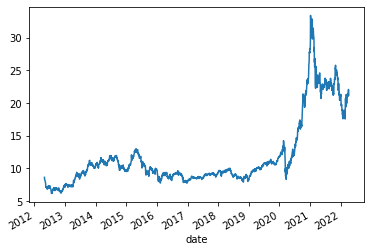

In [410]:
etf_gw['close'].plot() #trendy data! 

In [413]:
#non-stationary data so need differencing I think 


from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(etf_gw.close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.119208
p-value: 0.236861


Since p > 0.05 we need to find the order of differencing 

In [414]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

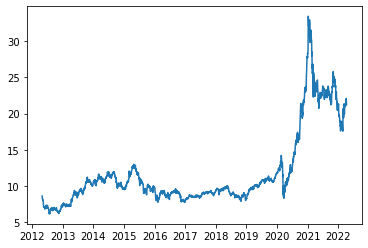

In [419]:
plt.plot(etf_gw.close)

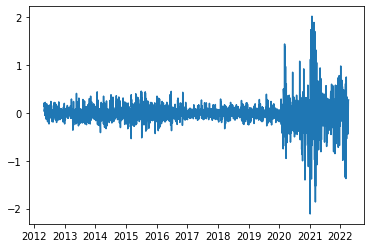

In [418]:
plt.plot(etf_gw.close.diff())

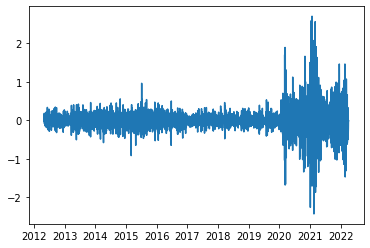

In [420]:
plt.plot(etf_gw.close.diff().diff())

In [ ]:
#autocorrelation

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


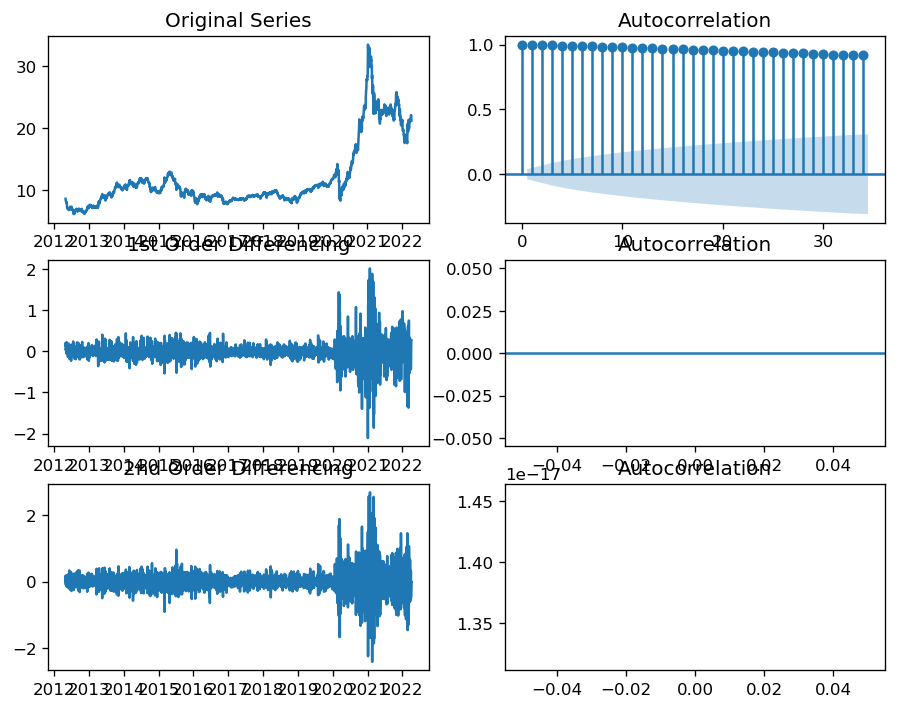

In [422]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(etf_gw.close); axes[0, 0].set_title('Original Series')
plot_acf(etf_gw.close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(etf_gw.close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(etf_gw.close.diff(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(etf_gw.close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(etf_gw.close.diff().diff(), ax=axes[2, 1])

plt.show()

In [423]:
from sklearn.model_selection import train_test_split

In [506]:
X_train, X_test = train_test_split(etf_gw, shuffle = False)

In [507]:
X_train.tail()

1. open  2. high   3. low 4. close 5. volume  article_count  \
date                                                                      
2014-10-31  10.4000  10.4600  10.3600  10.4500     57585            1.0   
2014-10-30  10.2100  10.2900  10.1200  10.2800     10869            0.0   
2014-10-29  10.2600  10.2992  10.1200  10.1700     28051            0.0   
2014-10-28  10.0700  10.2600  10.0700  10.2350    442634            1.0   
2014-10-27  10.0200  10.0200   9.9200   9.9300     18118            2.0   

             close  
date                
2014-10-31  10.450  
2014-10-30  10.280  
2014-10-29  10.170  
2014-10-28  10.235  
2014-10-27   9.930

In [508]:
X_train

1. open  2. high   3. low 4. close 5. volume  article_count  \
date                                                                      
2022-04-08  21.5800  21.5800  21.2200  21.2300   3457758            4.0   
2022-04-07  21.5900  21.8200  21.2600  21.5000   5525993            4.0   
2022-04-06  21.8000  21.9200  21.4800  21.7600   6389603            1.0   
2022-04-05  22.5700  22.7100  21.9450  22.0200   7144712            2.0   
2022-04-04  21.6800  22.1500  21.6700  22.0800   4415980            2.0   
...             ...      ...      ...      ...       ...            ...   
2014-10-31  10.4000  10.4600  10.3600  10.4500     57585            1.0   
2014-10-30  10.2100  10.2900  10.1200  10.2800     10869            0.0   
2014-10-29  10.2600  10.2992  10.1200  10.1700     28051            0.0   
2014-10-28  10.0700  10.2600  10.0700  10.2350    442634            1.0   
2014-10-27  10.0200  10.0200   9.9200   9.9300     18118            2.0   

             close  
date                
2022-04-08  21.230  
2022-04-07  21.500  
2022-04-06  21.760  
2022-04-05  22.020  
2022-04-04  22.080  
...            ...  
2014-10-31  10.450  
2014-10-30  10.280  
2014-10-29  10.170  
2014-10-28  10.235  
2014-10-27   9.930  

[1877 rows x 7 columns]

In [509]:
X_test.head()

1. open  2. high   3. low 4. close 5. volume  article_count  close
date                                                                          
2014-10-24  10.1000  10.1896  10.1000  10.1800      7648            2.0  10.18
2014-10-23  10.2000  10.2000  10.0900  10.1400     35789            0.0  10.14
2014-10-22  10.3300  10.3300  10.0900  10.0900      7123            1.0  10.09
2014-10-21  10.1000  10.2170  10.1000  10.2000     42159            4.0  10.20
2014-10-20   9.7500  10.0300   9.7500  10.0100    127756            0.0  10.01

In [427]:
import pmdarima as pm


In [542]:
model = pm.auto_arima(X_train[['close']], exogenous=X_train[['article_count']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=0, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

model.summary()

/opt/anaconda3/lib/python3.9/site-packages/pmdarima/compat/pmdarima.py:17: DeprecationWarning: The `exogenous` key-word has been deprecated. Please use `X` instead. This will raise an error in future versions. For more information, see: http://alkaline-ml.com/pmdarima/develop/rfc/372-exog-to-x.html
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=493.338, Time=2.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13689.747, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=1.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12618.410, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=496.943, Time=2.67 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=476.081, Time=2.44 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=10415.383, Time=1.00 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=477.353, Time=3.02 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=476.298, Time=2.94 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=8649.233, Time=1.82 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=475.350, Time=3.33 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=486.904, Time=3.71 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=499.251, Time=3.74 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=472.496, Time=3.80 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=47

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1877
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -224.620
Date:                Sun, 17 Apr 2022   AIC                            467.240
Time:                        13:31:50   BIC                            517.077
Sample:                             0   HQIC                           485.598
                               - 1877                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.0693      0.054      1.285      0.199      -0.036       0.175
article_count     0.0042      0.003      1.430      0.153      -0.002       0.010
ar.L1            -0.6059      0.018    -33.872      0.000      -0.641      -0.571
ar.L2             0.7114      0.013     56.902      0.000       0.687       0.736
ar.L3             0.8896      0.020     43.989      0.000       0.850       0.929
ma.L1             1.6518      0.023     72.867      0.000       1.607       1.696
ma.L2             1.0274      0.026     38.978      0.000       0.976       1.079
ma.L3             0.1034      0.013      8.125      0.000       0.078       0.128
sigma2            0.0739      0.001     74.212      0.000       0.072       0.076
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):             11978.12
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [543]:
model.summary() #contribution is a bit small for article count but we can forecast - as article count goes up, the price trends up

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1877
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -224.620
Date:                Sun, 17 Apr 2022   AIC                            467.240
Time:                        13:31:55   BIC                            517.077
Sample:                             0   HQIC                           485.598
                               - 1877                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.0693      0.054      1.285      0.199      -0.036       0.175
article_count     0.0042      0.003      1.430      0.153      -0.002       0.010
ar.L1            -0.6059      0.018    -33.872      0.000      -0.641      -0.571
ar.L2             0.7114      0.013     56.902      0.000       0.687       0.736
ar.L3             0.8896      0.020     43.989      0.000       0.850       0.929
ma.L1             1.6518      0.023     72.867      0.000       1.607       1.696
ma.L2             1.0274      0.026     38.978      0.000       0.976       1.079
ma.L3             0.1034      0.013      8.125      0.000       0.078       0.128
sigma2            0.0739      0.001     74.212      0.000       0.072       0.076
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):             11978.12
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [544]:
model.predict(len(X_test.close), X=X_test[['article_count']])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:380: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  warnings.warn('No supported index is available. In the next'


array([ 9.92469974,  9.89446836,  9.92519645,  9.93523527,  9.91940498,
        9.94044092,  9.93033929,  9.95917885,  9.94432959,  9.95719063,
        9.96507886,  9.95819109,  9.9871207 ,  9.97636673,  9.99298538,
        9.99482045,  9.99415512, 10.00566599, 10.00105   , 10.02290836,
       10.02973479, 10.02935911, 10.04079521, 10.07274493, 10.1065874 ,
       10.06121765, 10.06366131, 10.06750167, 10.06837543, 10.07529315,
       10.07211074, 10.0844117 , 10.09018029, 10.09758644, 10.10271775,
       10.10021047, 10.10865283, 10.11308838, 10.11793756, 10.12566518,
       10.13683514, 10.14077394, 10.14885835, 10.14628868, 10.15273033,
       10.15644549, 10.16824253, 10.16780159, 10.17419588, 10.17974896,
       10.18853073, 10.19118215, 10.19519276, 10.21016433, 10.20673355,
       10.2118905 , 10.21813685, 10.2267202 , 10.23311264, 10.23789418,
       10.23919019, 10.24915953, 10.25386462, 10.25578388, 10.26474159,
       10.27889182, 10.28004703, 10.28081399, 10.28668193, 10.29

In [545]:
fitted, confint = model.predict(n_periods=len(X_test.close), 
                                  exogenous=np.tile(X_test[['article_count']], 1).reshape(-1,1), 
                                  return_conf_int=True)

/opt/anaconda3/lib/python3.9/site-packages/pmdarima/compat/pmdarima.py:17: DeprecationWarning: The `exogenous` key-word has been deprecated. Please use `X` instead. This will raise an error in future versions. For more information, see: http://alkaline-ml.com/pmdarima/develop/rfc/372-exog-to-x.html
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:380: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  warnings.warn('No supported index is available. In the next'


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:380: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  warnings.warn('No supported index is available. In the next'


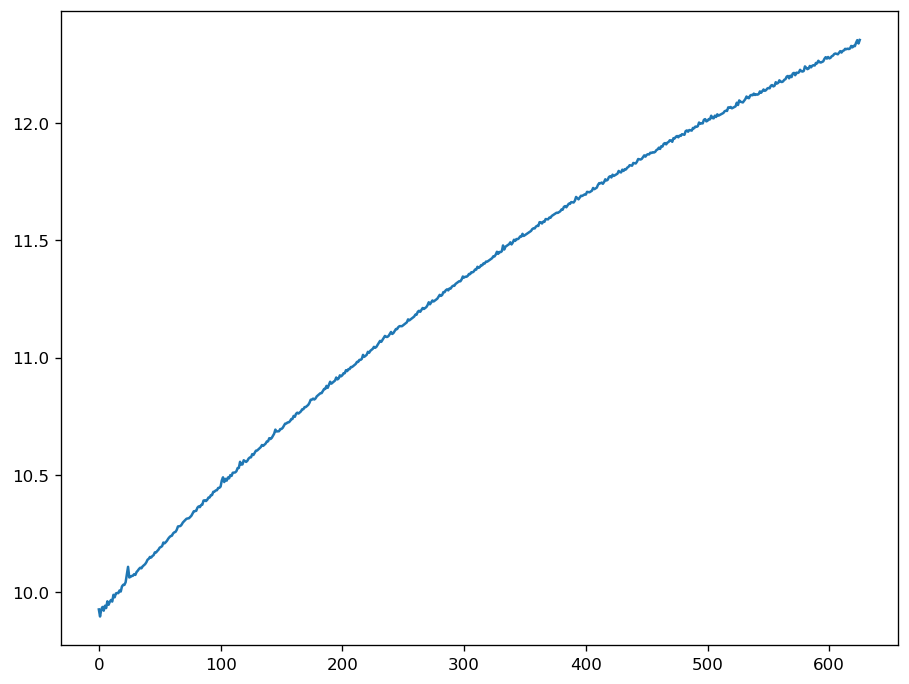

In [546]:
plt.plot(model.predict(len(X_test.close), X=X_test[['article_count']]))


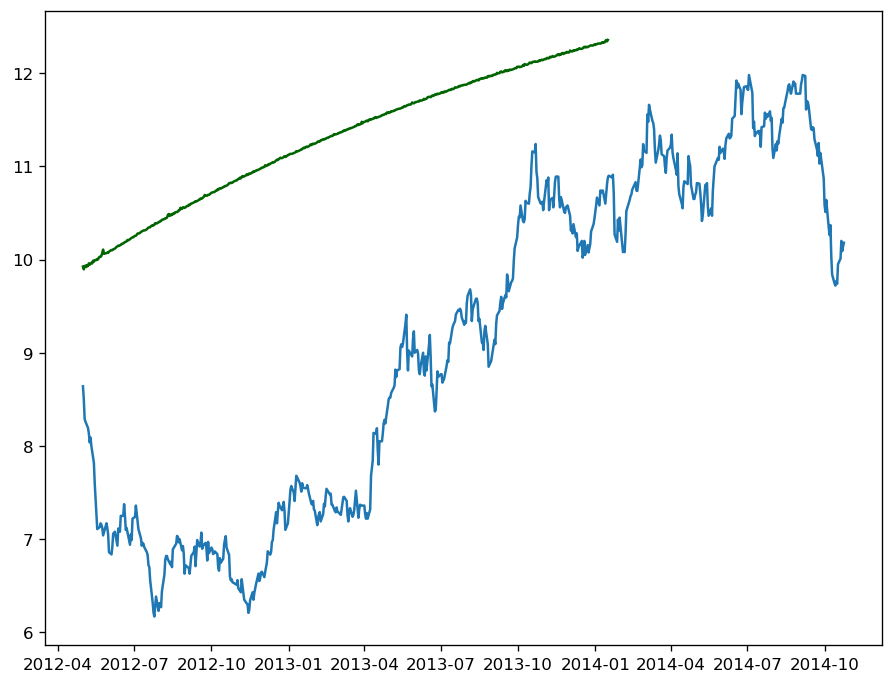

In [547]:
index_of_fc = pd.date_range(X_test.index[-1], periods = len(X_test.close), freq='D')
fitted_series = pd.Series(fitted, index=index_of_fc)
plt.plot(fitted_series, color='darkgreen')

plt.plot(X_test.index, X_test.close) 

In [463]:
X_test

1. open  2. high   3. low 4. close 5. volume  article_count  \
date                                                                      
2014-10-24  10.1000  10.1896  10.1000  10.1800      7648            2.0   
2014-10-23  10.2000  10.2000  10.0900  10.1400     35789            0.0   
2014-10-22  10.3300  10.3300  10.0900  10.0900      7123            1.0   
2014-10-21  10.1000  10.2170  10.1000  10.2000     42159            4.0   
2014-10-20   9.7500  10.0300   9.7500  10.0100    127756            0.0   
...             ...      ...      ...      ...       ...            ...   
2012-05-07   8.2500   8.2500   8.1200   8.1940     14500            0.0   
2012-05-04   8.2500   8.3300   8.2100   8.2600     50700            3.0   
2012-05-03   8.4700   8.4700   8.2650   8.2900     21000            5.0   
2012-05-02   8.4600   8.5300   8.4300   8.5000     18000            1.0   
2012-05-01   8.4600   8.6500   8.4600   8.6400      9100            4.0   

             close  
date                
2014-10-24  10.180  
2014-10-23  10.140  
2014-10-22  10.090  
2014-10-21  10.200  
2014-10-20  10.010  
...            ...  
2012-05-07   8.194  
2012-05-04   8.260  
2012-05-03   8.290  
2012-05-02   8.500  
2012-05-01   8.640  

[626 rows x 7 columns]

In [468]:
X_test.close

date
2014-10-24    10.180
2014-10-23    10.140
2014-10-22    10.090
2014-10-21    10.200
2014-10-20    10.010
               ...  
2012-05-07     8.194
2012-05-04     8.260
2012-05-03     8.290
2012-05-02     8.500
2012-05-01     8.640
Name: close, Length: 626, dtype: float64

In [469]:
X_test.article_count

date
2014-10-24    2.0
2014-10-23    0.0
2014-10-22    1.0
2014-10-21    4.0
2014-10-20    0.0
             ... 
2012-05-07    0.0
2012-05-04    3.0
2012-05-03    5.0
2012-05-02    1.0
2012-05-01    4.0
Name: article_count, Length: 626, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:380: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  warnings.warn('No supported index is available. In the next'


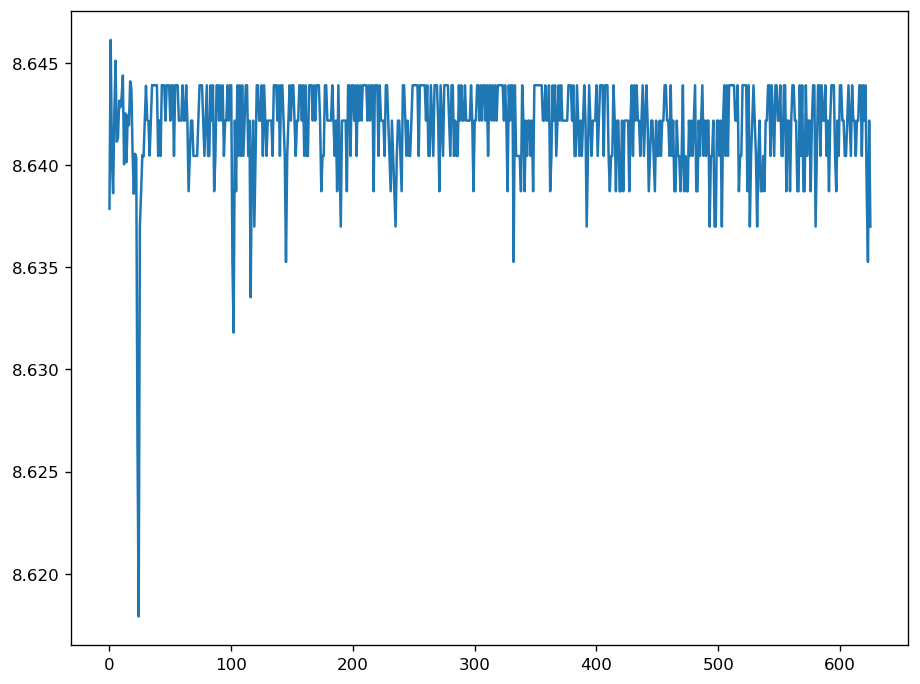

In [505]:
plt.plot(model.predict(len(X_test.close), X=X_test[['article_count']]))



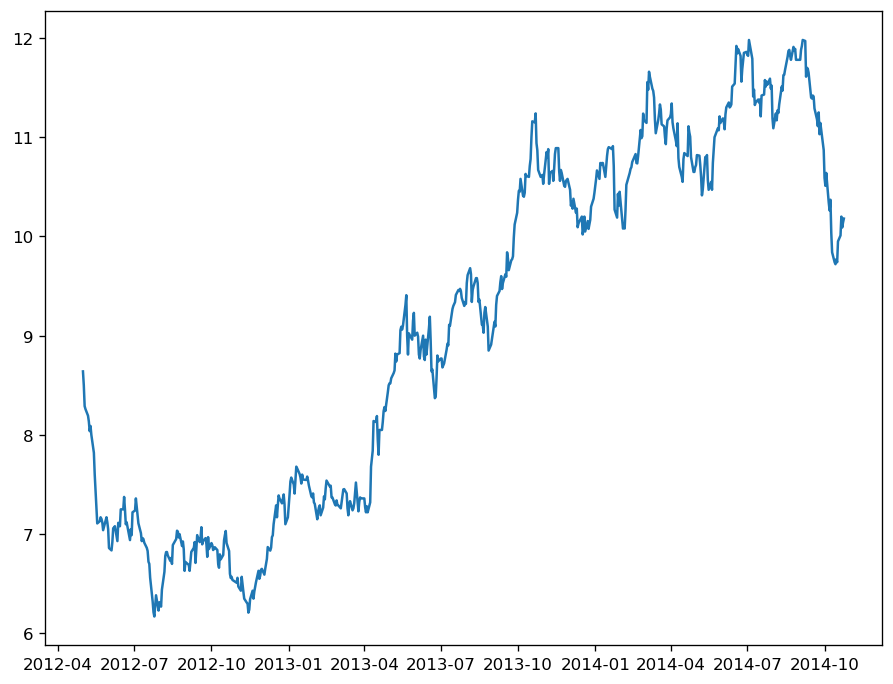

In [467]:
plt.plot(X_test.index, X_test.close)

In [449]:
len(X_test.article_count)

626

In [451]:
#Let's forecast on the test data 


fitted, confint = model.predict(n_periods=24,
                                exogenous=np.tile(X_test.article_count, 2).reshape(-1, 1),return_conf_int=True)
                                
                            


/opt/anaconda3/lib/python3.9/site-packages/pmdarima/compat/pmdarima.py:17: DeprecationWarning: The `exogenous` key-word has been deprecated. Please use `X` instead. This will raise an error in future versions. For more information, see: http://alkaline-ml.com/pmdarima/develop/rfc/372-exog-to-x.html
  warnings.warn(


ValueError: X array dims (n_rows) != n_periods

In [ ]:
# SARIMAX Model


model = pm.auto_arima(X_train[['close']], exogenous=X_train[['article_count']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=None, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

In [502]:
#Can I accurately predict The last 10 months? 

#2503 rows 

test = etf_gw[0:626]


train = etf_gw[626:]
train


1. open  2. high   3. low 4. close 5. volume  article_count  \
date                                                                      
2019-10-15  10.9300  10.9500  10.8500  10.8800    881344            3.0   
2019-10-14  11.0400  11.0600  10.9500  11.0000    173523            2.0   
2019-10-11  11.1000  11.1500  11.0400  11.0400    220763            3.0   
2019-10-10  10.9300  11.0700  10.9000  10.9900    212598            2.0   
2019-10-09  11.0000  11.0200  10.9000  10.9800    203647            5.0   
...             ...      ...      ...      ...       ...            ...   
2012-05-07   8.2500   8.2500   8.1200   8.1940     14500            0.0   
2012-05-04   8.2500   8.3300   8.2100   8.2600     50700            3.0   
2012-05-03   8.4700   8.4700   8.2650   8.2900     21000            5.0   
2012-05-02   8.4600   8.5300   8.4300   8.5000     18000            1.0   
2012-05-01   8.4600   8.6500   8.4600   8.6400      9100            4.0   

             close  
date                
2019-10-15  10.880  
2019-10-14  11.000  
2019-10-11  11.040  
2019-10-10  10.990  
2019-10-09  10.980  
...            ...  
2012-05-07   8.194  
2012-05-04   8.260  
2012-05-03   8.290  
2012-05-02   8.500  
2012-05-01   8.640  

[1877 rows x 7 columns]

In [503]:
model = pm.auto_arima(train[['close']], exogenous=train[['article_count']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3,
                           start_P=0, seasonal=False,
                           d=1, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

model.summary()

/opt/anaconda3/lib/python3.9/site-packages/pmdarima/compat/pmdarima.py:17: DeprecationWarning: The `exogenous` key-word has been deprecated. Please use `X` instead. This will raise an error in future versions. For more information, see: http://alkaline-ml.com/pmdarima/develop/rfc/372-exog-to-x.html
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2628.880, Time=2.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2623.995, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2624.464, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2624.501, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2625.809, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2620.581, Time=1.76 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2626.951, Time=1.90 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2622.630, Time=0.50 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2622.573, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2624.908, Time=1.89 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2630.700, Time=1.43 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-2626.330, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2626.293, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-2622.407, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1877
Model:               SARIMAX(1, 1, 1)   Log Likelihood                1319.350
Date:                Sun, 17 Apr 2022   AIC                          -2630.700
Time:                        12:38:23   BIC                          -2608.552
Sample:                             0   HQIC                         -2622.542
                               - 1877                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
article_count    -0.0017      0.002     -0.983      0.326      -0.005       0.002
ar.L1            -0.8581      0.065    -13.264      0.000      -0.985      -0.731
ma.L1             0.8935      0.057     15.657      0.000       0.782       1.005
sigma2            0.0143      0.000     39.147      0.000       0.014       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               149.42
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test[start_date:end_date]),
exogenous = df_test[[“ret_spx”,”ret_dax”,”ret_nikkei”]][start_date:end_date]),
index = df_test[start_date:end_date].index)

/opt/anaconda3/lib/python3.9/site-packages/pmdarima/compat/pmdarima.py:17: DeprecationWarning: The `exogenous` key-word has been deprecated. Please use `X` instead. This will raise an error in future versions. For more information, see: http://alkaline-ml.com/pmdarima/develop/rfc/372-exog-to-x.html
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:380: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  warnings.warn('No supported index is available. In the next'


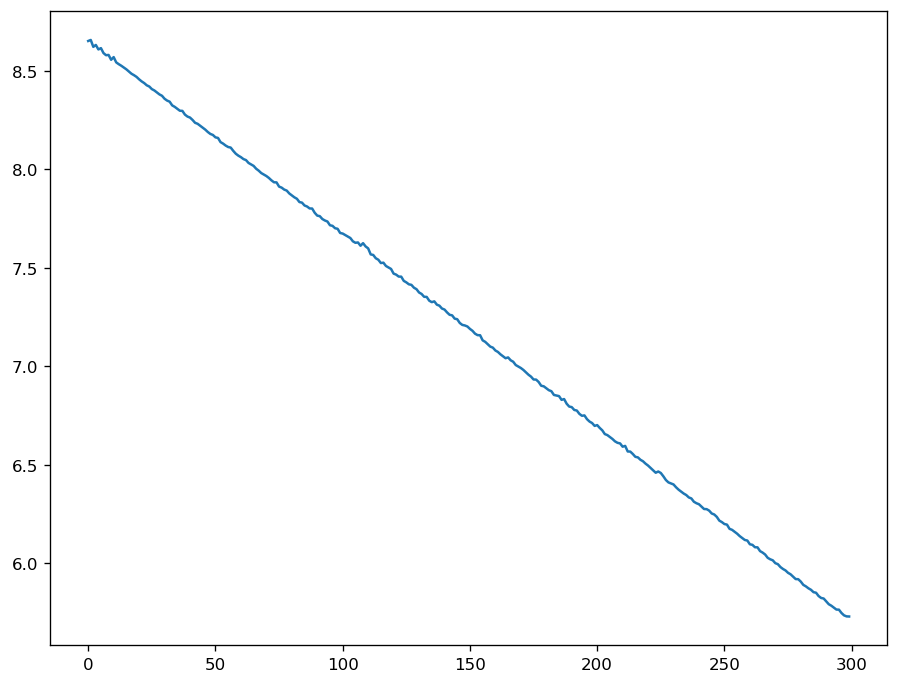

In [501]:
plt.plot(model.predict(n_periods=(len(test)), exogenous= test[['article_count']]))



## Try everything with volume!!

In [549]:
etf_gw['volume'] = pd.to_numeric(etf_gw['5. volume']) 

<AxesSubplot:xlabel='date'>

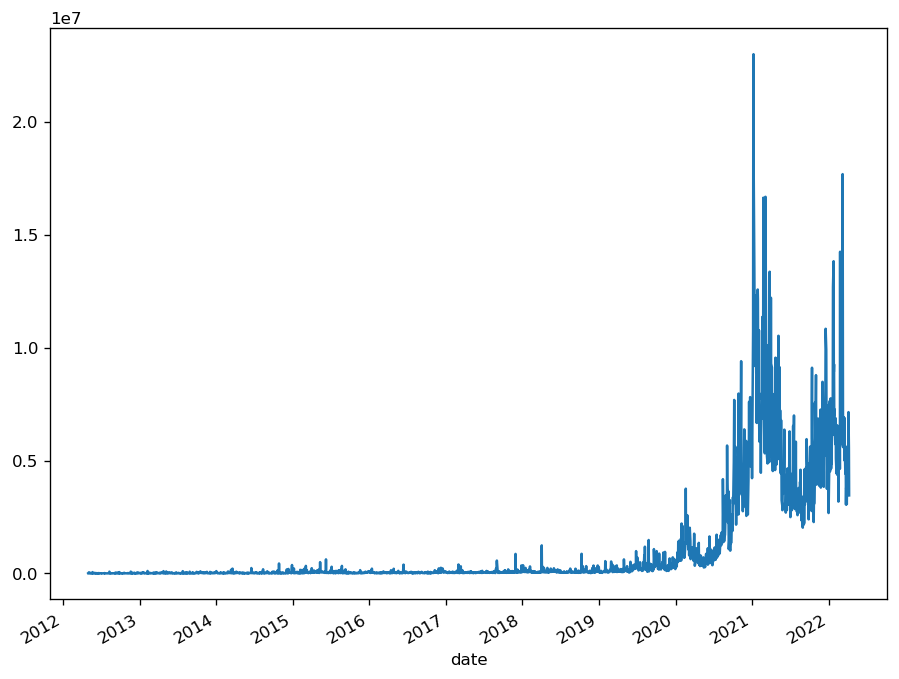

In [552]:
etf_gw['volume'].plot() 

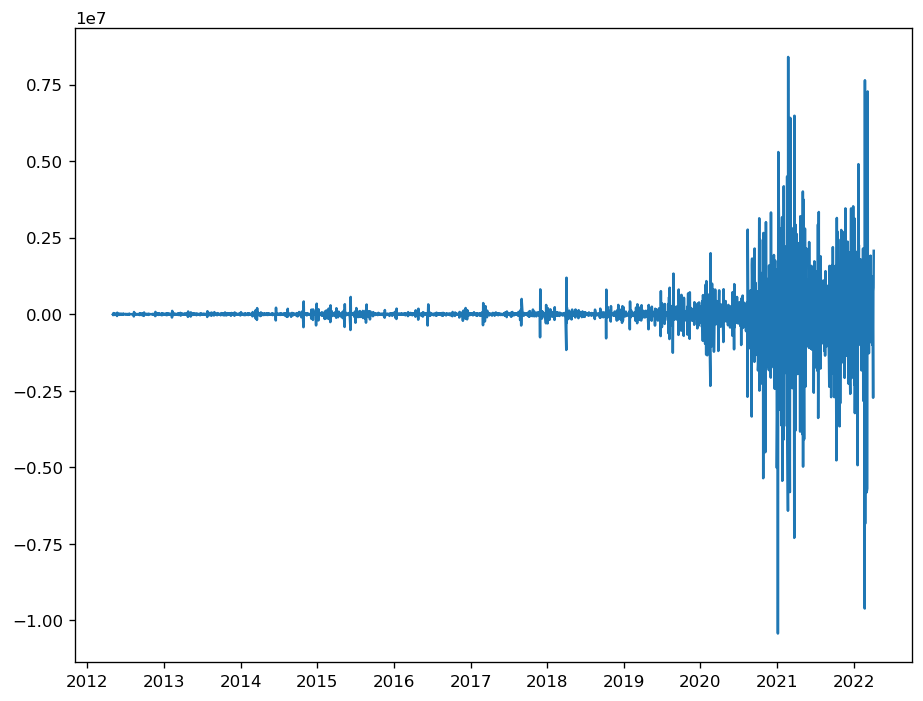

In [553]:
plt.plot(etf_gw.volume.diff())

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


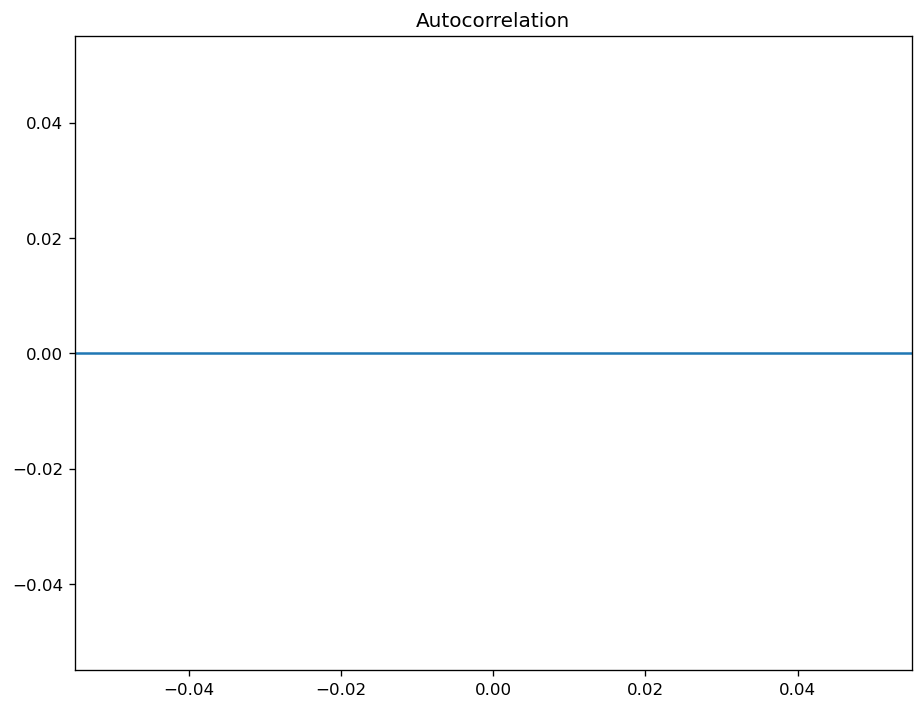

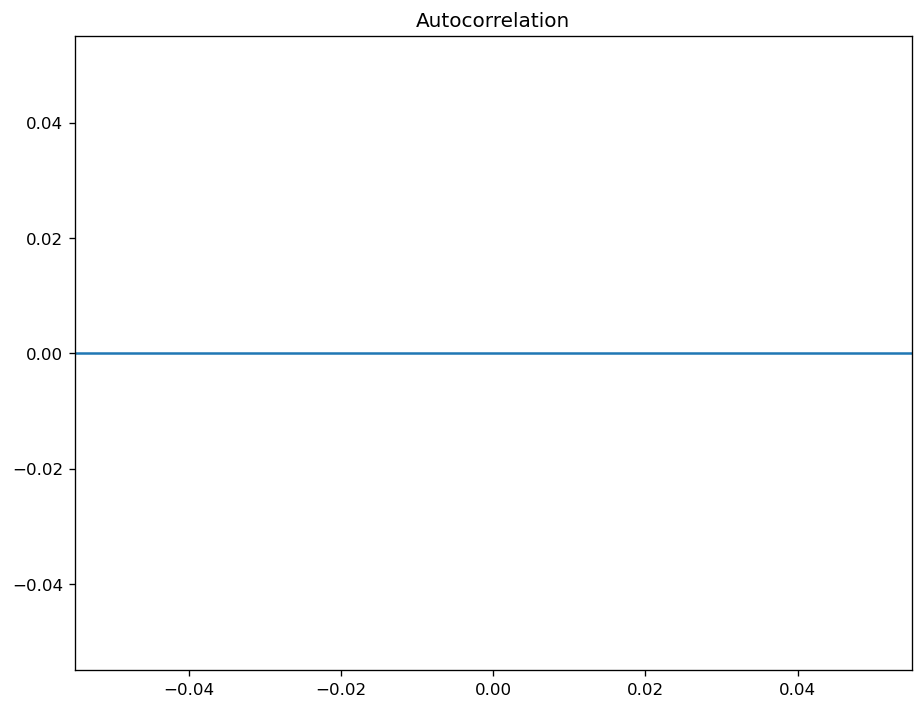

In [555]:
plot_acf(etf_gw.volume.diff())

In [557]:
X_train, X_test = train_test_split(etf_gw, shuffle = False)

In [565]:
model = pm.auto_arima(X_train[['volume']], exogenous=X_train[['article_count']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

model.summary()

/opt/anaconda3/lib/python3.9/site-packages/pmdarima/compat/pmdarima.py:17: DeprecationWarning: The `exogenous` key-word has been deprecated. Please use `X` instead. This will raise an error in future versions. For more information, see: http://alkaline-ml.com/pmdarima/develop/rfc/372-exog-to-x.html
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=57071.146, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57412.008, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57283.408, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=57225.000, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=69674.232, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=57071.351, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=57068.391, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=57131.997, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=57066.419, Time=0.90 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=57066.531, Time=1.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=57062.292, Time=1.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=57061.732, Time=0.78 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=57082.127, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=57056.941, Time=0.73 sec
 ARIMA(0,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1877
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -28505.438
Date:                Sun, 17 Apr 2022   AIC                          57026.875
Time:                        13:53:11   BIC                          57071.170
Sample:                             0   HQIC                         57043.192
                               - 1877                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
article_count  3.961e+04   1.35e+04      2.937      0.003    1.32e+04     6.6e+04
ar.L1            -0.5559      0.017    -32.687      0.000      -0.589      -0.523
ar.L2            -0.2939      0.017    -17.811      0.000      -0.326      -0.262
ar.L3             0.5185      0.012     44.412      0.000       0.496       0.541
ma.L1             0.1454      0.014     10.071      0.000       0.117       0.174
ma.L2            -0.0657      0.014     -4.733      0.000      -0.093      -0.038
ma.L3            -0.8446      0.011    -80.404      0.000      -0.865      -0.824
sigma2         9.464e+11      0.003      3e+14      0.000    9.46e+11    9.46e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):             35151.78
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             1.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.68e+29. Standard errors may be unstable.
"""

In [566]:
model.predict(len(X_test.volume), X=X_test[['article_count']])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:380: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  warnings.warn('No supported index is available. In the next'


array([ 59075.23784185, -25263.4569017 ,  18525.32731927, 157772.89998846,
       -15898.61528167, -11266.00165755,  40832.27595089,  64240.99702769,
        -7241.5969022 ,  39304.37811681, -14835.36722341,  -4785.60326458,
        76714.7050065 ,  25349.70487051,  76034.3640614 ,  34905.80446873,
        26399.97480425,  -2293.22188173,  -6648.89754732,  67373.25475418,
       116812.79898743,  71008.17960355,  68867.60215824, 393853.96858119,
       584814.08600835, 149553.29918009, 115981.59041916,  69207.79235509,
        71647.56628535,  35917.83069644, -10280.45502386,  33116.29121292,
        34959.56972314,  69015.77686796,  33914.70120219,  -5613.4560371 ,
        -9863.65806502,  -5187.32849303,  -6495.17456735,  -9346.33773184,
        74267.36782581,  32374.92176878,  70483.85880915,  -4952.48699112,
        -7797.92065695,  -8106.48162084,  34472.94009087,  -8172.27258375,
        -7517.81083984,  -5449.79171712,  31244.39819708,  -7013.23395888,
        -5835.68544324,  

In [567]:
fitted, confint = model.predict(n_periods=len(X_test.volume), 
                                  exogenous=np.tile(X_test[['article_count']], 1).reshape(-1,1), 
                                  return_conf_int=True)

/opt/anaconda3/lib/python3.9/site-packages/pmdarima/compat/pmdarima.py:17: DeprecationWarning: The `exogenous` key-word has been deprecated. Please use `X` instead. This will raise an error in future versions. For more information, see: http://alkaline-ml.com/pmdarima/develop/rfc/372-exog-to-x.html
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:380: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  warnings.warn('No supported index is available. In the next'


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:380: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  warnings.warn('No supported index is available. In the next'


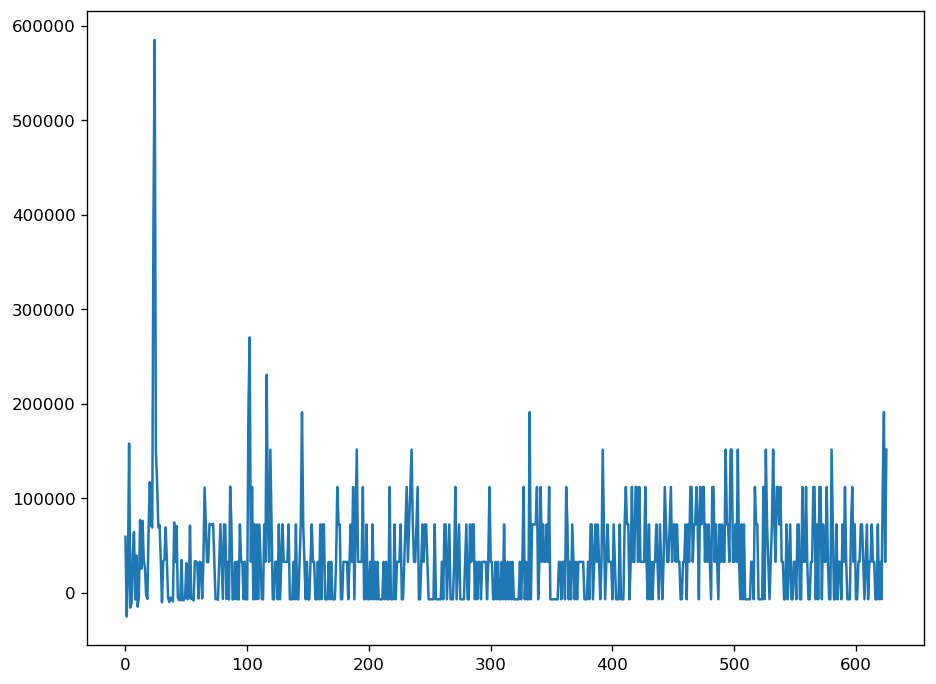

In [568]:
plt.plot(model.predict(len(X_test.volume), X=X_test[['article_count']]))

In [ ]:
fitted, confint = model.predict(n_periods=len(X_test.volume), 
                                  exogenous=np.tile(X_test[['article_count']], 1).reshape(-1,1), 
                                  return_conf_int=True)

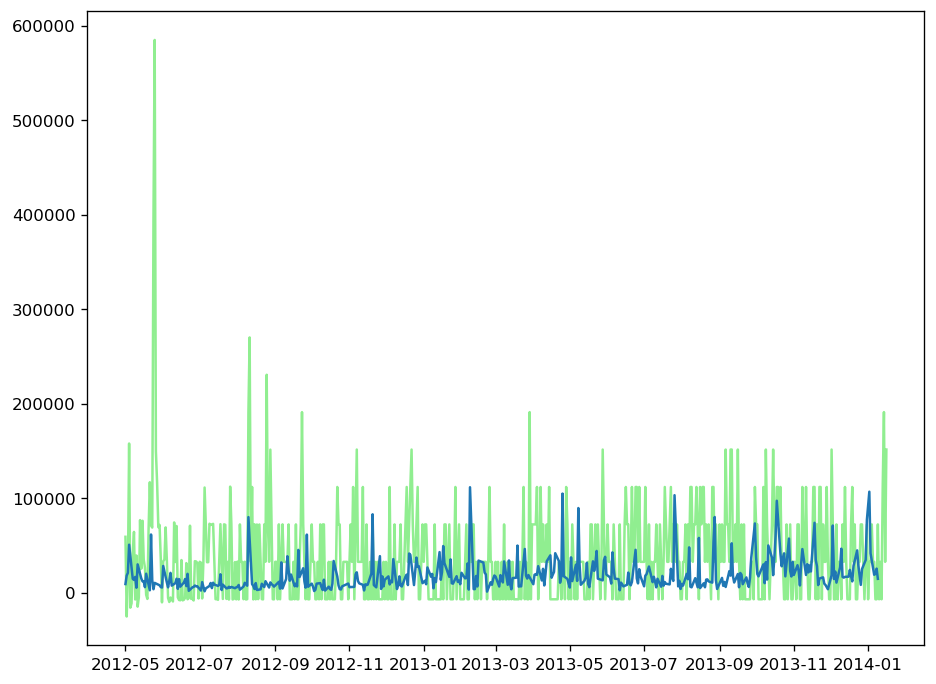

In [585]:
index_of_fc = pd.date_range(X_test.index[-1], periods = len(X_test.volume), freq='D')
fitted_series = pd.Series(fitted, index=index_of_fc)
plt.plot(fitted_series, color='lightgreen')

plt.plot(X_test.index[200:], X_test.volume[200:])

1. open  2. high   3. low 4. close 5. volume  article_count  \
date                                                                      
2014-10-24  10.1000  10.1896  10.1000  10.1800      7648            2.0   
2014-10-23  10.2000  10.2000  10.0900  10.1400     35789            0.0   
2014-10-22  10.3300  10.3300  10.0900  10.0900      7123            1.0   
2014-10-21  10.1000  10.2170  10.1000  10.2000     42159            4.0   
2014-10-20   9.7500  10.0300   9.7500  10.0100    127756            0.0   
...             ...      ...      ...      ...       ...            ...   
2012-05-07   8.2500   8.2500   8.1200   8.1940     14500            0.0   
2012-05-04   8.2500   8.3300   8.2100   8.2600     50700            3.0   
2012-05-03   8.4700   8.4700   8.2650   8.2900     21000            5.0   
2012-05-02   8.4600   8.5300   8.4300   8.5000     18000            1.0   
2012-05-01   8.4600   8.6500   8.4600   8.6400      9100            4.0   

             close  volume  
date                        
2014-10-24  10.180    7648  
2014-10-23  10.140   35789  
2014-10-22  10.090    7123  
2014-10-21  10.200   42159  
2014-10-20  10.010  127756  
...            ...     ...  
2012-05-07   8.194   14500  
2012-05-04   8.260   50700  
2012-05-03   8.290   21000  
2012-05-02   8.500   18000  
2012-05-01   8.640    9100  

[626 rows x 8 columns]

# Non-Negative Matrix Factorization

In [604]:
df_news

headline        date  \
0       Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01   
1       Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01   
2       Agency Pulls Back on Its Warning Against Talk ...  2018-12-01   
3       A China Hawk Gains Prominence as Trump Confron...  2018-12-01   
4                          Wilmer Flores Is a Met No More  2018-12-01   
...                                                   ...         ...   
686366  Songs and Sunscreen Spread the Health Insuranc...  2013-07-31   
686367                 Reluctantly Returning to the Stage  2013-07-31   
686368                     Mets Decline to Make Any Moves  2013-07-31   
686370  Documents Show Thatcher-Reagan Rift Over U.S. ...  2013-07-31   
686371        Crowds Return to Las Vegas, but Gamble Less  2013-07-31   

       doc_type material_type  section  \
0       article          News      NaN   
1       article          News      NaN   
2       article          News      NaN   
3       article          News      NaN   
4       article          News      NaN   
...         ...           ...      ...   
686366  article          News      NaN   
686367  article          News      NaN   
686368  article          News      NaN   
686370  article          News      NaN   
686371  article          News      NaN   

                                                 keywords  \
0       ['Books and Literature', 'United States Politi...   
1                       ['Football', 'Domestic Violence']   
2                                    ['Hatch Act (1939)']   
3       ['United States International Relations', 'Uni...   
4                                            ['Baseball']   
...                                                   ...   
686366  ['Health Insurance and Managed Care', 'ADVERTI...   
686367                            ['Fashion and Apparel']   
686368                                       ['Baseball']   
686370                        ['International Relations']   
686371  ['Economic Conditions and Trends', 'Gambling',...   

                                                 abstract  \
0       President Trump, who is not a reader, has used...   
1       Hunt, a star running back, was also suspended ...   
2       Casual conversations about impeachment and inv...   
3       Michael Pillsbury, the president’s top outside...   
4       A fan favorite, Flores did not receive a contr...   
...                                                   ...   
686366  Advertising is upbeat in the states that are s...   
686367  Sarah Phillips introduces new designs, two dec...   
686368  The Mets remained inactive as baseball’s nonwa...   
686370  Documents released by the British government s...   
686371  Though tourists have returned, and jobs and co...   

                                           lead_paragraph  \
0       WASHINGTON — President Trump, a leader who is ...   
1       The Kansas City Chiefs cut their star running ...   
2       WASHINGTON — An independent government agency,...   
3       WASHINGTON — Michael Pillsbury had just finish...   
4       The Mets parted ways with a fan favorite, Wilm...   
...                                                   ...   
686366  THE part of President Obama’s Affordable Care ...   
686367  When fashionable types talk about the 1990s re...   
686368  MIAMI — The Mets remained inactive as baseball...   
686370  LONDON — Thirty-year-old documents newly relea...   
686371  LAS VEGAS — When the last recession battered t...   

                                               keystrings  \
0       ['Books and Literature', 'United States Politi...   
1                       ['Football', 'Domestic Violence']   
2                                    ['Hatch Act (1939)']   
3       ['United States International Relations', 'Uni...   
4                                            ['Baseball']   
...                                                   ...   
686366  ['Health Insurance and Managed Ca

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


In [7]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

# Contraction map
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens


def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text


def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]  


def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


def whitespace_tokenizer(text): 
    pattern = r"(?u)\b\w\w+\b" 
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens


# Funtion to remove duplicate words
def unique_words(text): 
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))

In [8]:
# Processed text 

df_news['processed_text'] = df_news['text'].apply(process_text)
df_news['processed_text']

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_1626/10433245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['processed_text'] = df_news['text'].apply(process_text)


0         [trump, book, club, presid, doesn, read, promo...
1         [kareem, hunt, cut, chief, video, attack, woma...
2         [agenc, pull, warn, talk, resist, feder, workp...
3         [china, hawk, gain, promin, trump, confront, x...
4         [wilmer, flore, met, fan, favorit, flore, did,...
                                ...                        
687263    [song, sunscreen, spread, health, insur, messa...
687264    [reluct, return, stage, sarah, phillip, introd...
687265    [met, declin, make, ani, met, remain, inact, b...
687267    [document, thatcher-reagan, rift, decis, invad...
687268    [crowd, return, las, vega, gambl, tourist, ret...
Name: processed_text, Length: 481555, dtype: object

In [9]:
df_news

headline        date  \
0       Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01   
1       Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01   
2       Agency Pulls Back on Its Warning Against Talk ...  2018-12-01   
3       A China Hawk Gains Prominence as Trump Confron...  2018-12-01   
4                          Wilmer Flores Is a Met No More  2018-12-01   
...                                                   ...         ...   
687263  Songs and Sunscreen Spread the Health Insuranc...  2013-07-31   
687264                 Reluctantly Returning to the Stage  2013-07-31   
687265                     Mets Decline to Make Any Moves  2013-07-31   
687267  Documents Show Thatcher-Reagan Rift Over U.S. ...  2013-07-31   
687268        Crowds Return to Las Vegas, but Gamble Less  2013-07-31   

       doc_type material_type  section  \
0       article          News      NaN   
1       article          News      NaN   
2       article          News      NaN   
3       article          News      NaN   
4       article          News      NaN   
...         ...           ...      ...   
687263  article          News      NaN   
687264  article          News      NaN   
687265  article          News      NaN   
687267  article          News      NaN   
687268  article          News      NaN   

                                                 keywords  \
0       ['Books and Literature', 'United States Politi...   
1                       ['Football', 'Domestic Violence']   
2                                    ['Hatch Act (1939)']   
3       ['United States International Relations', 'Uni...   
4                                            ['Baseball']   
...                                                   ...   
687263  ['Health Insurance and Managed Care', 'ADVERTI...   
687264                            ['Fashion and Apparel']   
687265                                       ['Baseball']   
687267                        ['International Relations']   
687268  ['Economic Conditions and Trends', 'Gambling',...   

                                                 abstract  \
0       President Trump, who is not a reader, has used...   
1       Hunt, a star running back, was also suspended ...   
2       Casual conversations about impeachment and inv...   
3       Michael Pillsbury, the president’s top outside...   
4       A fan favorite, Flores did not receive a contr...   
...                                                   ...   
687263  Advertising is upbeat in the states that are s...   
687264  Sarah Phillips introduces new designs, two dec...   
687265  The Mets remained inactive as baseball’s nonwa...   
687267  Documents released by the British government s...   
687268  Though tourists have returned, and jobs and co...   

                                           lead_paragraph  \
0       WASHINGTON — President Trump, a leader who is ...   
1       The Kansas City Chiefs cut their star running ...   
2       WASHINGTON — An independent government agency,...   
3       WASHINGTON — Michael Pillsbury had just finish...   
4       The Mets parted ways with a fan favorite, Wilm...   
...                                                   ...   
687263  THE part of President Obama’s Affordable Care ...   
687264  When fashionable types talk about the 1990s re...   
687265  MIAMI — The Mets remained inactive as baseball...   
687267  LONDON — Thirty-year-old documents newly relea...   
687268  LAS VEGAS — When the last recession battered t...   

                                        headline_abstract  \
0       Trump’s Book Club: A President Who Doesn’t Rea...   
1       Kareem Hunt Is Cut by the Chiefs After a Video...   
2       Agency Pulls Back on Its Warning Against Talk ...   
3       A China Hawk Gains Prominence as Trump Confron...   
4       Wilmer Flores Is a Met No More A fan favorite,...   
...                                                   ...   
687263  Songs and Sunscreen Spread the He

In [9]:
df_news['processed_text_string'] = ' '.join([str(item) for item in df_news['processed_text']])
                                             
                                             
                                             
                                             

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_1626/2070971296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['processed_text_string'] = ' '.join([str(item) for item in df_news['processed_text']])


In [614]:
# Get the average word count per text 
df_news['word_count'] = df_news['text'].apply(word_count)
df_news['word_count'].mean()

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_4476/2844016124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['word_count'] = df_news['text'].apply(word_count)


38.20655243402857

In [616]:
# Descriptive statistics for word count
df_news['word_count'].describe()

count    480890.000000
mean         38.206552
std          11.234277
min           3.000000
25%          31.000000
50%          39.000000
75%          45.000000
max         204.000000
Name: word_count, dtype: float64

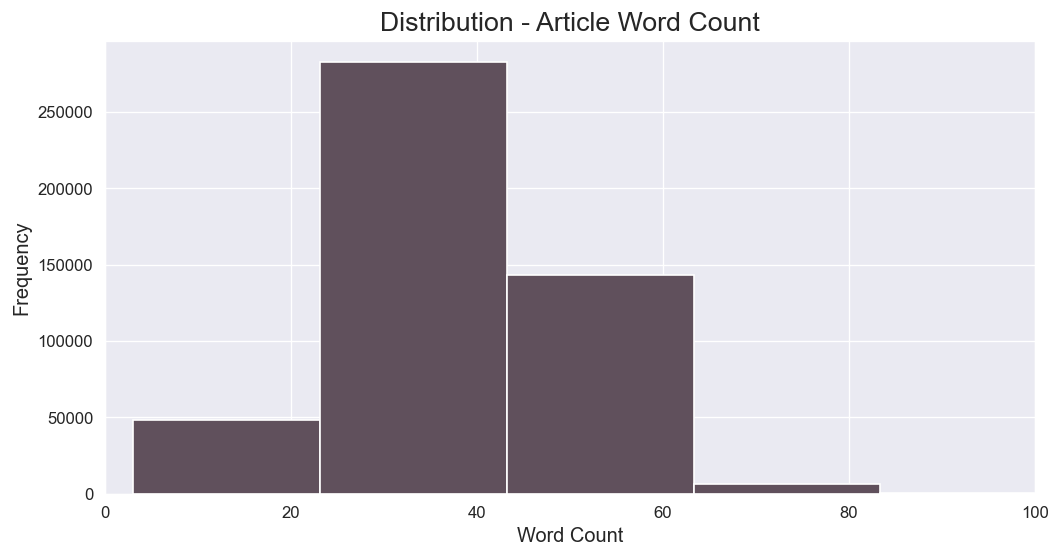

In [626]:
# Plot a hist of the word counts
fig = plt.figure(figsize=(10,5))

plt.hist(
    df_news['word_count'],
    bins=10,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.xlim(0, 100)






plt.show()

In [627]:
# Get the top 20 most common words among all the articles
p_text = df_news['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

word  frequency
0           new      94821
1         state      90637
2          unit      68647
3         polit      60323
4        govern      58673
5         elect      44817
6          year      38681
7          york      33388
8         trump      32575
9        presid      32530
10         time      31738
11         week      30467
12         hous      30169
13  coronavirus      29089
14        world      26746
15        peopl      25938
16       intern      25300
17        music      25290
18         citi      25206
19          day      24572

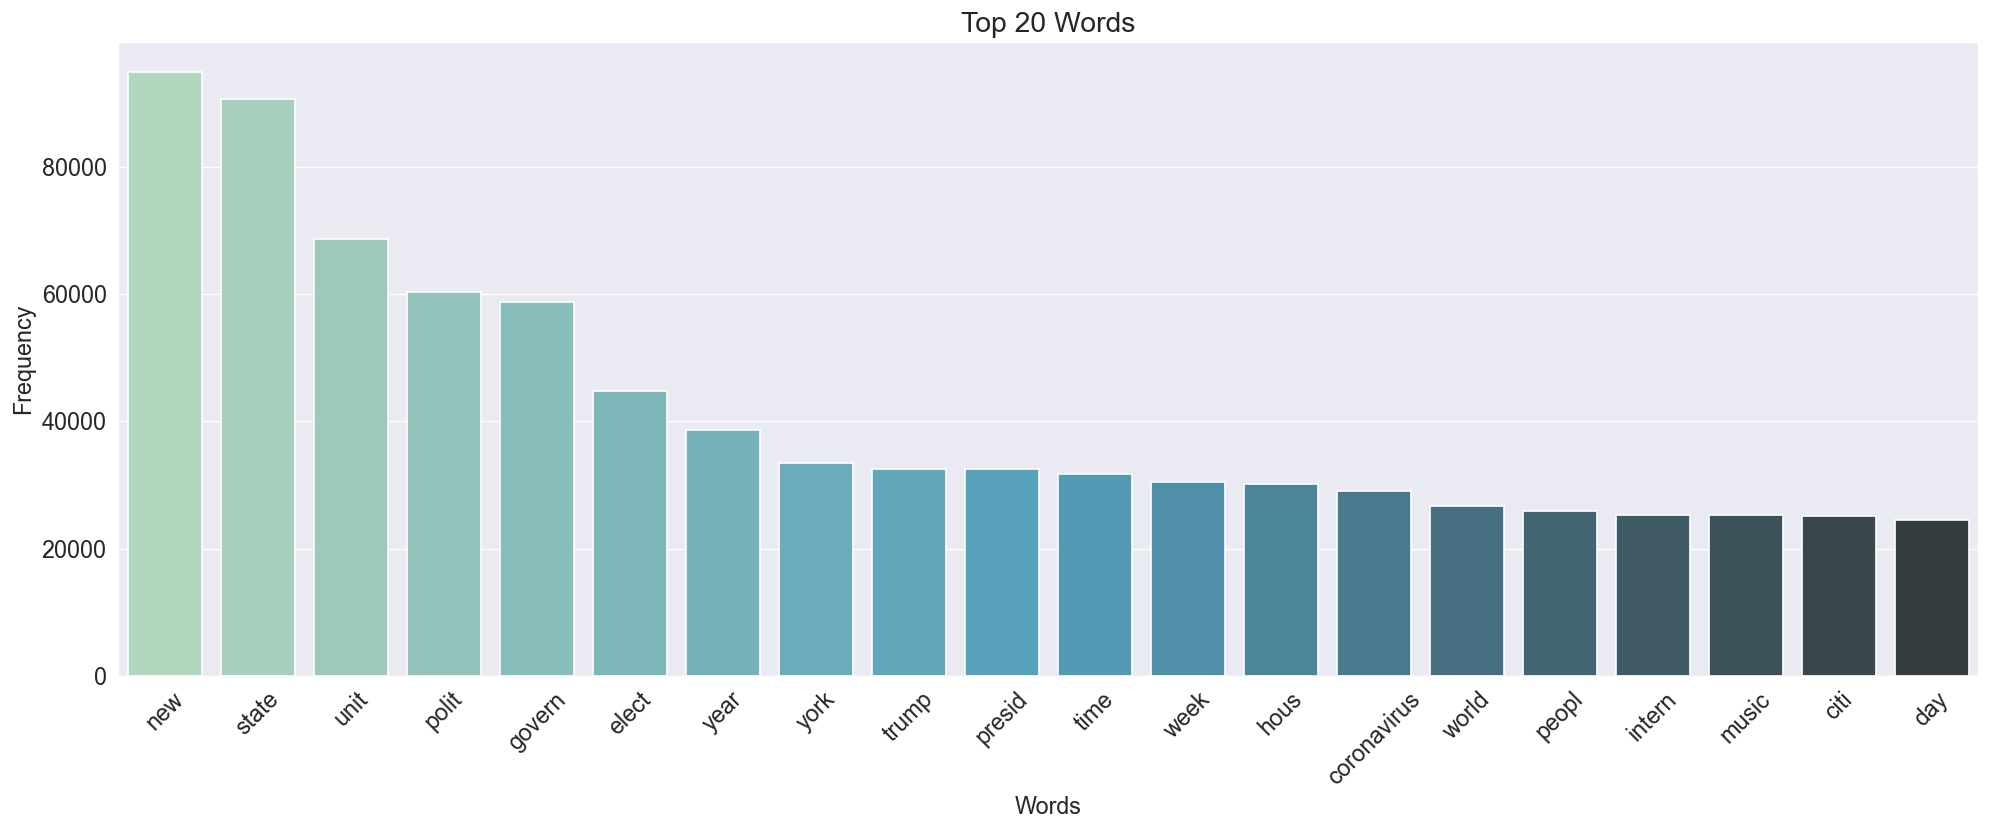

In [628]:
# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)



plt.show()

In [629]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

129642

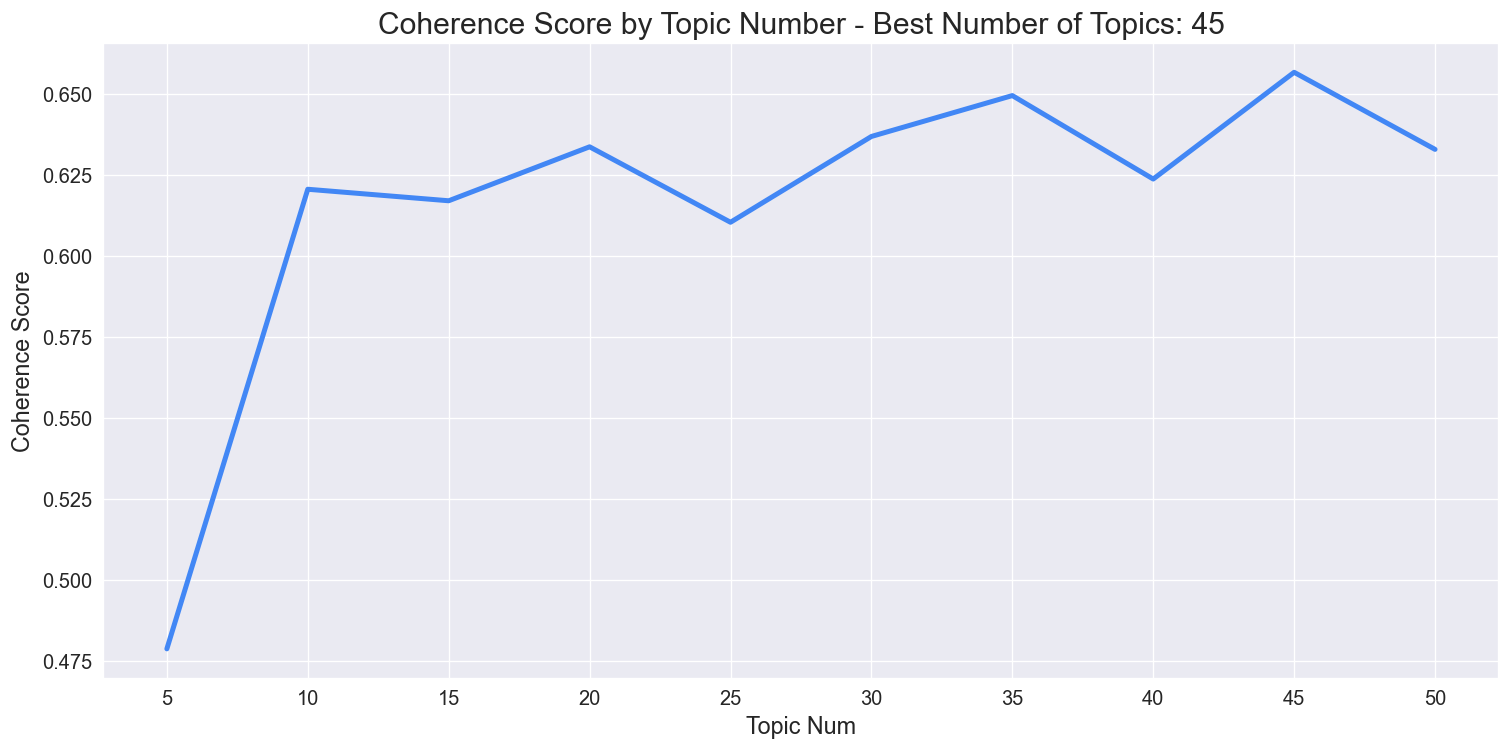

In [630]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df_news['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3, #filters out words that appear less than 3 times
    no_above=0.85, #filter out words that appear in >85% of the text
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 50 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)


plt.show()

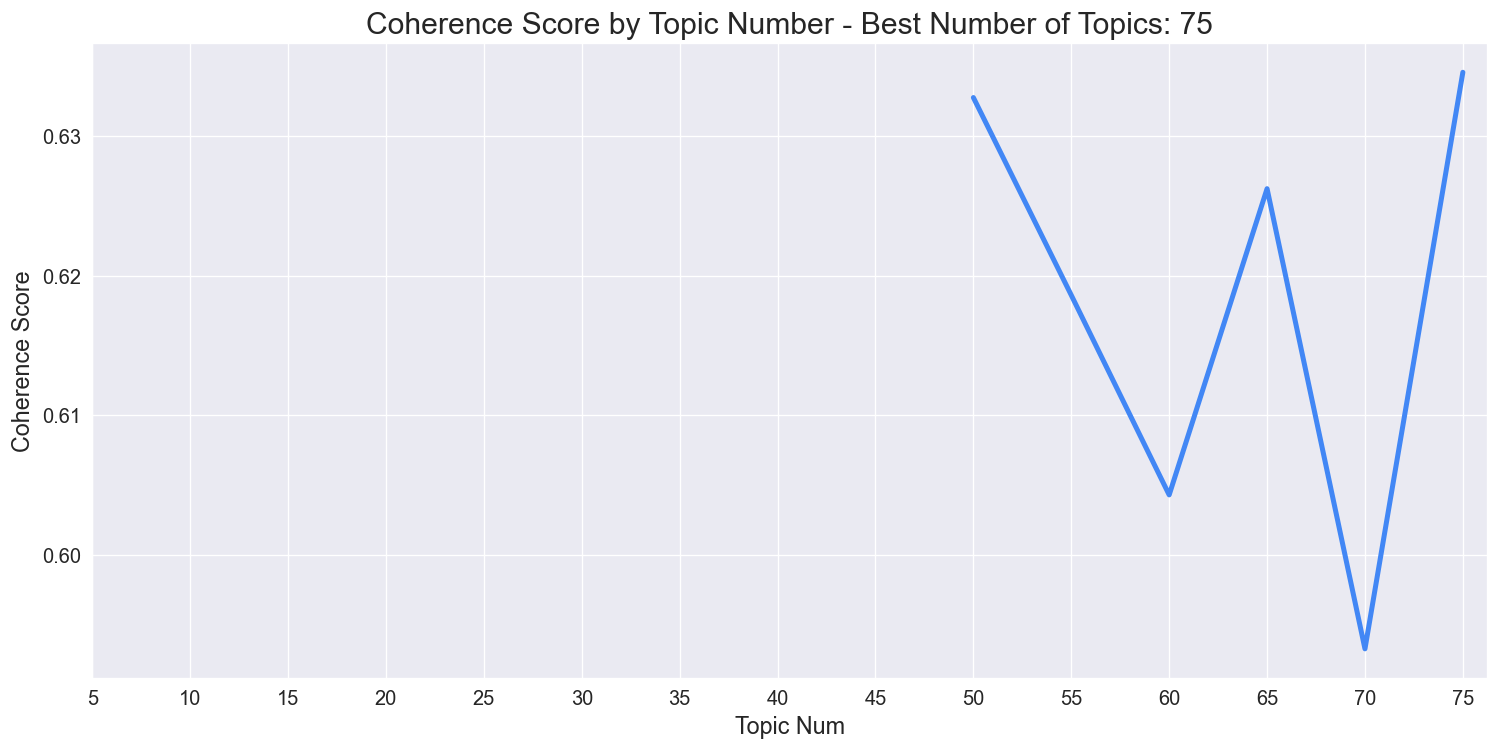

In [631]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df_news['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(50, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)


plt.show()

In [10]:
# Looks like 45 topics is the best 

# Now use the number of topics with the 
# highest coherence score to run the 
# sklearn nmf model

texts = df_news['processed_text']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names()

# Run the nmf model
nmf = NMF(
    n_components=45,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [11]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 8

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()

0           1               2               3          4  \
0   state       polit          govern      unit state       unit   
1     new        york        new york            citi  york citi   
2     wed   wed engag           engag           coupl        met   
3   estat  real estat            real            hous  residenti   
4  murder     attempt  attempt murder  murder attempt    homicid   

                5               6      7                             topics  
0    polit govern     state polit  senat      state polit govern unit senat  
1       york time            time  mayor           new york citi time mayor  
2       coupl met           bride  groom    wed engag coupl met bride groom  
3      estat hous  hous residenti   home     estat real hous residenti home  
4  murder homicid            kill  charg  murder attempt homicid kill charg

In [12]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df

topic_num                                             topics
0           0                      state polit govern unit senat
1           1                           new york citi time mayor
2           2                    wed engag coupl met bride groom
3           3                     estat real hous residenti home
4           4                  murder attempt homicid kill charg
5           5  elect presidenti campaign vote voter democrat ...
6           6              fashion apparel week design york pari
7           7  movi film theater televis award actor festiv o...
8           8          puzzl crossword varieti solv acrost debut
9           9          book literatur writer write publish novel
10         10     coronavirus ncov vaccin immun pandem quarantin
11         11      comput internet compani video mobil tech data
12         12  basebal season yanke basketbal footbal team me...
13         13                        news media quiz report time
14         14                 care health insur act afford manag
15         15                            black peopl race ethnic
16         16                   word articl past year appear day
17         17      art museum artist exhibit work cultur galleri
18         18                militari forc defens state war unit
19         19                    travel vacat hotel lodg restaur
20         20                    right human violat prison crime
21         21              cook cookbook recip food restaur make
22         22                    protest demonstr riot hong kong
23         23           women girl men sexual right femal harass
24         24       bank financi institut regul industri deregul
25         25              correct appear print march juli april
26         26  colleg univers student school educ footbal bas...
27         27                     music classic rock pop theater
28         28                      intern relat state trade unit
29         29    merger acquisit divestitur deal compani billion
30         30                execut appoint chang chief director
31         31           immigr emigr illeg migrant refuge border
32         32             global warm climat gas emiss greenhous
33         33       tenni open state french wimbledon tournament
34         34                        soccer cup world team leagu
35         35                polic shoot offic brutal misconduct
36         36           tax job labor economi econom state feder
37         37       children famili parent childhood life school
38         38       trump presid impeach donald russian interfer
39         39           sex civil court suit marriag litig crime
40         40                  game olymp video gold sport medal
41         41  social media facebook advertis twitter parti n...
42         42                  content type person profil servic
43         43              safeti accid death drug traffic fatal
44         44                    day know need brief start photo

In [13]:
# Looks like topic 32 is where my global warming related topics are!! 

headline = df_news['headline'].tolist()

df_temp = pd.DataFrame({
    'headline': headline,
    'topic_num': docweights.argmax(axis=1)
})

# Merging to get the topic num with url
merged_topic = df_temp.merge(
    topic_df,
    on='topic_num',
    how='left'
)

# Merging with the original df
df_topics = pd.merge(
    df_news,
    merged_topic,
    on='headline',
    how='left'
)

df_topics = df_topics.drop(
    'processed_text',
    axis=1
)

df_topics.head()

headline        date doc_type  \
0  Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01  article   
1  Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01  article   
2  Agency Pulls Back on Its Warning Against Talk ...  2018-12-01  article   
3  A China Hawk Gains Prominence as Trump Confron...  2018-12-01  article   
4                     Wilmer Flores Is a Met No More  2018-12-01  article   

  material_type  section                                           keywords  \
0          News      NaN  ['Books and Literature', 'United States Politi...   
1          News      NaN                  ['Football', 'Domestic Violence']   
2          News      NaN                               ['Hatch Act (1939)']   
3          News      NaN  ['United States International Relations', 'Uni...   
4          News      NaN                                       ['Baseball']   

                                            abstract  \
0  President Trump, who is not a reader, has used...   
1  Hunt, a star running back, was also suspended ...   
2  Casual conversations about impeachment and inv...   
3  Michael Pillsbury, the president’s top outside...   
4  A fan favorite, Flores did not receive a contr...   

                                      lead_paragraph  \
0  WASHINGTON — President Trump, a leader who is ...   
1  The Kansas City Chiefs cut their star running ...   
2  WASHINGTON — An independent government agency,...   
3  WASHINGTON — Michael Pillsbury had just finish...   
4  The Mets parted ways with a fan favorite, Wilm...   

                                   headline_abstract  \
0  Trump’s Book Club: A President Who Doesn’t Rea...   
1  Kareem Hunt Is Cut by the Chiefs After a Video...   
2  Agency Pulls Back on Its Warning Against Talk ...   
3  A China Hawk Gains Prominence as Trump Confron...   
4  Wilmer Flores Is a Met No More A fan favorite,...   

                                                text  \
0  Trump’s Book Club: A President Who Doesn’t Rea...   
1  Kareem Hunt Is Cut by the Chiefs After a Video...   
2  Agency Pulls Back on Its Warning Against Talk ...   
3  A China Hawk Gains Prominence as Trump Confron...   
4  Wilmer Flores Is a Met No More A fan favorite,...   

                               processed_text_string  topic_num  \
0  ['trump', 'book', 'club', 'presid', 'doesn', '...         38   
1  ['trump', 'book', 'club', 'presid', 'doesn', '...         19   
2  ['trump', 'book', 'club', 'presid', 'doesn', '...         38   
3  ['trump', 'book', 'club', 'presid', 'doesn', '...         28   
4  ['trump', 'book', 'club', 'presid', 'doesn', '...         12   

                                              topics  
0       trump presid impeach donald russian interfer  
1                    travel vacat hotel lodg restaur  
2       trump presid impeach donald russian interfer  
3                      intern relat state trade unit  
4  basebal season yanke basketbal footbal team me...

In [22]:
topic_32 = df_topics[df_topics['topic_num'] == 32]

In [23]:
topic_32

headline        date  \
86                            11 of Our Best Weekend Reads  2018-12-01   
144                           11 of Our Best Weekend Reads  2018-12-01   
160                           11 of Our Best Weekend Reads  2018-12-01   
161                           11 of Our Best Weekend Reads  2018-12-01   
167                           11 of Our Best Weekend Reads  2018-12-01   
...                                                    ...         ...   
1957656        Polar Researchers Explain North Pole ‘Lake’  2013-07-30   
1957781  Fight Over Plan for Natural Gas Port Off Long ...  2013-07-31   
1957805  Bills Unpaid, Power Is Cut to Province in Phil...  2013-07-31   
1957823      Milestone Claimed in Creating Fuel From Waste  2013-07-31   
1957907  The Silent Partner Behind the Shale Energy Boo...  2013-07-31   

        doc_type material_type  section  \
86       article          News      NaN   
144      article          News      NaN   
160      article          News      NaN   
161      article          News      NaN   
167      article          News      NaN   
...          ...           ...      ...   
1957656  article          News      NaN   
1957781  article          News      NaN   
1957805  article          News      NaN   
1957823  article          News      NaN   
1957907  article          News      NaN   

                                                  keywords  \
86                     ['#MeToo Movement', 'Missionaries']   
144                    ['#MeToo Movement', 'Missionaries']   
160                    ['#MeToo Movement', 'Missionaries']   
161                    ['#MeToo Movement', 'Missionaries']   
167                    ['#MeToo Movement', 'Missionaries']   
...                                                    ...   
1957656                                                 []   
1957781  ['Natural Gas', 'Environment', 'Energy and Pow...   
1957805                       ['Electric Light and Power']   
1957823  ['Ethanol', 'Alternative and Renewable Energy'...   
1957907  ['Drilling and Boring', 'Energy and Power', 'H...   

                                                  abstract  \
86       The unsettling reality behind a Louisiana scho...   
144      The unsettling reality behind a Louisiana scho...   
160      The unsettling reality behind a Louisiana scho...   
161      The unsettling reality behind a Louisiana scho...   
167      The unsettling reality behind a Louisiana scho...   
...                                                    ...   
1957656  Scientists who spend weeks each year camped on...   
1957781  Supporters say the port would create jobs and ...   
1957805  More than one million people lost electricity ...   
1957823  In what would be a key breakthrough for renewa...   
1957907  A closer look at the public investments behind...   

                                            lead_paragraph  \
86       Welcome to the Weekend. It’s the first one in ...   
144      Welcome to the Weekend. It’s the first one in ...   
160      Welcome to the Weekend. It’s the first one in ...   
161      Welcome to the Weekend. It’s the first one in ...   
167      Welcome to the Weekend. It’s the first one in ...   
...                                                    ...   
1957656  In case you missed it, after a burst of Web co...   
1957781  Some fishermen call the waters some 20 miles o...   
1957805  MANILA — A Philippine province of 1.2 million ...   
1957823  WASHINGTON — After months of frustrating delay...   
1957907  Since 2011, Alex Trembath, a tireless and tale...   

                                         headline_abstract  \
86       11 of Our Best Weekend Reads The unsettling re...   
144      11 of Our Best Weekend Reads The unsettling re...   
160      11 of Our Best Weekend Reads The unsettling re...   
161      11 of Our Best Weekend Reads The unsettling re...   
167      11 of Our Best Weekend Reads The unsettling re...   
...                                  

In [17]:
topic_32.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12685 entries, 86 to 1957907
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   headline               12685 non-null  object 
 1   date                   12685 non-null  object 
 2   doc_type               12685 non-null  object 
 3   material_type          12685 non-null  object 
 4   section                0 non-null      float64
 5   keywords               12685 non-null  object 
 6   abstract               12684 non-null  object 
 7   lead_paragraph         12617 non-null  object 
 8   headline_abstract      12685 non-null  object 
 9   text                   12685 non-null  object 
 10  processed_text_string  12685 non-null  object 
 11  topic_num              12685 non-null  int64  
 12  topics                 12685 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.4+ MB


In [24]:
# Only want headline, date, topic num, and topics 

topic_32_clean = topic_32.drop(['doc_type', 'material_type', 'section', 'abstract', 'lead_paragraph','text', 'headline_abstract'], axis = 1)






In [25]:
topic_32_clean

headline        date  \
86                            11 of Our Best Weekend Reads  2018-12-01   
144                           11 of Our Best Weekend Reads  2018-12-01   
160                           11 of Our Best Weekend Reads  2018-12-01   
161                           11 of Our Best Weekend Reads  2018-12-01   
167                           11 of Our Best Weekend Reads  2018-12-01   
...                                                    ...         ...   
1957656        Polar Researchers Explain North Pole ‘Lake’  2013-07-30   
1957781  Fight Over Plan for Natural Gas Port Off Long ...  2013-07-31   
1957805  Bills Unpaid, Power Is Cut to Province in Phil...  2013-07-31   
1957823      Milestone Claimed in Creating Fuel From Waste  2013-07-31   
1957907  The Silent Partner Behind the Shale Energy Boo...  2013-07-31   

                                                  keywords  \
86                     ['#MeToo Movement', 'Missionaries']   
144                    ['#MeToo Movement', 'Missionaries']   
160                    ['#MeToo Movement', 'Missionaries']   
161                    ['#MeToo Movement', 'Missionaries']   
167                    ['#MeToo Movement', 'Missionaries']   
...                                                    ...   
1957656                                                 []   
1957781  ['Natural Gas', 'Environment', 'Energy and Pow...   
1957805                       ['Electric Light and Power']   
1957823  ['Ethanol', 'Alternative and Renewable Energy'...   
1957907  ['Drilling and Boring', 'Energy and Power', 'H...   

                                     processed_text_string  topic_num  \
86       ['trump', 'book', 'club', 'presid', 'doesn', '...         32   
144      ['trump', 'book', 'club', 'presid', 'doesn', '...         32   
160      ['trump', 'book', 'club', 'presid', 'doesn', '...         32   
161      ['trump', 'book', 'club', 'presid', 'doesn', '...         32   
167      ['trump', 'book', 'club', 'presid', 'doesn', '...         32   
...                                                    ...        ...   
1957656  ['trump', 'book', 'club', 'presid', 'doesn', '...         32   
1957781  ['trump', 'book', 'club', 'presid', 'doesn', '...         32   
1957805  ['trump', 'book', 'club', 'presid', 'doesn', '...         32   
1957823  ['trump', 'book', 'club', 'presid', 'doesn', '...         32   
1957907  ['trump', 'book', 'club', 'presid', 'doesn', '...         32   

                                         topics  
86       global warm climat gas emiss greenhous  
144      global warm climat gas emiss greenhous  
160      global warm climat gas emiss greenhous  
161      global warm climat gas emiss greenhous  
167      global warm climat gas emiss greenhous  
...                                         ...  
1957656  global warm climat gas emiss greenhous  
1957781  global warm climat gas emiss greenhous  
1957805  global warm climat gas emiss greenhous  
1957823  global warm climat gas emiss greenhous  
1957907  global warm climat gas emiss greenhous  

[12685 rows x 6 columns]

In [ ]:
# Look for duplicates 

topic_32_clean.duplicated().value_counts()



In [653]:
topic_32_clean[topic_32_clean.duplicated()]

headline        date  \
144                         11 of Our Best Weekend Reads  2018-12-01   
160                         11 of Our Best Weekend Reads  2018-12-01   
161                         11 of Our Best Weekend Reads  2018-12-01   
167                         11 of Our Best Weekend Reads  2018-12-01   
185                         11 of Our Best Weekend Reads  2018-12-01   
...                                                  ...         ...   
1918923                     11 of Our Best Weekend Reads  2020-08-28   
1918927                     11 of Our Best Weekend Reads  2020-08-28   
1931344                            Letters to the Editor  2017-03-18   
1937639  Foreign Correspondents as They Live and Breathe  2017-03-30   
1951339                      The Weekend Wheels Calendar  2013-07-26   

                                                  keywords  topic_num  \
144                    ['#MeToo Movement', 'Missionaries']         43   
160                    ['#MeToo Movement', 'Missionaries']         43   
161                    ['#MeToo Movement', 'Missionaries']         43   
167                    ['#MeToo Movement', 'Missionaries']         43   
185                    ['#MeToo Movement', 'Missionaries']         43   
...                                                    ...        ...   
1918923                                                 []         43   
1918927                                                 []         43   
1931344  ['Golf', 'Football (College)', 'Rugby', 'Baseb...         43   
1937639  ['Air Pollution', 'News and News Media', 'Gree...         43   
1951339  ['Antique and Classic Cars', 'ANTIQUES', 'Auct...         43   

                                         topics  
144      global warm climat gas emiss greenhous  
160      global warm climat gas emiss greenhous  
161      global warm climat gas emiss greenhous  
167      global warm climat gas emiss greenhous  
185      global warm climat gas emiss greenhous  
...                                         ...  
1918923  global warm climat gas emiss greenhous  
1918927  global warm climat gas emiss greenhous  
1931344  global warm climat gas emiss greenhous  
1937639  global warm climat gas emiss greenhous  
1951339  global warm climat gas emiss greenhous  

[1326 rows x 5 columns]

In [664]:
topic_43_clean[topic_43_clean['headline'].str.contains('11 of Our Best Weekend Reads')]







headline        date  \
86       11 of Our Best Weekend Reads  2018-12-01   
144      11 of Our Best Weekend Reads  2018-12-01   
160      11 of Our Best Weekend Reads  2018-12-01   
161      11 of Our Best Weekend Reads  2018-12-01   
167      11 of Our Best Weekend Reads  2018-12-01   
...                               ...         ...   
1918898  11 of Our Best Weekend Reads  2020-08-28   
1918899  11 of Our Best Weekend Reads  2020-08-28   
1918905  11 of Our Best Weekend Reads  2020-08-28   
1918923  11 of Our Best Weekend Reads  2020-08-28   
1918927  11 of Our Best Weekend Reads  2020-08-28   

                                    keywords  topic_num  \
86       ['#MeToo Movement', 'Missionaries']         43   
144      ['#MeToo Movement', 'Missionaries']         43   
160      ['#MeToo Movement', 'Missionaries']         43   
161      ['#MeToo Movement', 'Missionaries']         43   
167      ['#MeToo Movement', 'Missionaries']         43   
...                                      ...        ...   
1918898                                   []         43   
1918899                                   []         43   
1918905                                   []         43   
1918923                                   []         43   
1918927                                   []         43   

                                         topics  
86       global warm climat gas emiss greenhous  
144      global warm climat gas emiss greenhous  
160      global warm climat gas emiss greenhous  
161      global warm climat gas emiss greenhous  
167      global warm climat gas emiss greenhous  
...                                         ...  
1918898  global warm climat gas emiss greenhous  
1918899  global warm climat gas emiss greenhous  
1918905  global warm climat gas emiss greenhous  
1918923  global warm climat gas emiss greenhous  
1918927  global warm climat gas emiss greenhous  

[987 rows x 5 columns]

In [671]:
# df.drop(df.loc[df['line_race']==0].index, inplace=True)

topic_43_clean.drop(topic_43_clean.loc[topic_43_clean['headline'].str.contains('11 of Our Best Weekend Reads')].index, inplace = True)








In [672]:
topic_43_clean

headline        date  \
350      Betting on a new way to make concrete that doe...  2018-12-02   
656      American’s Death Revives Evangelical Debate Ov...  2018-12-02   
671      In Unfazed Alaska, a Major Quake Is Just a Bum...  2018-12-03   
675      Firms Drop Support for Cluster Bombs, but ‘Glo...  2018-12-03   
683      Drilling in the Arctic: Questions for a Polar ...  2018-12-03   
...                                                    ...         ...   
1952044      Milestone Claimed in Creating Fuel From Waste  2013-07-31   
1952056                     Nissan and Lotus Issue Recalls  2013-07-31   
1952090     A Suburban Jersey Spin in the 2014 Ford Fiesta  2013-07-31   
1952128  The Silent Partner Behind the Shale Energy Boo...  2013-07-31   
1952146                   Life on the Farm: E-I-E-I ...Oh?  2013-07-31   

                                                  keywords  topic_num  \
350      ['Concrete', 'Greenhouse Gas Emissions', 'Carb...         43   
656      ['Missionaries', 'Christians and Christianity'...         43   
671                                        ['Earthquakes']         43   
675          ['Cluster Munitions', 'Bombs and Explosives']         43   
683      ['Ice', 'Animal Behavior', 'Seals (Animals) an...         43   
...                                                    ...        ...   
1952044  ['Ethanol', 'Alternative and Renewable Energy'...         43   
1952056  ['Automobile Safety Features and Defects', 'Au...         43   
1952090      ['Automobiles', 'Engines', 'Fuel Efficiency']         43   
1952128  ['Drilling and Boring', 'Energy and Power', 'H...         43   
1952146  ['Agriculture and Farming', 'Organic Foods and...         43   

                                         topics  
350      global warm climat gas emiss greenhous  
656      global warm climat gas emiss greenhous  
671      global warm climat gas emiss greenhous  
675      global warm climat gas emiss greenhous  
683      global warm climat gas emiss greenhous  
...                                         ...  
1952044  global warm climat gas emiss greenhous  
1952056  global warm climat gas emiss greenhous  
1952090  global warm climat gas emiss greenhous  
1952128  global warm climat gas emiss greenhous  
1952146  global warm climat gas emiss greenhous  

[23202 rows x 5 columns]

In [675]:
topic_43_clean[topic_43_clean.duplicated()]

headline        date  \
68330                            Weekend Wheels Calendar  2013-09-06   
70933        Crews Right Cruise Ship in Waters Off Italy  2013-09-16   
71125        Crews Right Cruise Ship in Waters Off Italy  2013-09-17   
72349                            Weekend Wheels Calendar  2013-09-20   
74401                            Weekend Wheels Calendar  2013-09-27   
...                                                  ...         ...   
1849909                      The Weekend Wheels Calendar  2013-06-14   
1916291      Why Does California Have So Many Wildfires?  2020-08-21   
1931344                            Letters to the Editor  2017-03-18   
1937639  Foreign Correspondents as They Live and Breathe  2017-03-30   
1951339                      The Weekend Wheels Calendar  2013-07-26   

                                                  keywords  topic_num  \
68330    ['Antique and Classic Cars', 'Automobile Racin...         43   
70933    ['Cruises', 'Maritime Accidents and Safety', '...         43   
71125         ['Cruises', 'Maritime Accidents and Safety']         43   
72349    ['Antique and Classic Cars', 'Auctions', 'Auto...         43   
74401          ['Antique and Classic Cars', 'Automobiles']         43   
...                                                    ...        ...   
1849909        ['Antique and Classic Cars', 'Automobiles']         43   
1916291  ['Global Warming', 'Environment', 'Greenhouse ...         43   
1931344  ['Golf', 'Football (College)', 'Rugby', 'Baseb...         43   
1937639  ['Air Pollution', 'News and News Media', 'Gree...         43   
1951339  ['Antique and Classic Cars', 'ANTIQUES', 'Auct...         43   

                                         topics  
68330    global warm climat gas emiss greenhous  
70933    global warm climat gas emiss greenhous  
71125    global warm climat gas emiss greenhous  
72349    global warm climat gas emiss greenhous  
74401    global warm climat gas emiss greenhous  
...                                         ...  
1849909  global warm climat gas emiss greenhous  
1916291  global warm climat gas emiss greenhous  
1931344  global warm climat gas emiss greenhous  
1937639  global warm climat gas emiss greenhous  
1951339  global warm climat gas emiss greenhous  

[480 rows x 5 columns]

In [679]:
topic_43_clean.drop(topic_43_clean.loc[topic_43_clean['headline'].str.contains('Weekend Wheels Calendar')].index, inplace = True)







headline        date  \
70933        Crews Right Cruise Ship in Waters Off Italy  2013-09-16   
71125        Crews Right Cruise Ship in Waters Off Italy  2013-09-17   
79463        Why Does California Have So Many Wildfires?  2018-11-10   
101594                                What We’re Reading  2014-11-11   
114388                                What We’re Reading  2014-11-25   
...                                                  ...         ...   
1792349                            Letters to the Editor  2015-03-23   
1795724                            Letters to the Editor  2015-03-30   
1916291      Why Does California Have So Many Wildfires?  2020-08-21   
1931344                            Letters to the Editor  2017-03-18   
1937639  Foreign Correspondents as They Live and Breathe  2017-03-30   

                                                  keywords  topic_num  \
70933    ['Cruises', 'Maritime Accidents and Safety', '...         43   
71125         ['Cruises', 'Maritime Accidents and Safety']         43   
79463    ['Wildfires', 'Global Warming', 'Forests and F...         43   
101594   ['Banking and Financial Institutions', 'Comput...         43   
114388   ['Dairy Products', 'Mars (Planet)', 'Women and...         43   
...                                                    ...        ...   
1792349  ['Teeth and Dentistry', 'Living Wills and Heal...         43   
1795724                                                 []         43   
1916291  ['Global Warming', 'Environment', 'Greenhouse ...         43   
1931344  ['Golf', 'Football (College)', 'Rugby', 'Baseb...         43   
1937639  ['Air Pollution', 'News and News Media', 'Gree...         43   

                                         topics  
70933    global warm climat gas emiss greenhous  
71125    global warm climat gas emiss greenhous  
79463    global warm climat gas emiss greenhous  
101594   global warm climat gas emiss greenhous  
114388   global warm climat gas emiss greenhous  
...                                         ...  
1792349  global warm climat gas emiss greenhous  
1795724  global warm climat gas emiss greenhous  
1916291  global warm climat gas emiss greenhous  
1931344  global warm climat gas emiss greenhous  
1937639  global warm climat gas emiss greenhous  

[469 rows x 5 columns]

In [681]:
topic_43_clean.drop(topic_43_clean.loc[topic_43_clean['headline'].str.contains('Letters to the Editor')].index, inplace = True)





headline        date  \
70933          Crews Right Cruise Ship in Waters Off Italy  2013-09-16   
71125          Crews Right Cruise Ship in Waters Off Italy  2013-09-17   
79463          Why Does California Have So Many Wildfires?  2018-11-10   
101594                                  What We’re Reading  2014-11-11   
114388                                  What We’re Reading  2014-11-25   
...                                                    ...         ...   
1658227  Jeb Bush Avoids Criticizing Pope While Acknowl...  2015-06-17   
1658229  Jeb Bush Avoids Criticizing Pope While Acknowl...  2015-06-17   
1702874    Foreign Correspondents as They Live and Breathe  2017-05-31   
1916291        Why Does California Have So Many Wildfires?  2020-08-21   
1937639    Foreign Correspondents as They Live and Breathe  2017-03-30   

                                                  keywords  topic_num  \
70933    ['Cruises', 'Maritime Accidents and Safety', '...         43   
71125         ['Cruises', 'Maritime Accidents and Safety']         43   
79463    ['Wildfires', 'Global Warming', 'Forests and F...         43   
101594   ['Banking and Financial Institutions', 'Comput...         43   
114388   ['Dairy Products', 'Mars (Planet)', 'Women and...         43   
...                                                    ...        ...   
1658227  ['Global Warming', 'Presidential Election of 2...         43   
1658229                                                 []         43   
1702874  ['Air Pollution', 'News and News Media', 'Gree...         43   
1916291  ['Global Warming', 'Environment', 'Greenhouse ...         43   
1937639  ['Air Pollution', 'News and News Media', 'Gree...         43   

                                         topics  
70933    global warm climat gas emiss greenhous  
71125    global warm climat gas emiss greenhous  
79463    global warm climat gas emiss greenhous  
101594   global warm climat gas emiss greenhous  
114388   global warm climat gas emiss greenhous  
...                                         ...  
1658227  global warm climat gas emiss greenhous  
1658229  global warm climat gas emiss greenhous  
1702874  global warm climat gas emiss greenhous  
1916291  global warm climat gas emiss greenhous  
1937639  global warm climat gas emiss greenhous  

[410 rows x 5 columns]

In [685]:
topic_43_clean.drop(index = 1658229, inplace=True)


In [690]:
topic_43_clean

headline        date  \
350      Betting on a new way to make concrete that doe...  2018-12-02   
656      American’s Death Revives Evangelical Debate Ov...  2018-12-02   
671      In Unfazed Alaska, a Major Quake Is Just a Bum...  2018-12-03   
675      Firms Drop Support for Cluster Bombs, but ‘Glo...  2018-12-03   
683      Drilling in the Arctic: Questions for a Polar ...  2018-12-03   
...                                                    ...         ...   
1952044      Milestone Claimed in Creating Fuel From Waste  2013-07-31   
1952056                     Nissan and Lotus Issue Recalls  2013-07-31   
1952090     A Suburban Jersey Spin in the 2014 Ford Fiesta  2013-07-31   
1952128  The Silent Partner Behind the Shale Energy Boo...  2013-07-31   
1952146                   Life on the Farm: E-I-E-I ...Oh?  2013-07-31   

                                                  keywords  topic_num  \
350      ['Concrete', 'Greenhouse Gas Emissions', 'Carb...         43   
656      ['Missionaries', 'Christians and Christianity'...         43   
671                                        ['Earthquakes']         43   
675          ['Cluster Munitions', 'Bombs and Explosives']         43   
683      ['Ice', 'Animal Behavior', 'Seals (Animals) an...         43   
...                                                    ...        ...   
1952044  ['Ethanol', 'Alternative and Renewable Energy'...         43   
1952056  ['Automobile Safety Features and Defects', 'Au...         43   
1952090      ['Automobiles', 'Engines', 'Fuel Efficiency']         43   
1952128  ['Drilling and Boring', 'Energy and Power', 'H...         43   
1952146  ['Agriculture and Farming', 'Organic Foods and...         43   

                                         topics  
350      global warm climat gas emiss greenhous  
656      global warm climat gas emiss greenhous  
671      global warm climat gas emiss greenhous  
675      global warm climat gas emiss greenhous  
683      global warm climat gas emiss greenhous  
...                                         ...  
1952044  global warm climat gas emiss greenhous  
1952056  global warm climat gas emiss greenhous  
1952090  global warm climat gas emiss greenhous  
1952128  global warm climat gas emiss greenhous  
1952146  global warm climat gas emiss greenhous  

[23061 rows x 5 columns]

In [692]:
# Make data, datetime 

from datetime import datetime as dt

topic_43_clean['date'] = pd.to_datetime(topic_43_clean['date'])


In [693]:
topic_43_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23061 entries, 350 to 1952146
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   headline   23061 non-null  object        
 1   date       23061 non-null  datetime64[ns]
 2   keywords   23061 non-null  object        
 3   topic_num  23061 non-null  int64         
 4   topics     23061 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.1+ MB


In [694]:
topic_43_clean['year'] = topic_43_clean['date'].dt.year
topic_43_clean['month'] = topic_43_clean['date'].dt.month
topic_43_clean['day'] = topic_43_clean['date'].dt.day



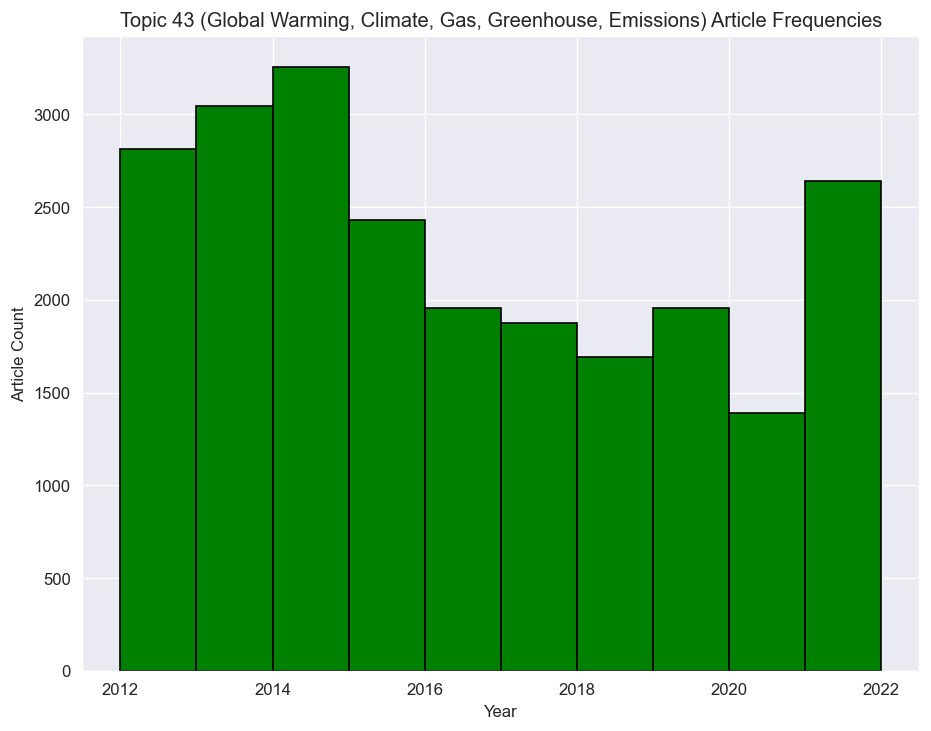

In [700]:
plt.hist(topic_43_clean.year, edgecolor = 'black', color = 'green')
plt.title('Topic 43 (Global Warming, Climate, Gas, Greenhouse, Emissions) Article Frequencies')
plt.xlabel('Year')
plt.ylabel('Article Count');







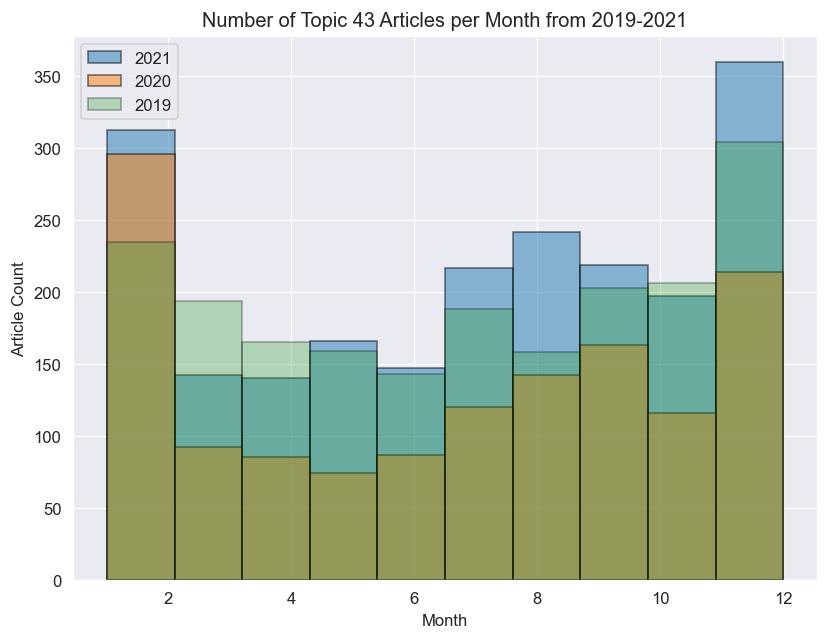

In [707]:
# Look more closely at monthly rates 

T43_22 = topic_43_clean.loc[topic_43_clean['year'] == 2022]
T43_21 = topic_43_clean.loc[topic_43_clean['year'] == 2021]
T43_20 = topic_43_clean.loc[topic_43_clean['year'] == 2020]
T43_19 = topic_43_clean.loc[topic_43_clean['year'] == 2019]

plt.figure(figsize=(8,6))
plt.hist(T43_21.month, edgecolor = 'black', alpha = 0.5, label = '2021')
plt.hist(T43_20.month, edgecolor = 'black', alpha = 0.5, label = '2020')
plt.hist(T43_19.month, edgecolor = 'black', alpha = 0.3, label = '2019')
plt.title('Number of Topic 43 Articles per Month from 2019-2021')
plt.xlabel('Month')
plt.ylabel('Article Count')

plt.legend(loc='upper left');

In [708]:
# Interested to also see keywords 

def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

topic_43_clean['keywords_code'] = topic_43_clean['keywords'].apply(eval)

to_1D(topic_43_clean['keywords_code'])


0                            Concrete
1            Greenhouse Gas Emissions
2                      Carbon Dioxide
3                          Innovation
4         Factories and Manufacturing
                     ...             
77973    Oil (Petroleum) and Gasoline
77974                           Shale
77975         Agriculture and Farming
77976      Organic Foods and Products
77977                     Environment
Length: 77978, dtype: object

In [710]:
to_1D(topic_43_clean['keywords_code']).value_counts().head(25)

Global Warming                              4263
Greenhouse Gas Emissions                    2689
Automobiles                                 2017
Oil (Petroleum) and Gasoline                1565
Environment                                 1132
Deaths (Fatalities)                         1083
United States Politics and Government       1038
Automobile Safety Features and Defects      1002
Research                                     983
Traffic Accidents and Safety                 889
Floods                                       854
Weather                                      832
Air Pollution                                832
Regulation and Deregulation of Industry      793
Electric and Hybrid Vehicles                 744
Alternative and Renewable Energy             713
Natural Gas                                  711
Carbon Dioxide                               684
Hurricane Sandy (2012)                       658
Hurricanes and Tropical Storms               620
Accidents and Safety

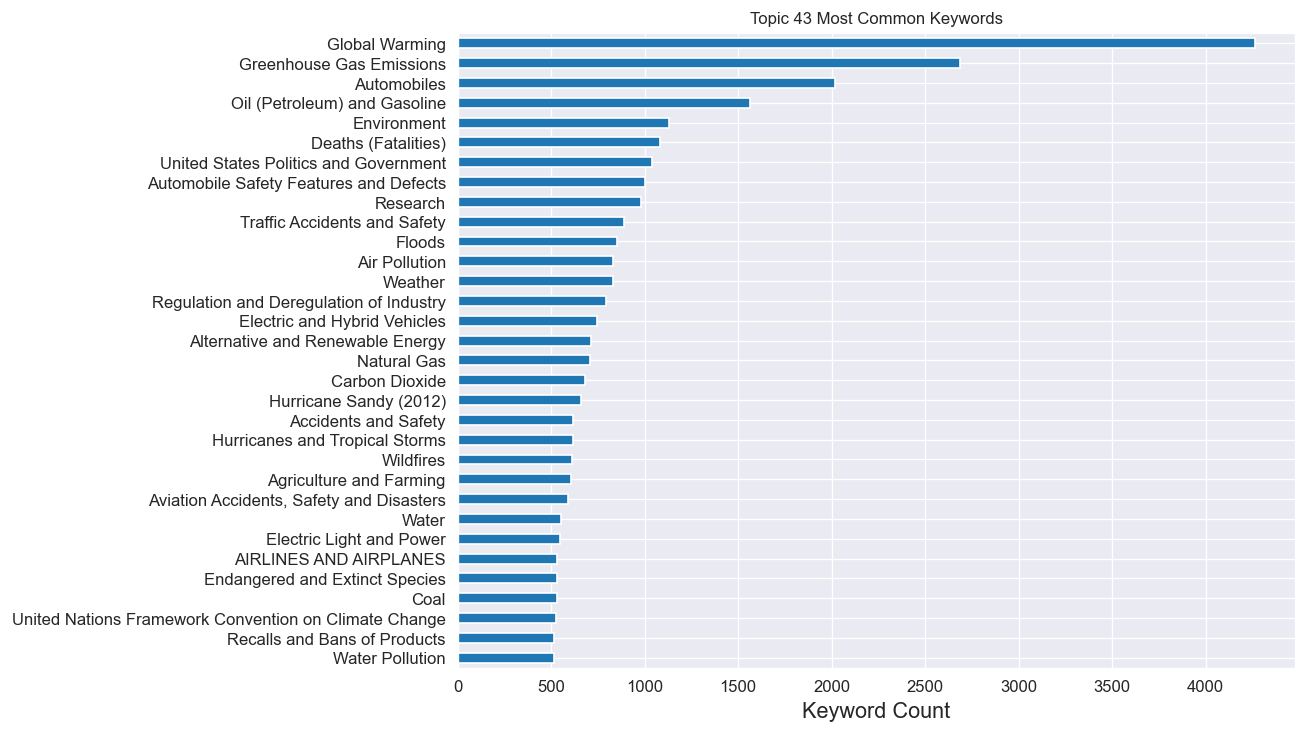

In [711]:
to_1D(topic_43_clean['keywords_code']).value_counts(ascending=True).loc[to_1D(topic_43_clean['keywords_code']).value_counts() > 500].plot(kind='barh')

plt.title('Topic 43 Most Common Keywords', fontsize=10)
plt.xlabel('Keyword Count', fontsize=13)
plt.show()

In [ ]:
import os
import json
import time
import requests
import datetime
import dateutil
import pandas as pd
from dateutil.relativedelta import relativedelta

In [2]:
import glob
import os

files = os.path.join('headlines/20*.csv')
files = glob.glob(files)

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df.head(10)

headline        date doc_type  \
0  Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01  article   
1  Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01  article   
2  Agency Pulls Back on Its Warning Against Talk ...  2018-12-01  article   
3  A China Hawk Gains Prominence as Trump Confron...  2018-12-01  article   
4                     Wilmer Flores Is a Met No More  2018-12-01  article   
5    Will Trump Speak Up Against China’s Oppression?  2018-12-01  article   
6  ISIS Official Known for Caging Foes Is Capture...  2018-12-01  article   
7  Canada Faces a New Challenge as a Century of A...  2018-12-01  article   
8  High Stakes for House Freshmen: The Office Lot...  2018-12-01  article   
9  Mets Appear Near a Deal for Robinson Cano and ...  2018-12-01  article   

  material_type  section                                           keywords  \
0          News      NaN  ['Books and Literature', 'United States Politi...   
1          News      NaN                  ['Football', 'Domestic Violence']   
2          News      NaN                               ['Hatch Act (1939)']   
3          News      NaN  ['United States International Relations', 'Uni...   
4          News      NaN                                       ['Baseball']   
5     Editorial      NaN  ['United States International Relations', 'Hum...   
6          News      NaN  ['Terrorism', 'Espionage and Intelligence Serv...   
7          News      NaN  ['Layoffs and Job Reductions', 'Shutdowns (Ins...   
8          News      NaN        ['Building Service Employees', 'Lotteries']   
9          News      NaN                    ['Baseball', 'Trades (Sports)']   

                                            abstract  \
0  President Trump, who is not a reader, has used...   
1  Hunt, a star running back, was also suspended ...   
2  Casual conversations about impeachment and inv...   
3  Michael Pillsbury, the president’s top outside...   
4  A fan favorite, Flores did not receive a contr...   
5  In Argentina, President Trump has a chance to ...   
6  The captured operative was a midlevel official...   
7  Both Prime Minister Justin Trudeau and Premier...   
8  Forget coveted committee assignments and leade...   
9  The trade would require the Mets to give the S...   

                                      lead_paragraph  
0  WASHINGTON — President Trump, a leader who is ...  
1  The Kansas City Chiefs cut their star running ...  
2  WASHINGTON — An independent government agency,...  
3  WASHINGTON — Michael Pillsbury had just finish...  
4  The Mets parted ways with a fan favorite, Wilm...  
5  As President Trump prepares to meet his Chines...  
6  BAGHDAD — The Iraqi authorities released a vid...  
7  This week wasn’t the first time I found myself...  
8  WASHINGTON — Colin Allred of Texas brought his...  
9  In explaining the Mets’ hiring of Brodie Van W...

In [3]:
df_news = df[df['material_type'] == 'News']

In [4]:
def to_text(dataframe):
    df_news['headline_abstract'] = df_news.headline.str.cat(df_news.abstract, sep=' ', na_rep=' ')
    df_news['text'] = df_news.headline_abstract.str.cat(df_news.keywords, sep=' ', na_rep=' ')
    print('Number of articles: {}'.format(len(df)))
    

to_text(df_news)

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_1626/1429869230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['headline_abstract'] = df_news.headline.str.cat(df_news.abstract, sep=' ', na_rep=' ')


Number of articles: 687270


/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_1626/1429869230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['text'] = df_news.headline_abstract.str.cat(df_news.keywords, sep=' ', na_rep=' ')


In [5]:
df_news

headline        date  \
0       Trump’s Book Club: A President Who Doesn’t Rea...  2018-12-01   
1       Kareem Hunt Is Cut by the Chiefs After a Video...  2018-12-01   
2       Agency Pulls Back on Its Warning Against Talk ...  2018-12-01   
3       A China Hawk Gains Prominence as Trump Confron...  2018-12-01   
4                          Wilmer Flores Is a Met No More  2018-12-01   
...                                                   ...         ...   
687263  Songs and Sunscreen Spread the Health Insuranc...  2013-07-31   
687264                 Reluctantly Returning to the Stage  2013-07-31   
687265                     Mets Decline to Make Any Moves  2013-07-31   
687267  Documents Show Thatcher-Reagan Rift Over U.S. ...  2013-07-31   
687268        Crowds Return to Las Vegas, but Gamble Less  2013-07-31   

       doc_type material_type  section  \
0       article          News      NaN   
1       article          News      NaN   
2       article          News      NaN   
3       article          News      NaN   
4       article          News      NaN   
...         ...           ...      ...   
687263  article          News      NaN   
687264  article          News      NaN   
687265  article          News      NaN   
687267  article          News      NaN   
687268  article          News      NaN   

                                                 keywords  \
0       ['Books and Literature', 'United States Politi...   
1                       ['Football', 'Domestic Violence']   
2                                    ['Hatch Act (1939)']   
3       ['United States International Relations', 'Uni...   
4                                            ['Baseball']   
...                                                   ...   
687263  ['Health Insurance and Managed Care', 'ADVERTI...   
687264                            ['Fashion and Apparel']   
687265                                       ['Baseball']   
687267                        ['International Relations']   
687268  ['Economic Conditions and Trends', 'Gambling',...   

                                                 abstract  \
0       President Trump, who is not a reader, has used...   
1       Hunt, a star running back, was also suspended ...   
2       Casual conversations about impeachment and inv...   
3       Michael Pillsbury, the president’s top outside...   
4       A fan favorite, Flores did not receive a contr...   
...                                                   ...   
687263  Advertising is upbeat in the states that are s...   
687264  Sarah Phillips introduces new designs, two dec...   
687265  The Mets remained inactive as baseball’s nonwa...   
687267  Documents released by the British government s...   
687268  Though tourists have returned, and jobs and co...   

                                           lead_paragraph  \
0       WASHINGTON — President Trump, a leader who is ...   
1       The Kansas City Chiefs cut their star running ...   
2       WASHINGTON — An independent government agency,...   
3       WASHINGTON — Michael Pillsbury had just finish...   
4       The Mets parted ways with a fan favorite, Wilm...   
...                                                   ...   
687263  THE part of President Obama’s Affordable Care ...   
687264  When fashionable types talk about the 1990s re...   
687265  MIAMI — The Mets remained inactive as baseball...   
687267  LONDON — Thirty-year-old documents newly relea...   
687268  LAS VEGAS — When the last recession battered t...   

                                        headline_abstract  \
0       Trump’s Book Club: A President Who Doesn’t Rea...   
1       Kareem Hunt Is Cut by the Chiefs After a Video...   
2       Agency Pulls Back on Its Warning Against Talk ...   
3       A China Hawk Gains Prominence as Trump Confron...   
4       Wilmer Flores Is a Met No More A fan favorite,...   
...                                                   ...   
687263  Songs and Sunscreen Spread the He